# World Wide Products Inc.

### __1. INDUSTRY__ 

__Marketing__ industry is assigned.

### __2. DATA SETS__

__2.1. SOURCE__: The dataset is from [Kaggle](https://kaggle.com) in [this link](https://www.kaggle.com%2Ffelixzhao%2Fproductdemandforecasting).

__DESCRIPTION__: The datasets contains data related to products and their sale. The following attributes from the datasets will be used for analysis.

|Attribute       | Datatype     |
| :------------- | ----------: |
| Product_Code | object   |
| Warehouse   | object |
|Product_Category| object|
|Date| object|
|Order_Demand| object||

### __3. IDEAS__

__3.1.__ To predict the order_demand using ARIMA for a particular product.

__3.2.__ To predict order_demand for multiple product using ARIMA and compare the best performer of the market.

### __4. LOADING THE DATASETS__

__Load the libraries__

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Import the csv files of dataset__

In [2]:
products_data=pd.read_csv("/Users/madhumithrasubramaniankarthikesh/Downloads/Historical Product Demand.csv")
products_data.head()

Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27         100 
1  Product_0979    Whse_J     Category_028  2012/1/19         500 
2  Product_0979    Whse_J     Category_028   2012/2/3         500 
3  Product_0979    Whse_J     Category_028   2012/2/9         500 
4  Product_0979    Whse_J     Category_028   2012/3/2         500

### __5. DATA PREPARATION__

__5.1 DATA CLEANING AND FEATURE ENGINEERING__

__Shape of all the data__

In [3]:
print("Shape of products: "+str(products_data.shape))

Shape of products: (1048575, 5)


__Find the product that has sold to the maximum__

In [4]:
p=products_data.groupby(['Product_Code']).size().to_frame()
p.rename(columns={0:'count'},inplace=True)
p=p.reset_index()
p=p.sort_values('count',ascending=False)
p=p.reset_index()
del p["index"]
p.head()

Product_Code  count
0  Product_1359  16936
1  Product_1295  10575
2  Product_1378   9770
3  Product_0620   9428
4  Product_1286   8888

Product_1359 has the highest sale.

__Countplot for product category__

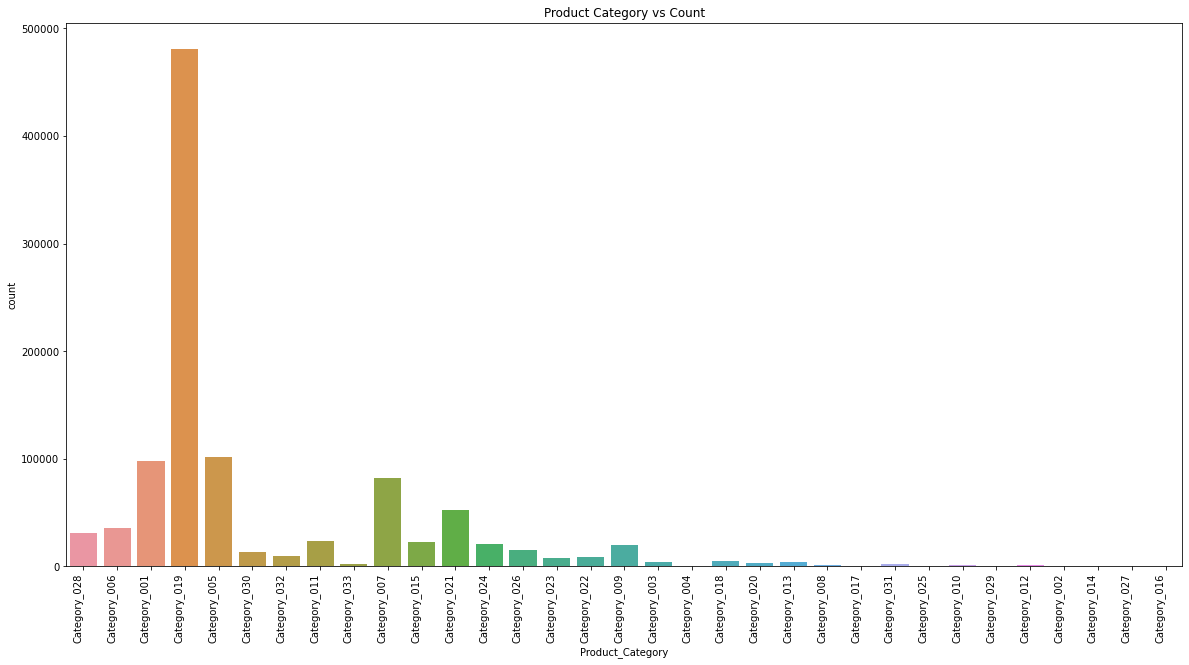

In [5]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=products_data['Product_Category'], data=products_data)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right", fontsize=10);
g.set_title('Product Category vs Count');

Category_019 has the highest sale.

__Countplot for Warehouse__

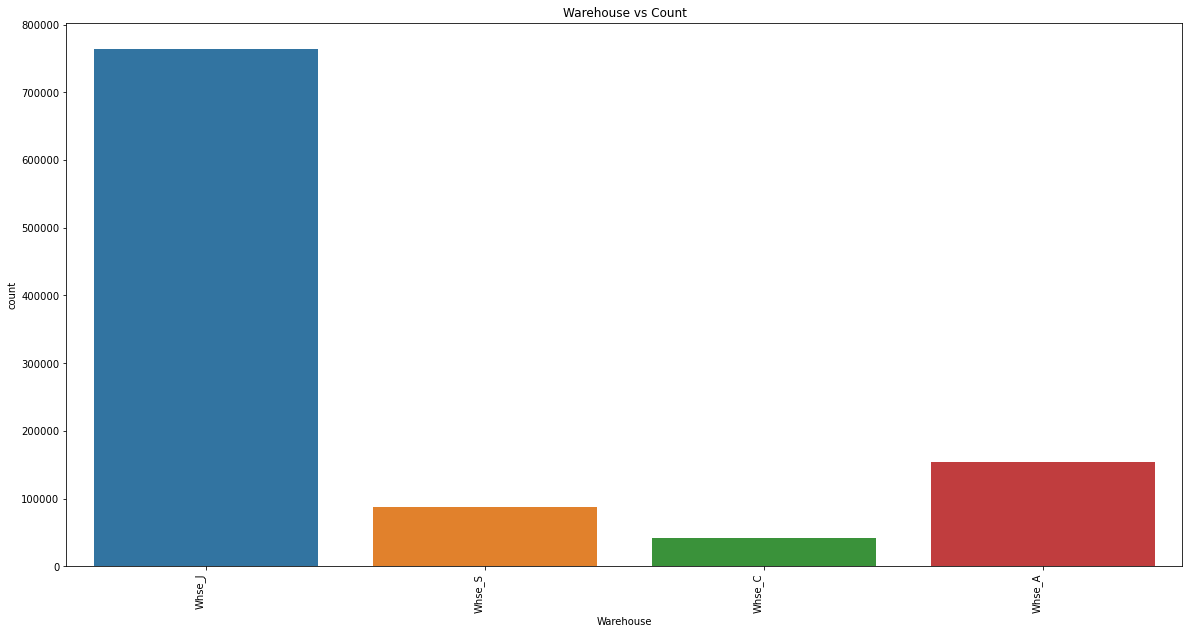

In [6]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=products_data['Warehouse'], data=products_data)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right", fontsize=10);
g.set_title('Warehouse vs Count');

Warehouse H has the highest sale.

__5.2 Analyzing on product 1359__

__Make into a new dataset for product 1359 which has highest sales__

In [7]:
choice_data=products_data[products_data['Product_Code']=='Product_1359']
choice_data=choice_data.reset_index()
del choice_data["index"]
choice_data.head()

Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_1359    Whse_J     Category_019  2012/4/18       80000 
1  Product_1359    Whse_J     Category_019  2012/5/21       70000 
2  Product_1359    Whse_J     Category_019  2012/6/26       80000 
3  Product_1359    Whse_J     Category_019  2012/7/17      100000 
4  Product_1359    Whse_J     Category_019  2012/8/24      100000

__Shape of all the data__

In [8]:
print("Product_1359: "+str(choice_data.shape))

Product_1359: (16936, 5)


__Attributes and datatypes of the dataset__

In [9]:
for column in choice_data.columns:
    print(column, " is ", choice_data[column].dtype.name)

Product_Code  is  object
Warehouse  is  object
Product_Category  is  object
Date  is  object
Order_Demand  is  object


__Changing the Order_Demand into float64 and Date column into datetime__

In [10]:
choice_data['Order_Demand']=choice_data['Order_Demand']
choice_data['Order_Demand']=choice_data['Order_Demand'].str.replace(r"\(","")
choice_data['Order_Demand']=choice_data['Order_Demand'].str.replace(r"\)","")
choice_data['Order_Demand']=choice_data['Order_Demand'].astype('float64')
choice_data['Date']=pd.to_datetime(choice_data['Date'])
choice_data.head()

Product_Code Warehouse Product_Category       Date  Order_Demand
0  Product_1359    Whse_J     Category_019 2012-04-18       80000.0
1  Product_1359    Whse_J     Category_019 2012-05-21       70000.0
2  Product_1359    Whse_J     Category_019 2012-06-26       80000.0
3  Product_1359    Whse_J     Category_019 2012-07-17      100000.0
4  Product_1359    Whse_J     Category_019 2012-08-24      100000.0

__Attributes and datatypes of the dataset__

In [11]:
for column in choice_data.columns:
    print(column, " is ", choice_data[column].dtype.name)

Product_Code  is  object
Warehouse  is  object
Product_Category  is  object
Date  is  datetime64[ns]
Order_Demand  is  float64


__Creating columns for date, day, week, weekday and year__ 

In [12]:
choice_data["month"] = [d.month for d in choice_data["Date"]]
choice_data["year"] = [d.year for d in choice_data["Date"]]
choice_data["day"] = [d.day for d in choice_data["Date"]]
choice_data["week"] = [d.strftime("%V") for d in choice_data["Date"]]
choice_data["weekday"] = [d.weekday() for d in choice_data["Date"]]
choice_data.head()

Product_Code Warehouse Product_Category       Date  Order_Demand  month  \
0  Product_1359    Whse_J     Category_019 2012-04-18       80000.0      4   
1  Product_1359    Whse_J     Category_019 2012-05-21       70000.0      5   
2  Product_1359    Whse_J     Category_019 2012-06-26       80000.0      6   
3  Product_1359    Whse_J     Category_019 2012-07-17      100000.0      7   
4  Product_1359    Whse_J     Category_019 2012-08-24      100000.0      8   

   year  day week  weekday  
0  2012   18   16        2  
1  2012   21   21        0  
2  2012   26   26        1  
3  2012   17   29        1  
4  2012   24   34        4

__5.3 Data visualization__

__Countplot for Year__

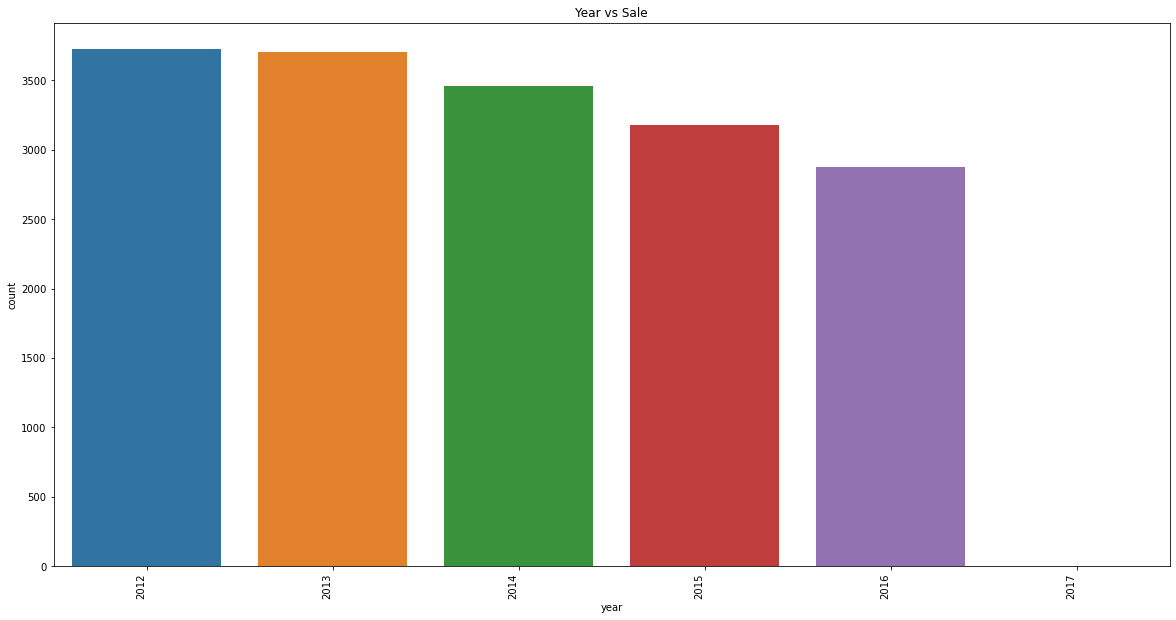

In [13]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=choice_data['year'], data=choice_data)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right", fontsize=10);
g.set_title('Year vs Sale');

The sale of product 1359 is highest in 2012 and least in 2017. Overall it shows decrease in sale over years.

__Countplot for month__

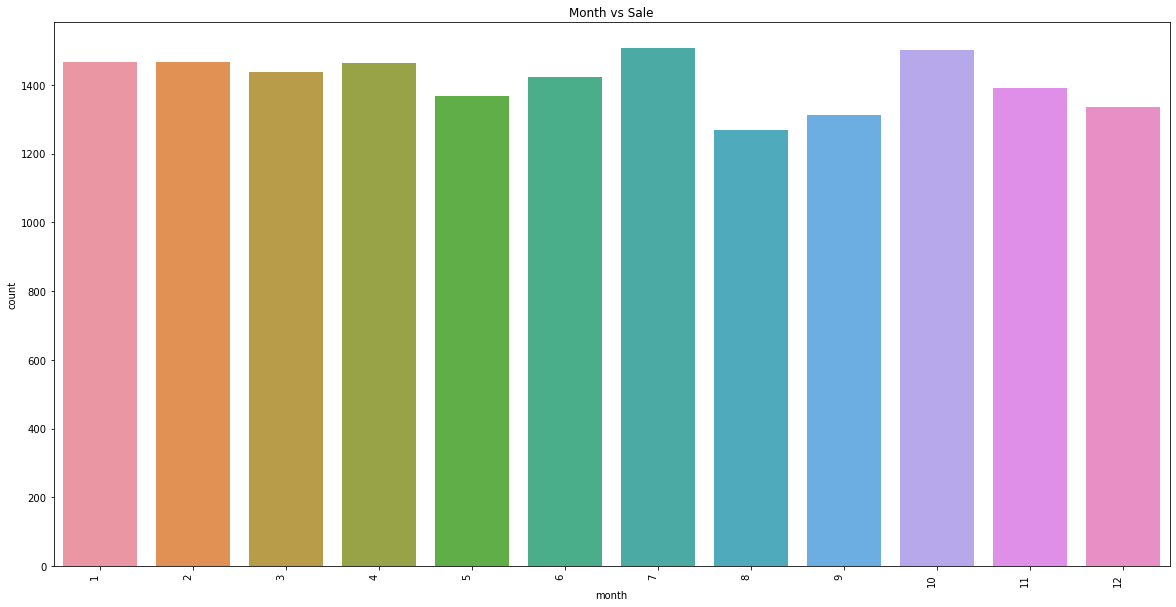

In [14]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=choice_data['month'], data=choice_data)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right", fontsize=10);
g.set_title('Month vs Sale');

The sale of product 1359 is highest in august and least in september.

__Countplot for day__

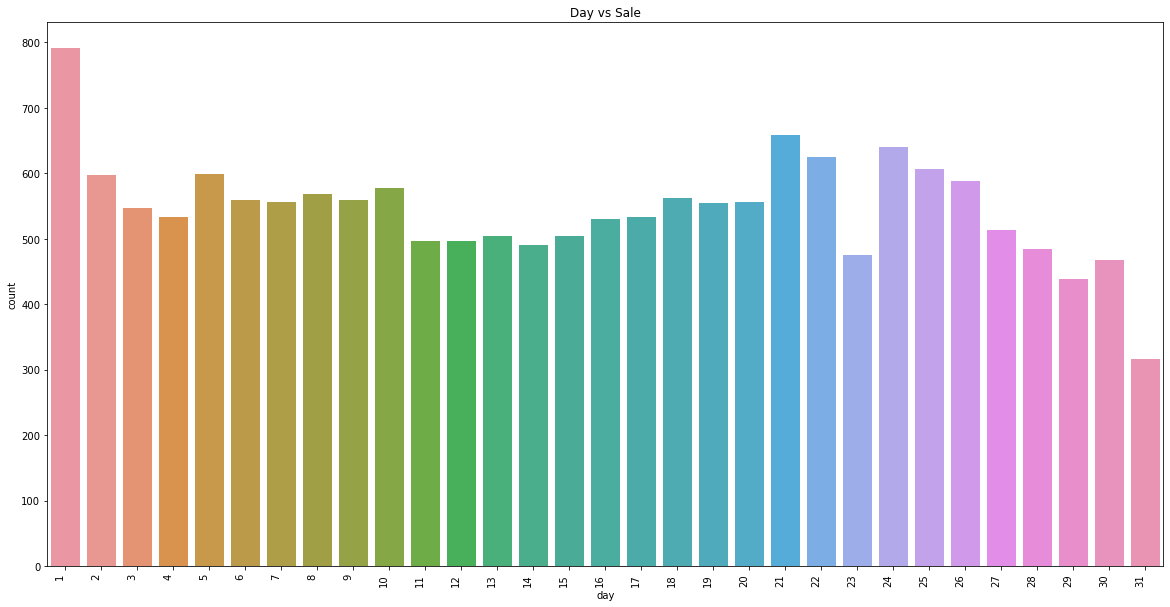

In [15]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=choice_data['day'], data=choice_data)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right", fontsize=10);
g.set_title('Day vs Sale');

The sale of product 1359 is highest in 1st and least in 31st of every month.

__Countplot for day of the week__

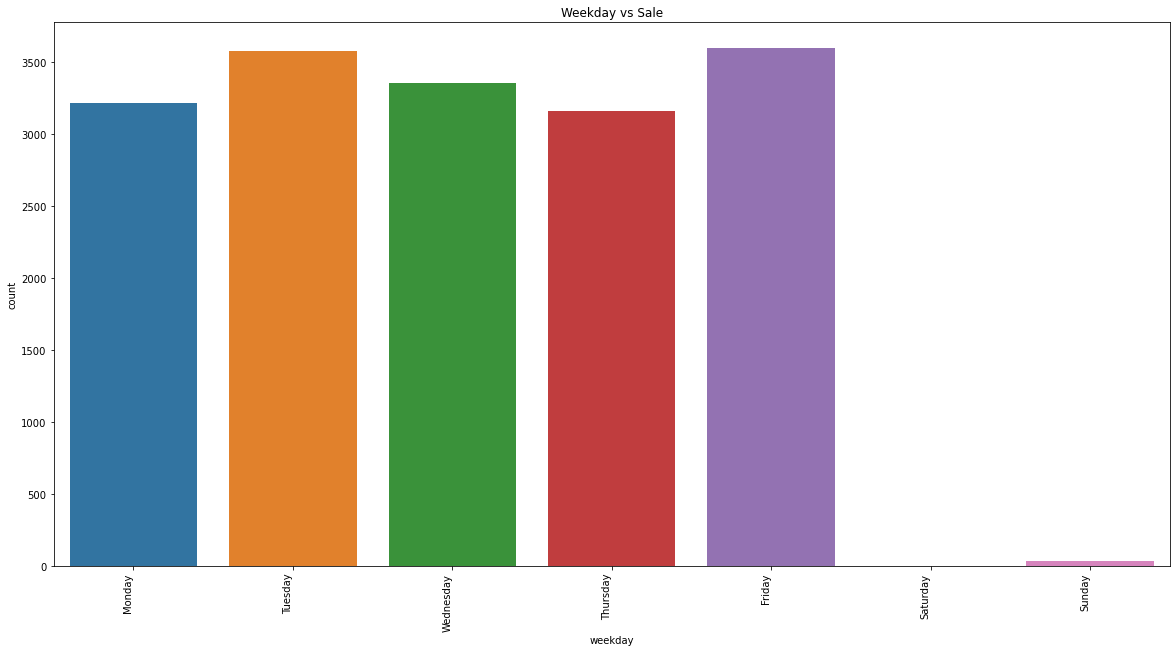

In [16]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=choice_data['weekday'], data=choice_data)
g.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=90, ha="right", fontsize=10);
g.set_title('Weekday vs Sale');

The sale of product 1359 is highest on Friday and least on Saturday. Overall it shows higher sales on weekdays compared to weekend.

__Warehouse for the product__

In [17]:
print("Warehouse for the chosen product is ", choice_data['Warehouse'].unique()[0])

Warehouse for the chosen product is  Whse_J


__Category for the product__

In [18]:
print("Warehouse for the chosen product is ", choice_data['Product_Category'].unique()[0])

Warehouse for the chosen product is  Category_019


__Average Order Demand over years__

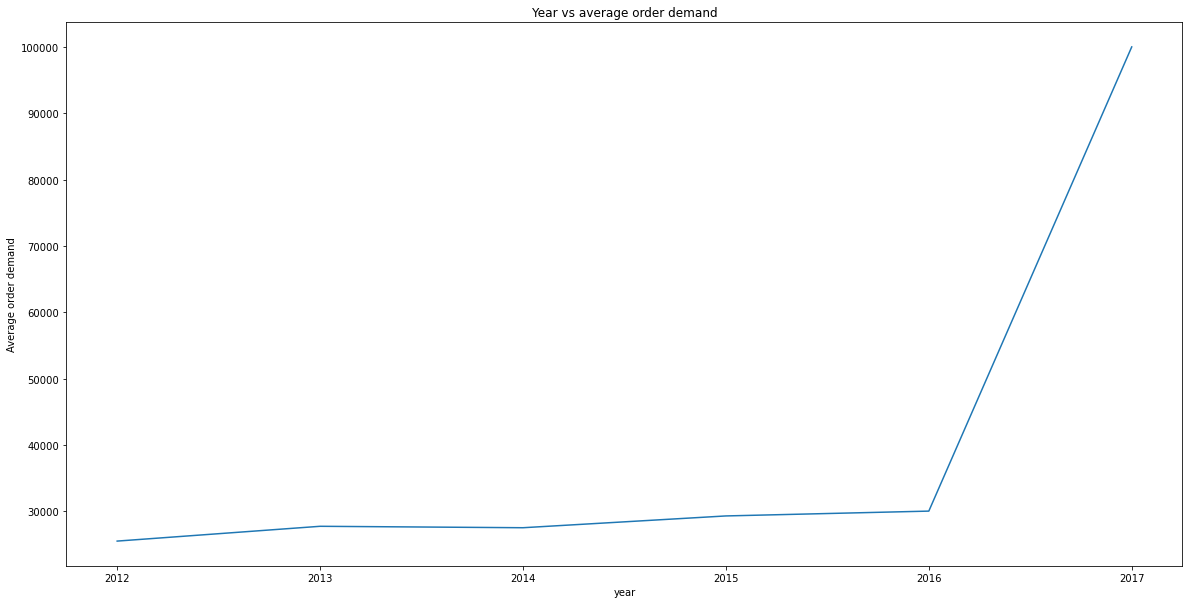

In [19]:
y=choice_data['year'].unique()
o_=[];
for i in range(0,len(y)):
    o=choice_data.loc[choice_data['year']==y[i]]
    o=choice_data['Order_Demand'].loc[choice_data['year']==y[i]].mean()
    o_.append(o)
y=list(y)
data = {'x_': y,
        'y_': o_}
df = pd.DataFrame (data, columns = ['x_','y_'])
plt.figure(figsize=(20,10))
sns.lineplot(x="x_", y="y_", data=df)
plt.xlabel('year')
plt.ylabel('Average order demand')
plt.title('Year vs average order demand');

Order demand increases over years with maximum demand in 2017.

__Average Order Demand over months__

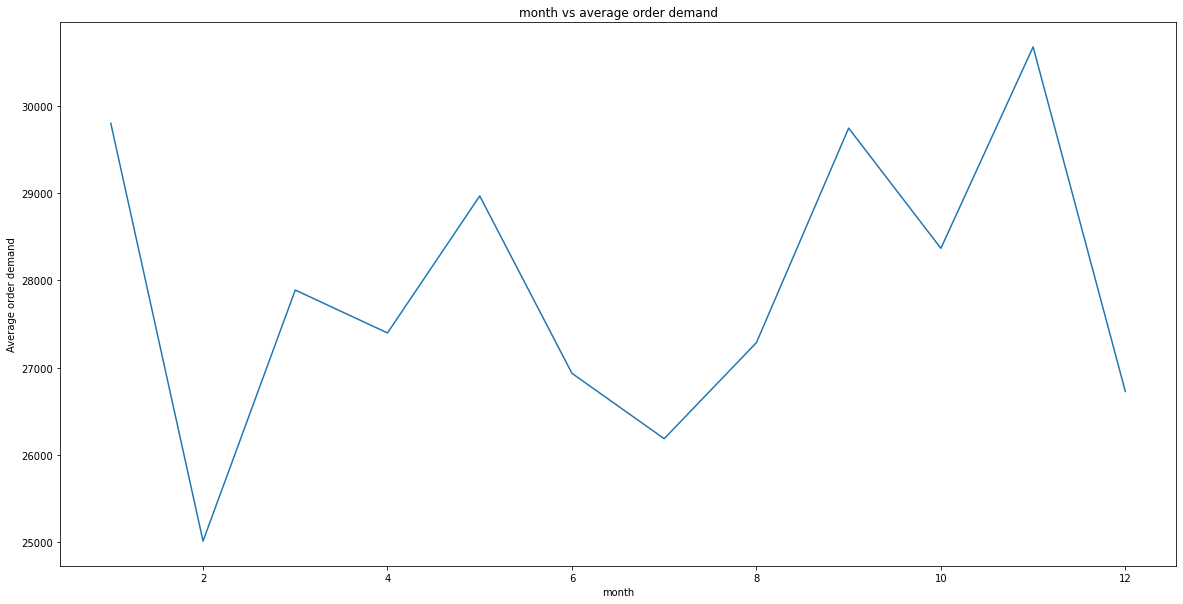

In [20]:
y=np.sort(choice_data['month'].unique())
o_=[];
for i in range(0,len(y)):
    o=choice_data.loc[choice_data['month']==y[i]]
    o=choice_data['Order_Demand'].loc[choice_data['month']==y[i]].mean()
    o_.append(o)
y=list(y)
data = {'x_': y,
        'y_': o_}
df = pd.DataFrame (data, columns = ['x_','y_'])
import seaborn as sns
plt.figure(figsize=(20,10))
sns.lineplot(x="x_", y="y_", data=df)
plt.xlabel('month')
plt.ylabel('Average order demand')
plt.title('month vs average order demand');

For product 1359, the average order demand is highest in november and least in february.

__Average Order Demand over weekdays__

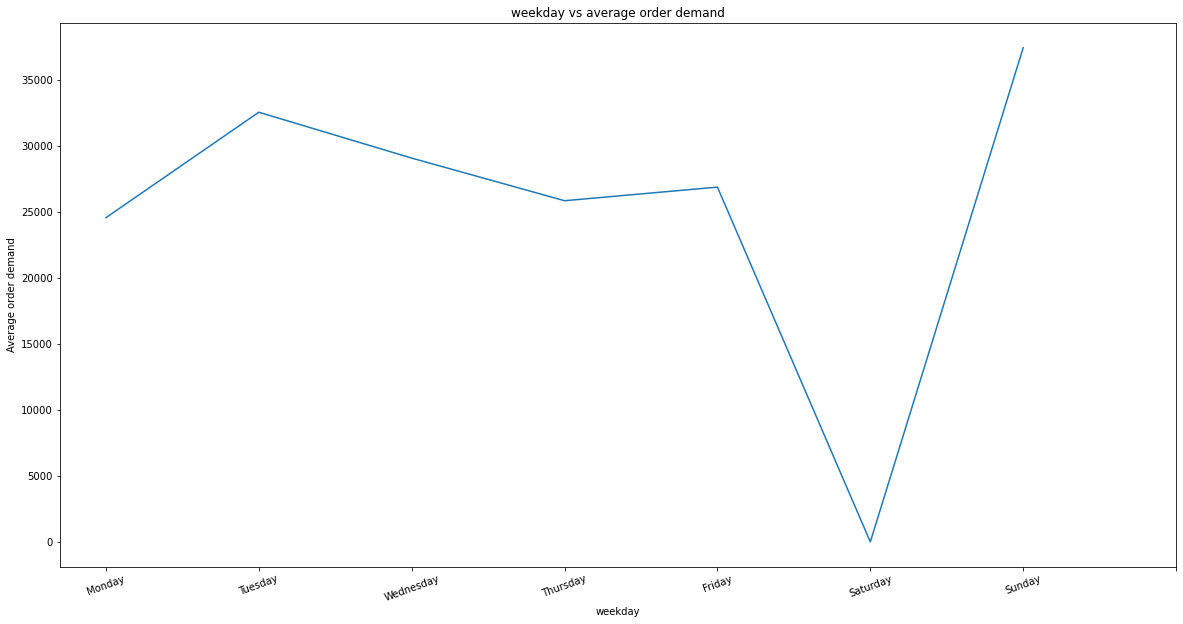

In [21]:
y=np.sort(choice_data['weekday'].unique())
o_=[];
for i in range(0,len(y)):
    o=choice_data.loc[choice_data['weekday']==y[i]]
    o=choice_data['Order_Demand'].loc[choice_data['weekday']==y[i]].mean()
    o_.append(o)
y=list(y)
data = {'x_': y,
        'y_': o_}
df = pd.DataFrame (data, columns = ['x_','y_'])
import seaborn as sns
plt.figure(figsize=(20,10))
sns.lineplot(x="x_", y="y_", data=df)
plt.xlabel('weekday')
plt.ylabel('Average order demand')
plt.title('weekday vs average order demand')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=20);

For product 1359, the average order demand is highest on Sunday and least on Sunday.

__Monthly and weekday order demands for each year__

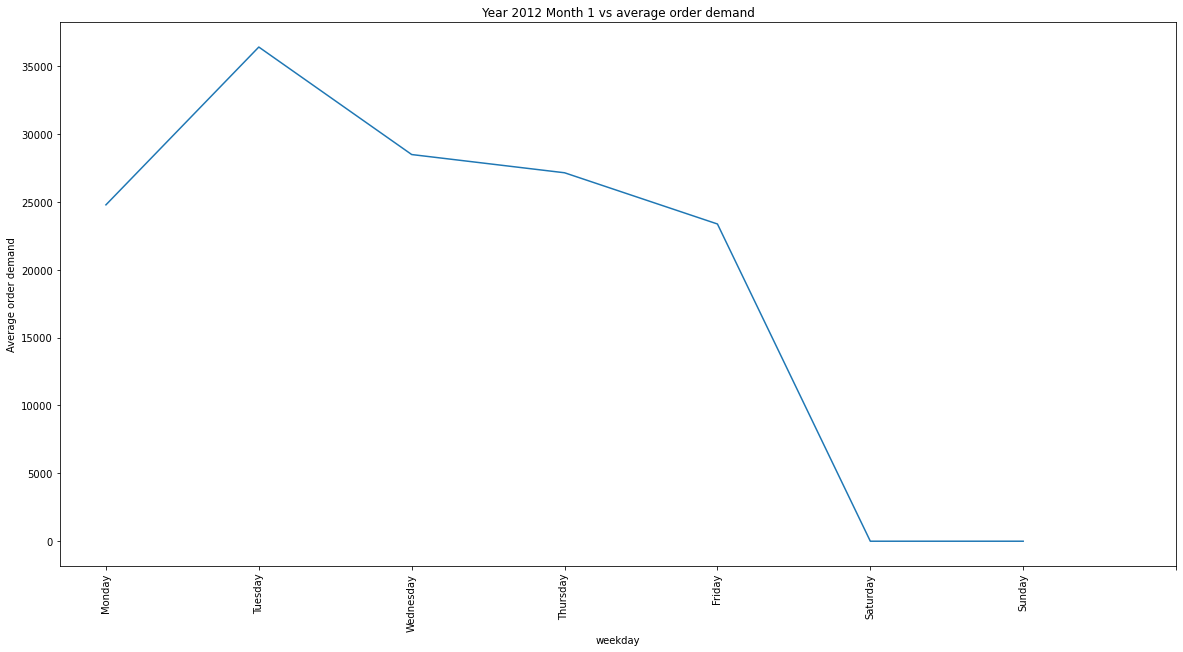

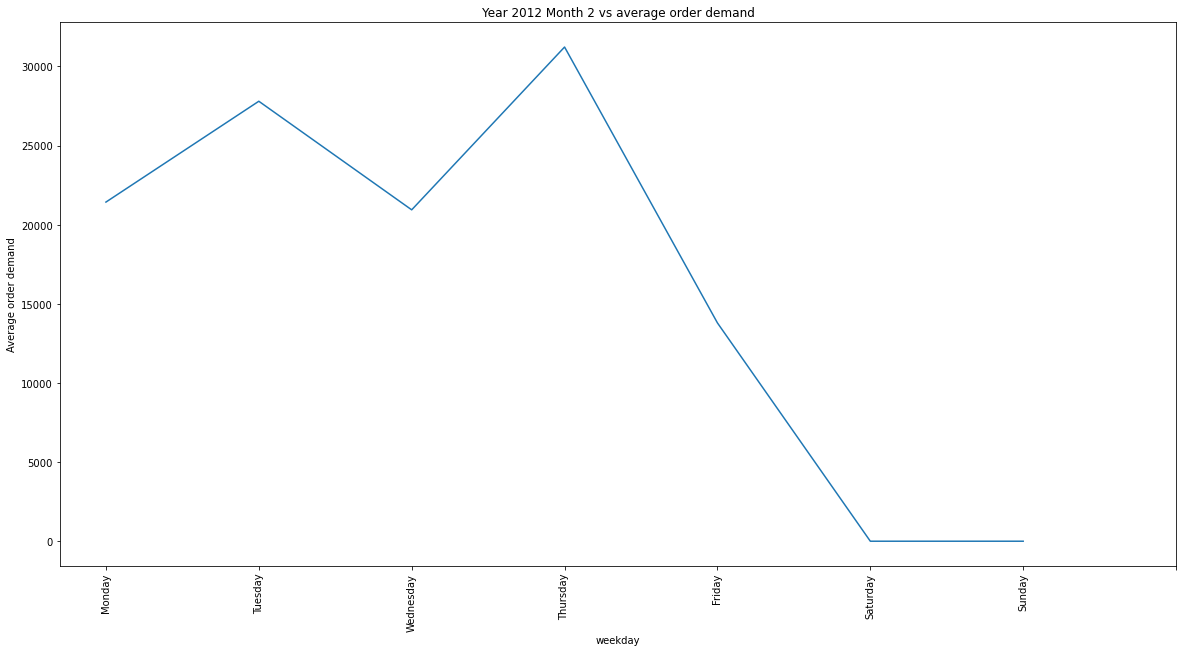

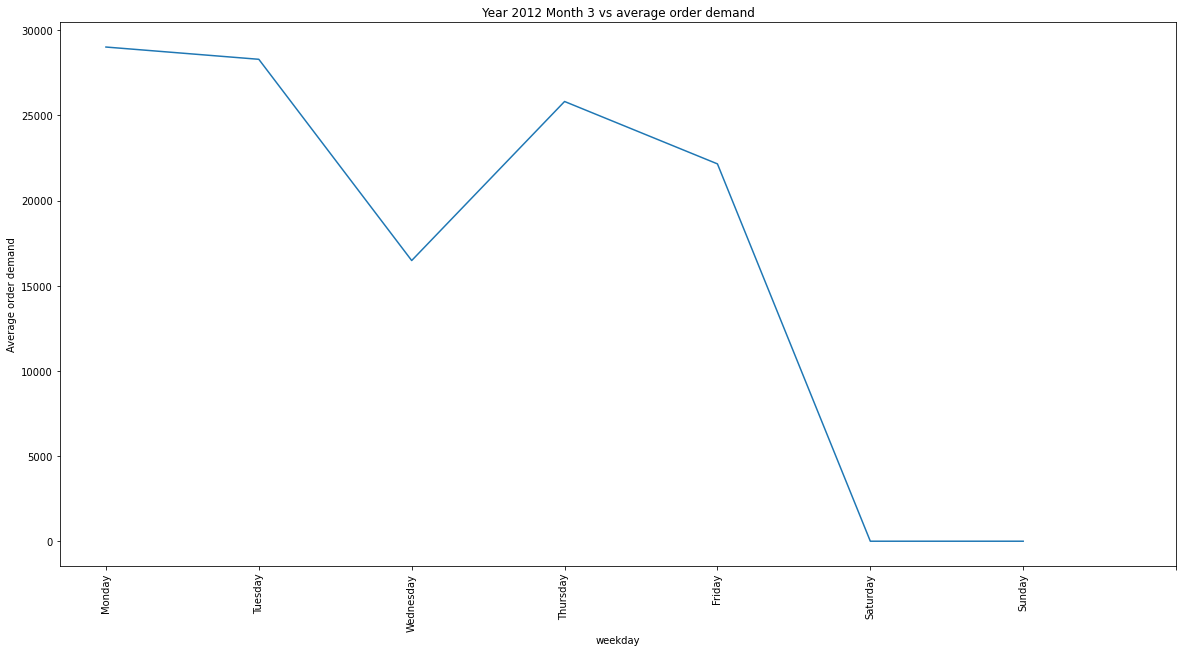

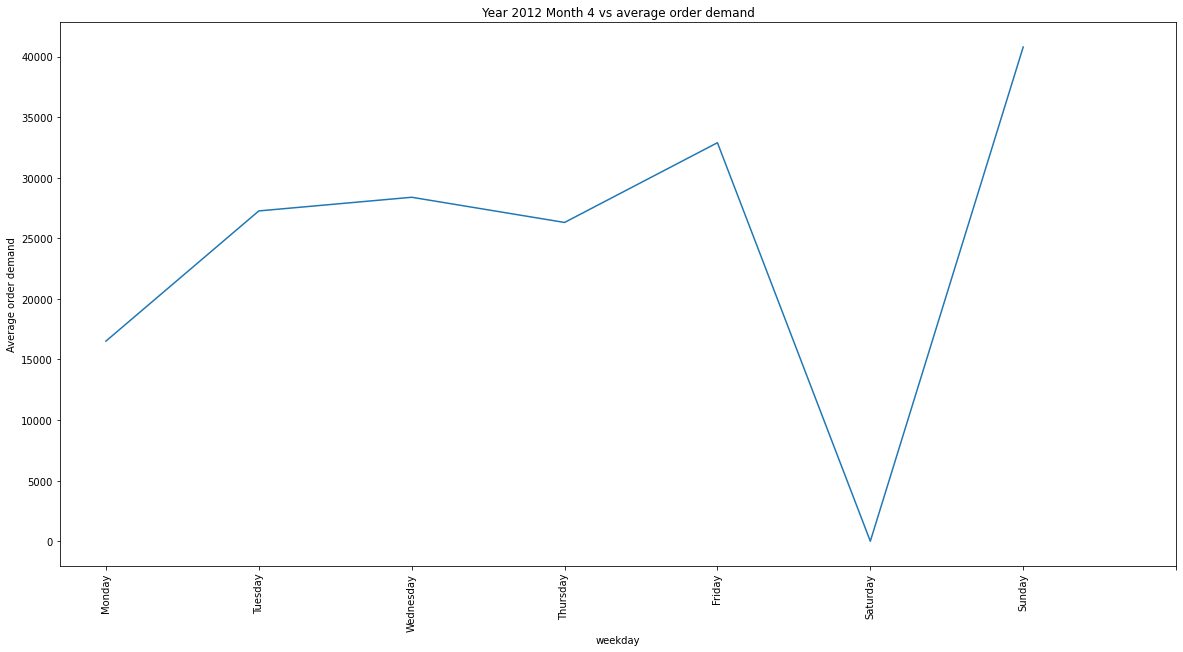

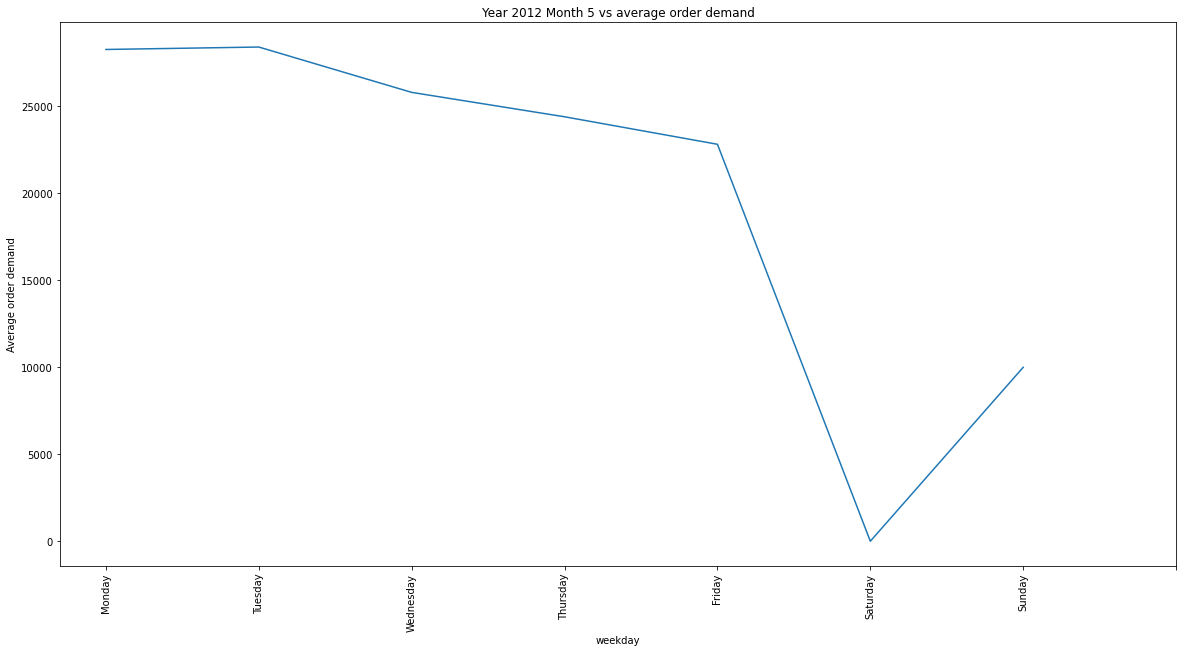

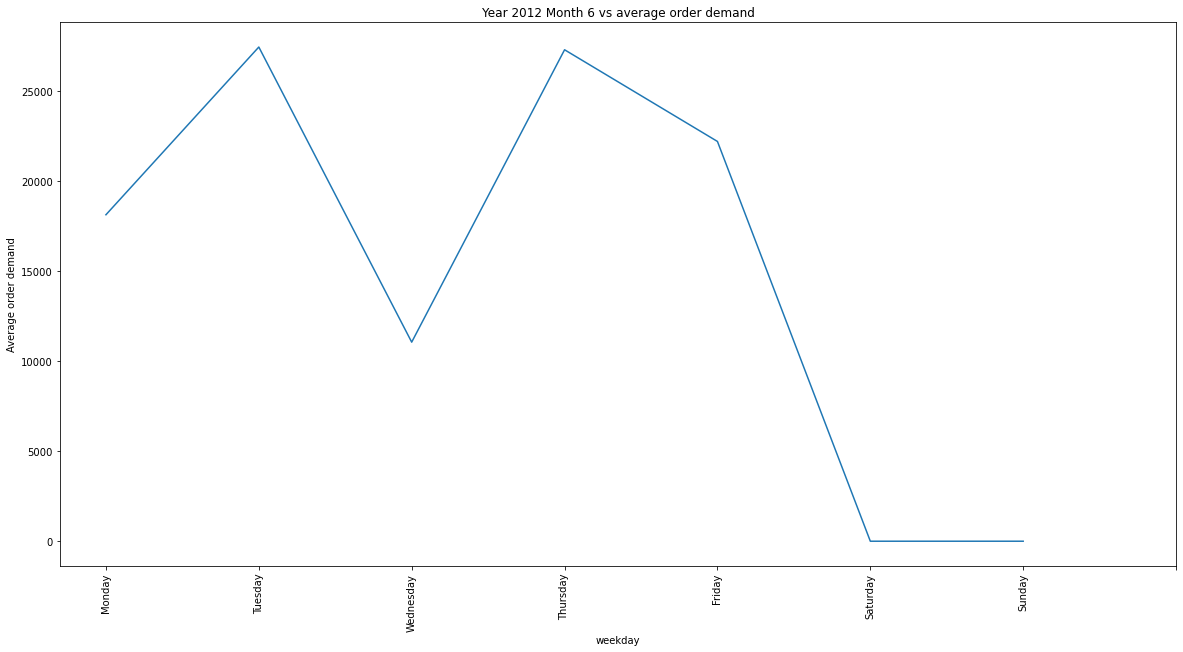

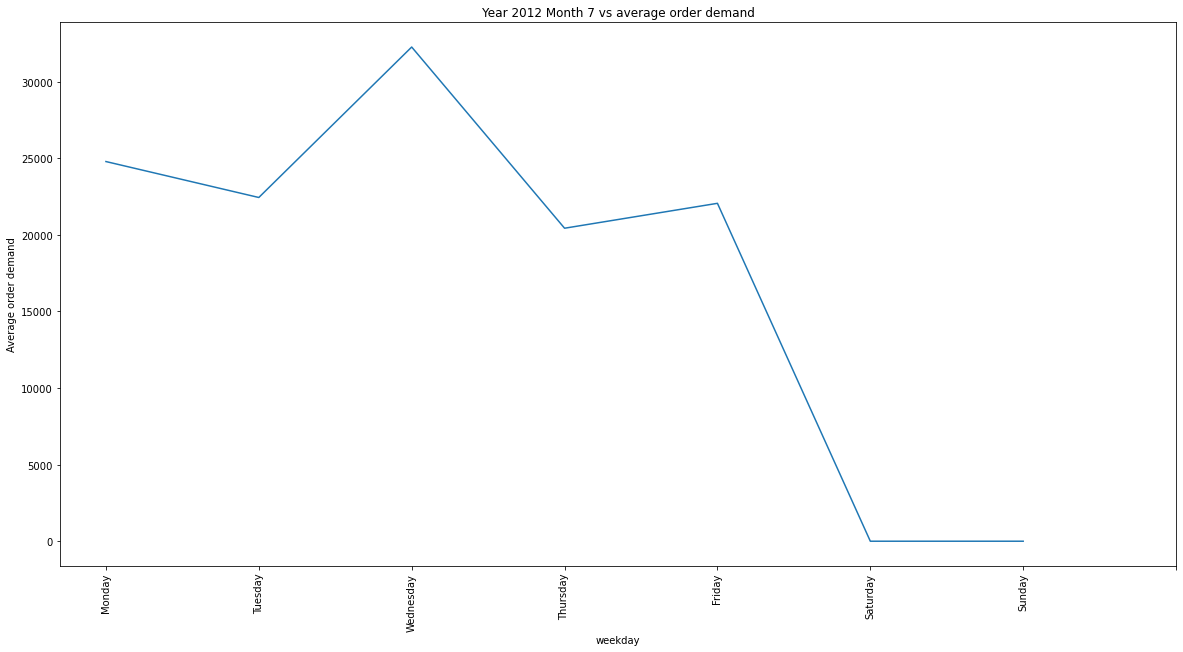

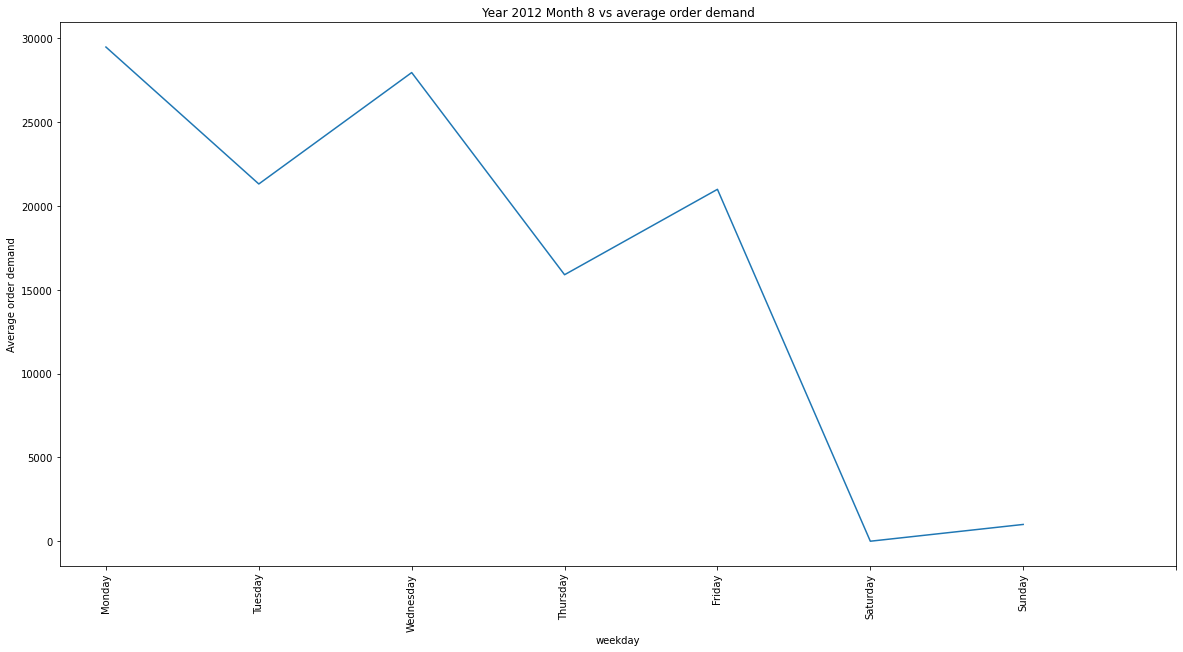

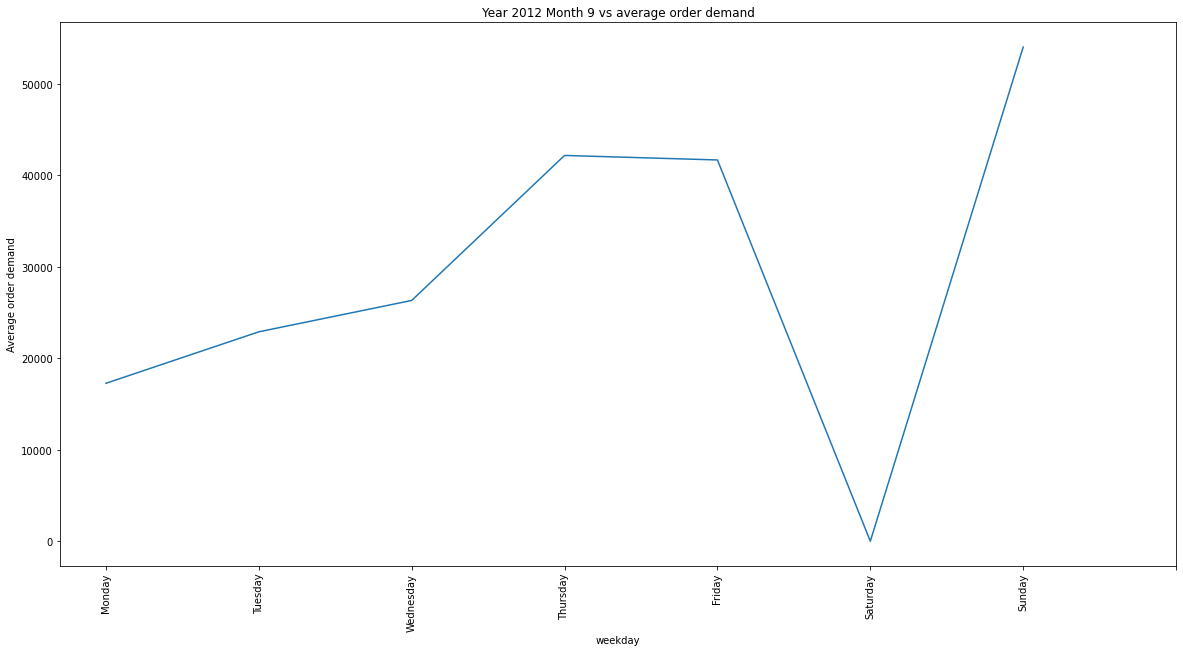

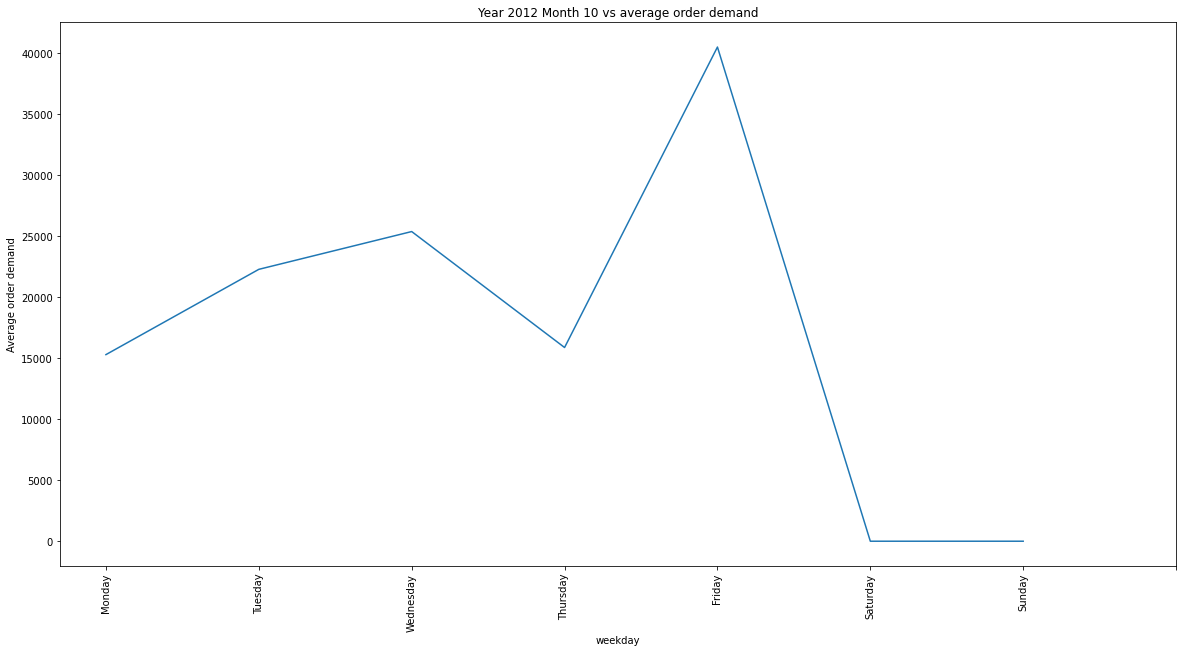

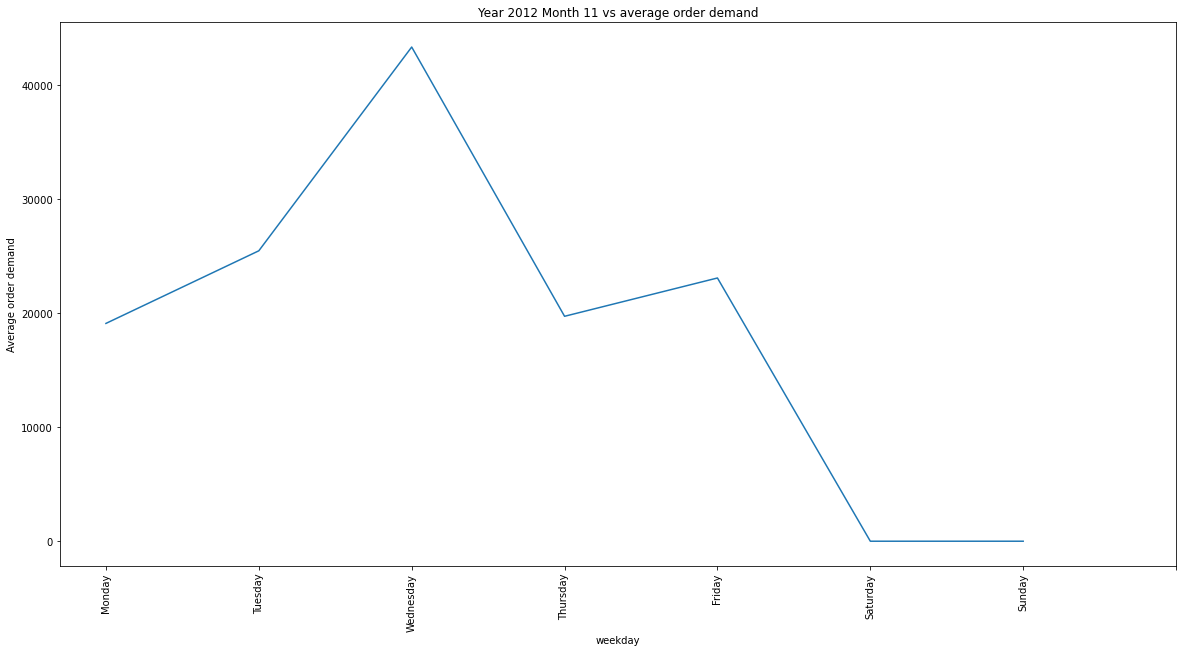

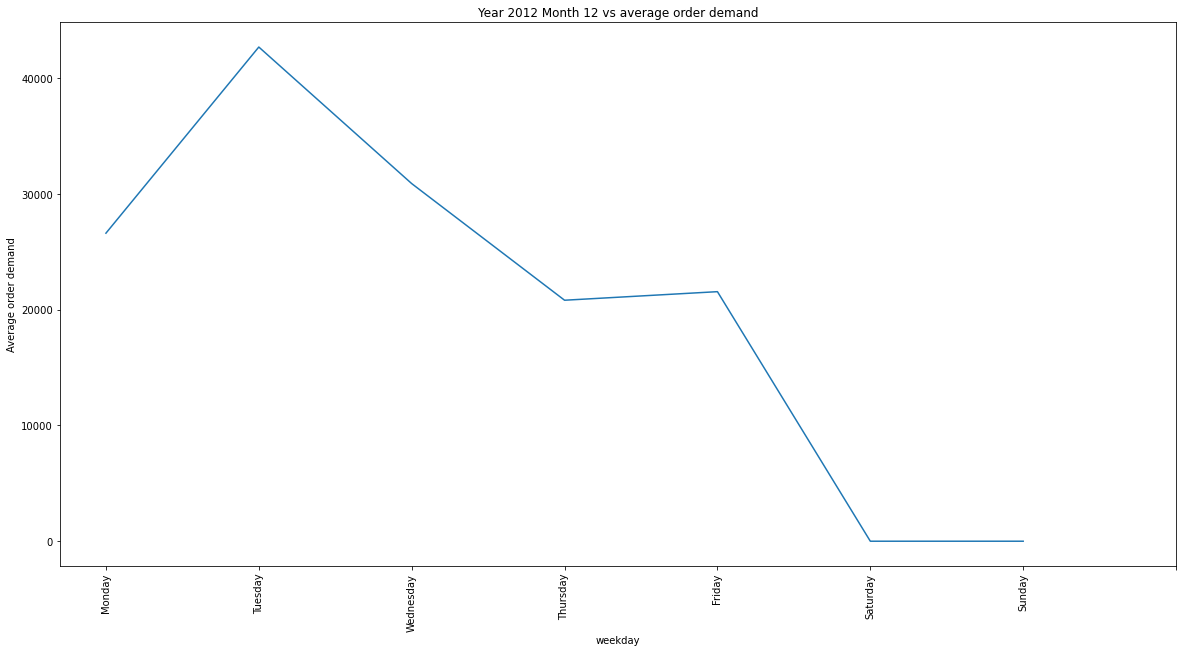

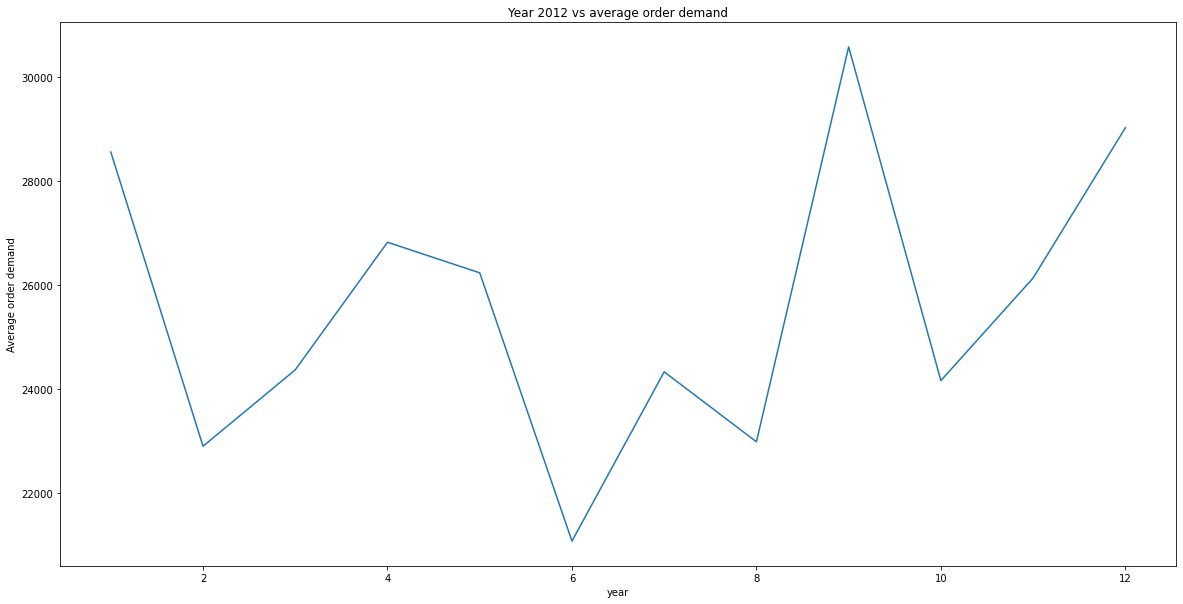

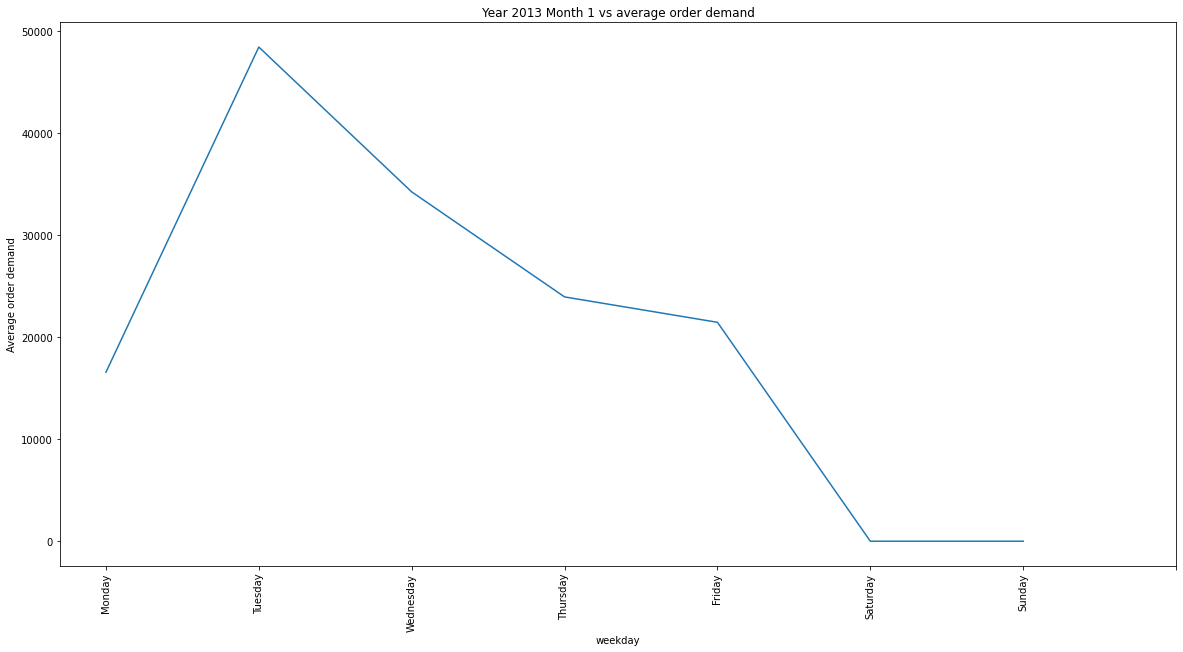

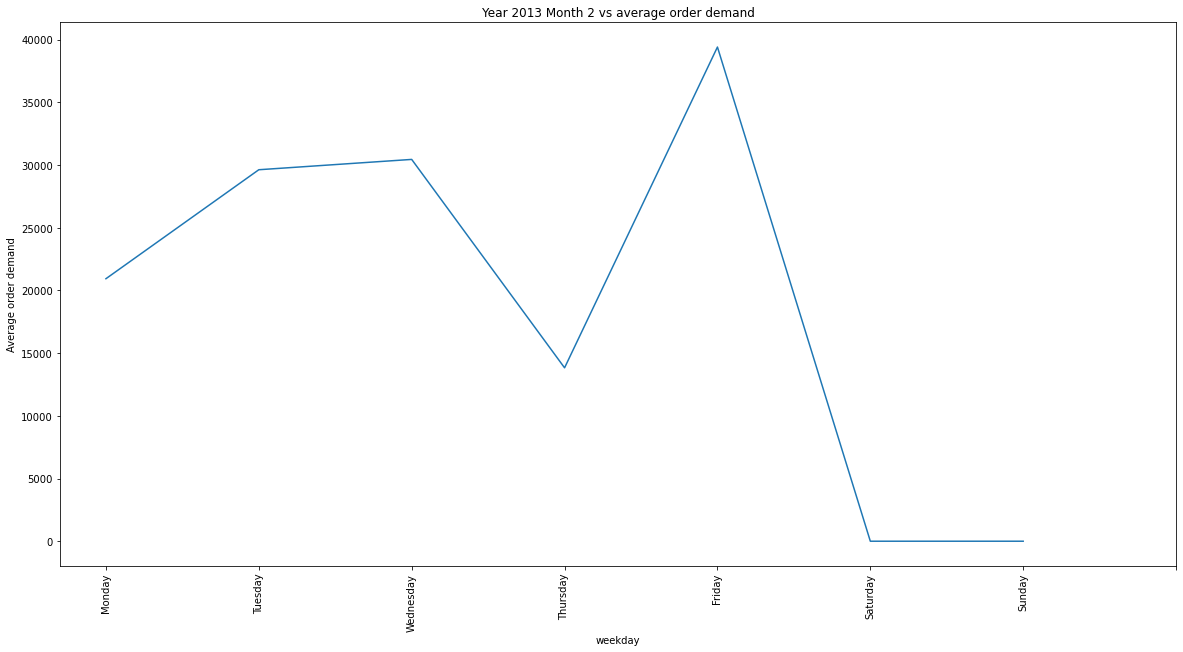

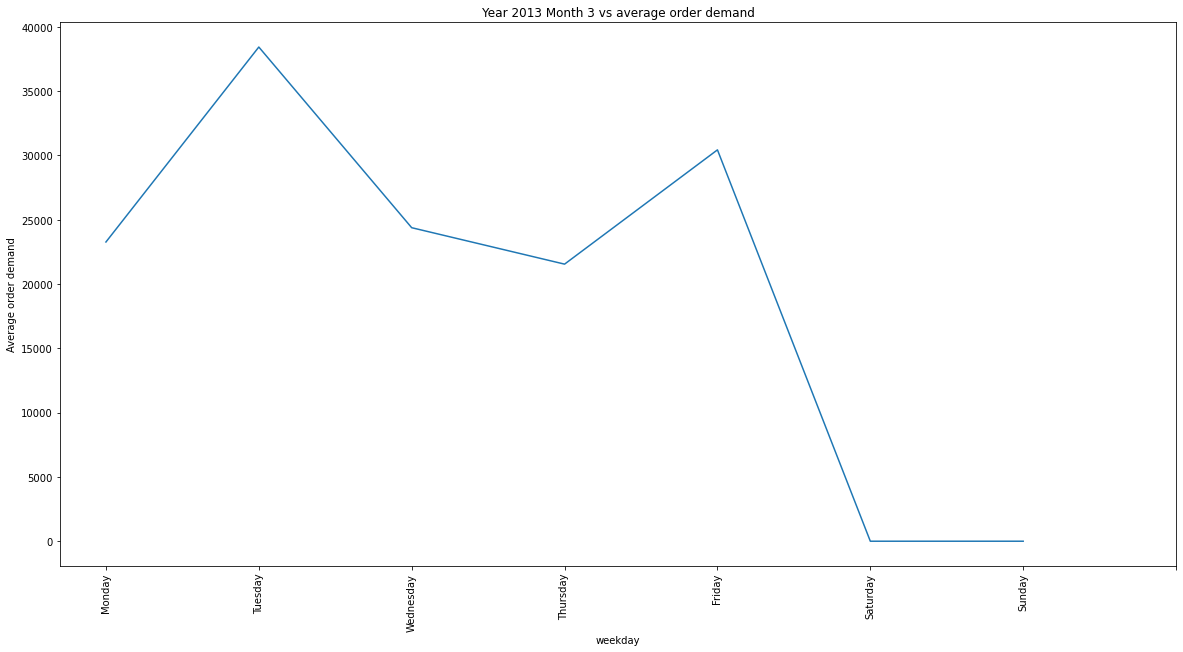

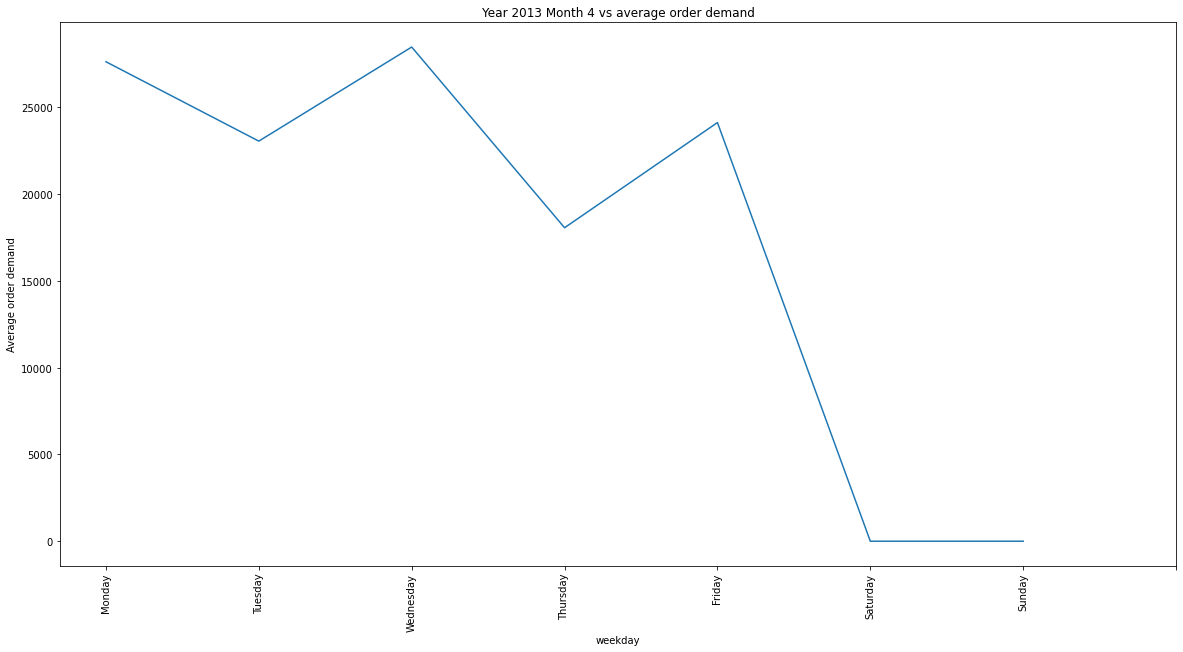

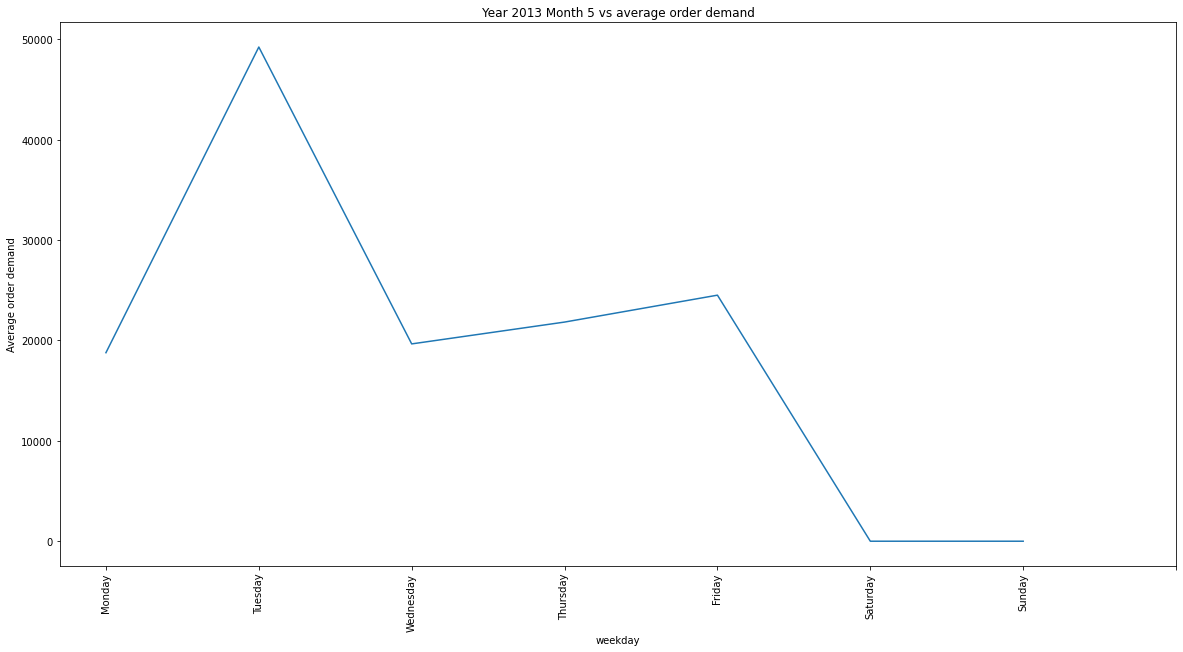

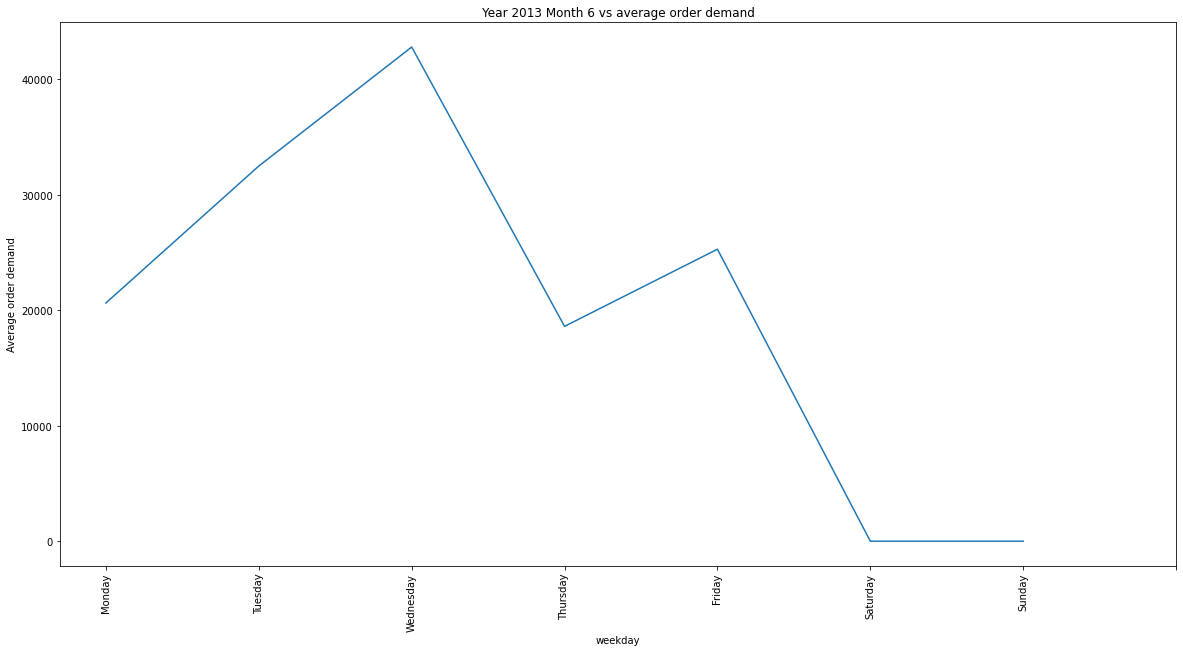

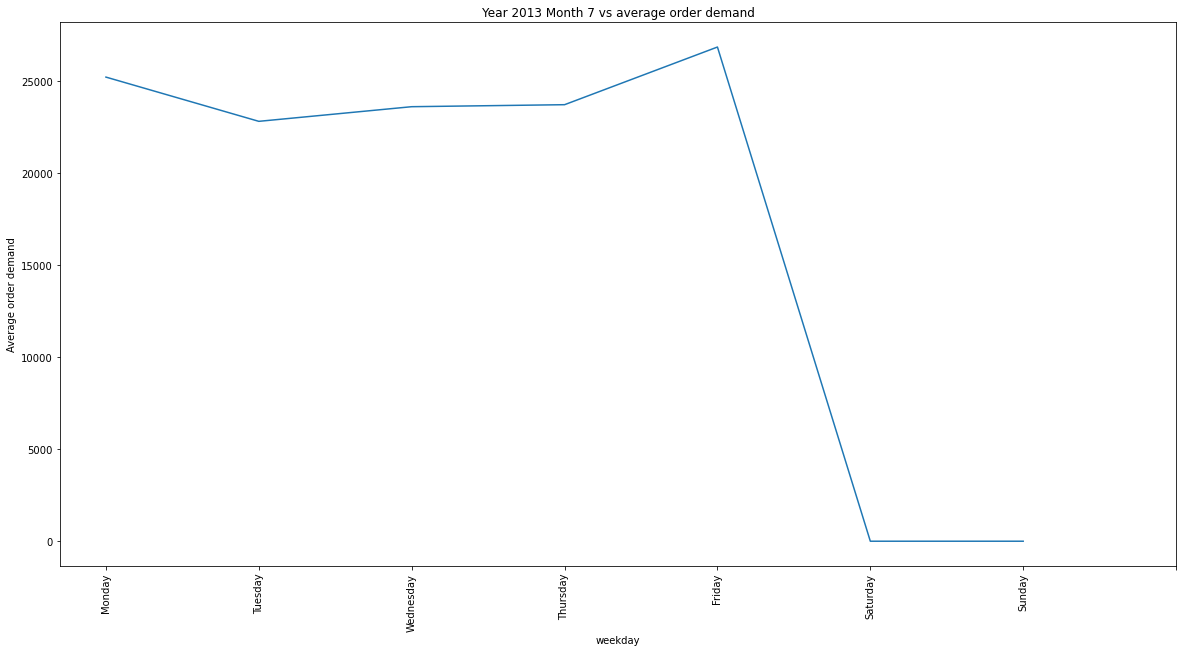

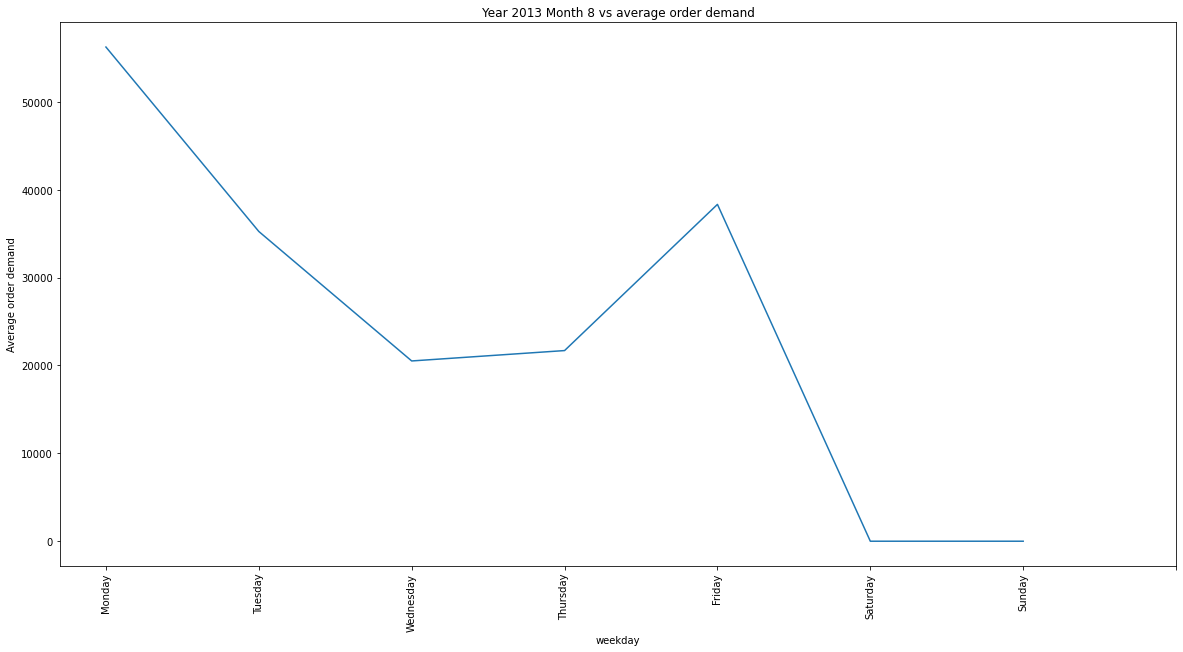

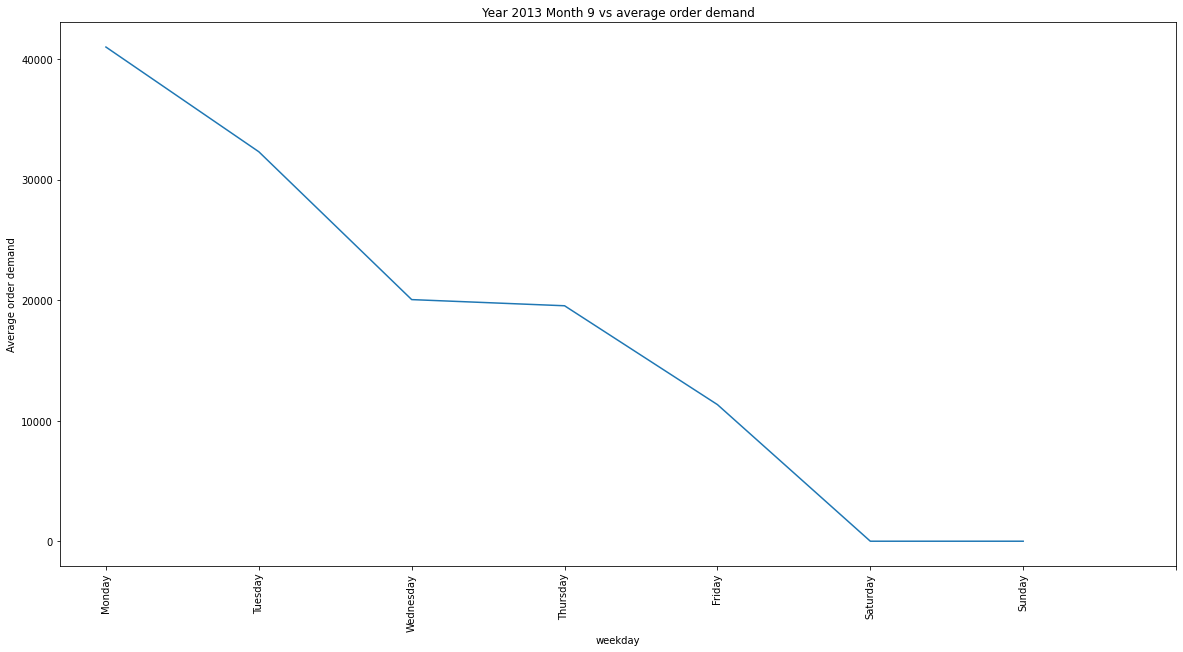

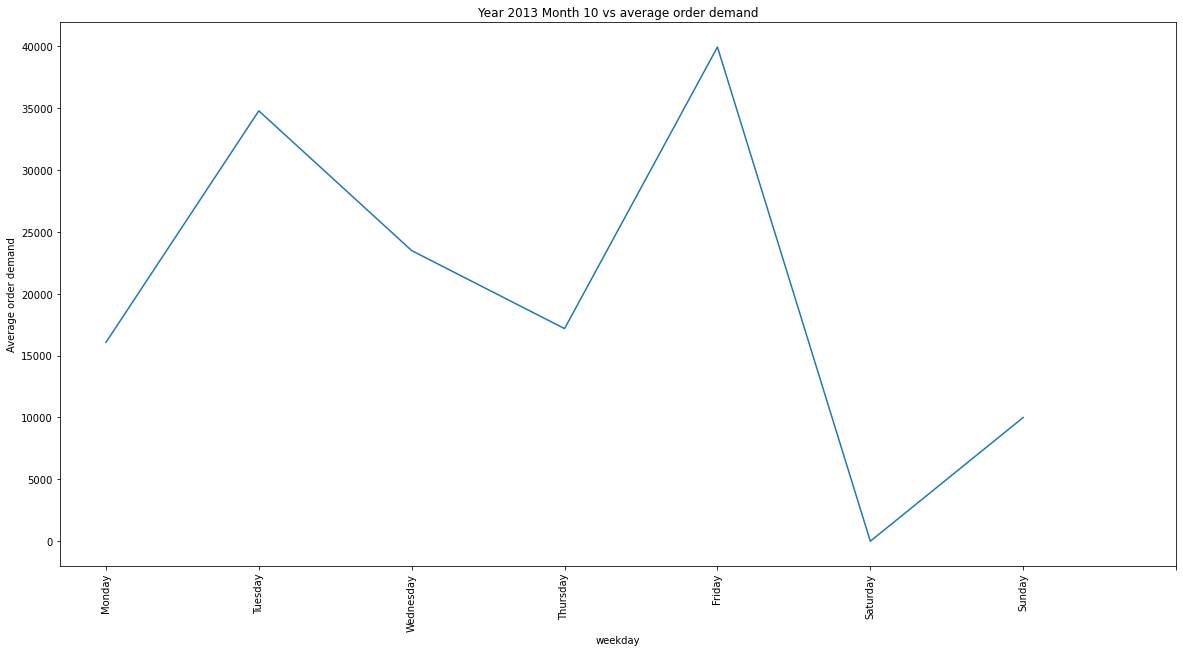

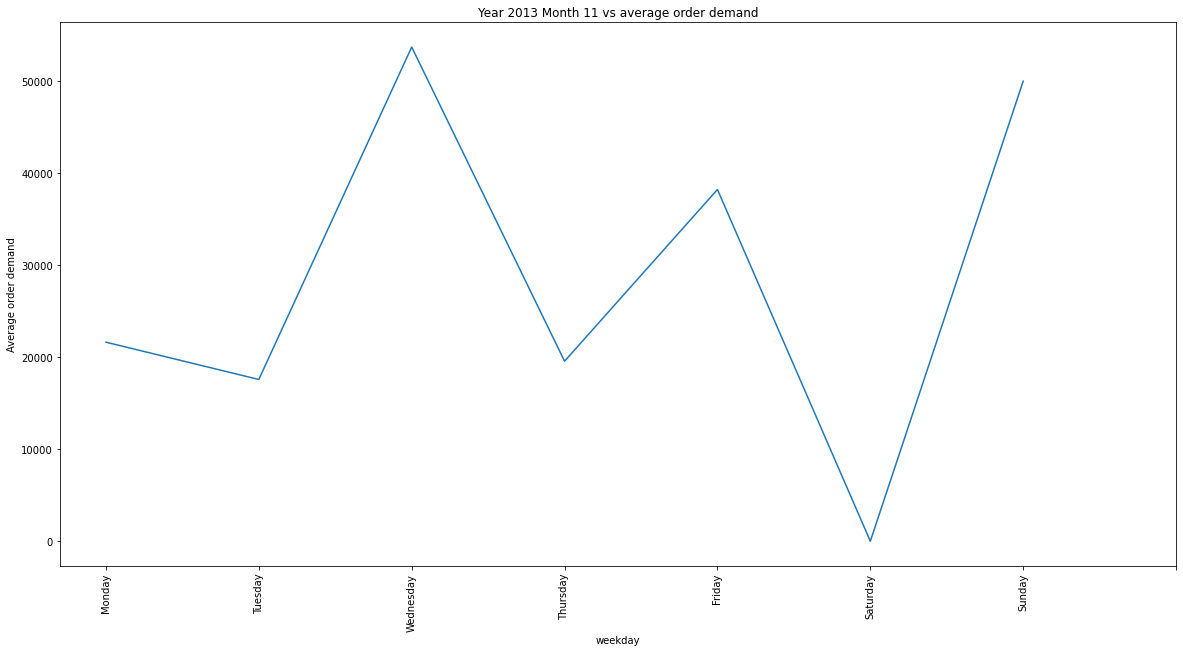

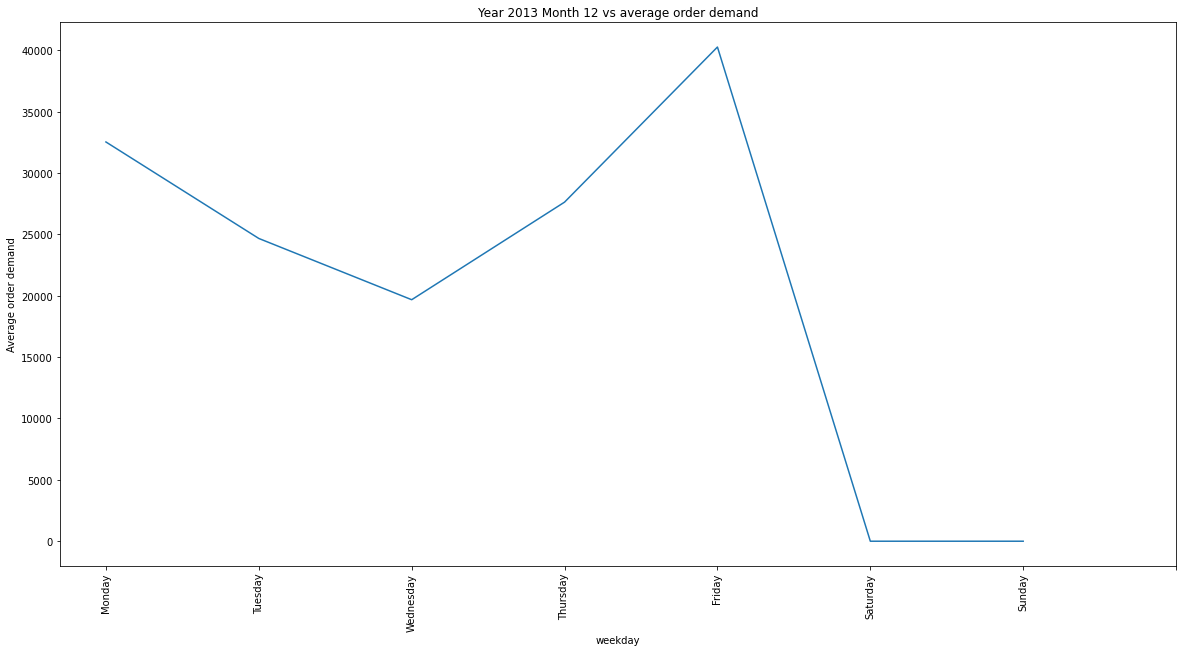

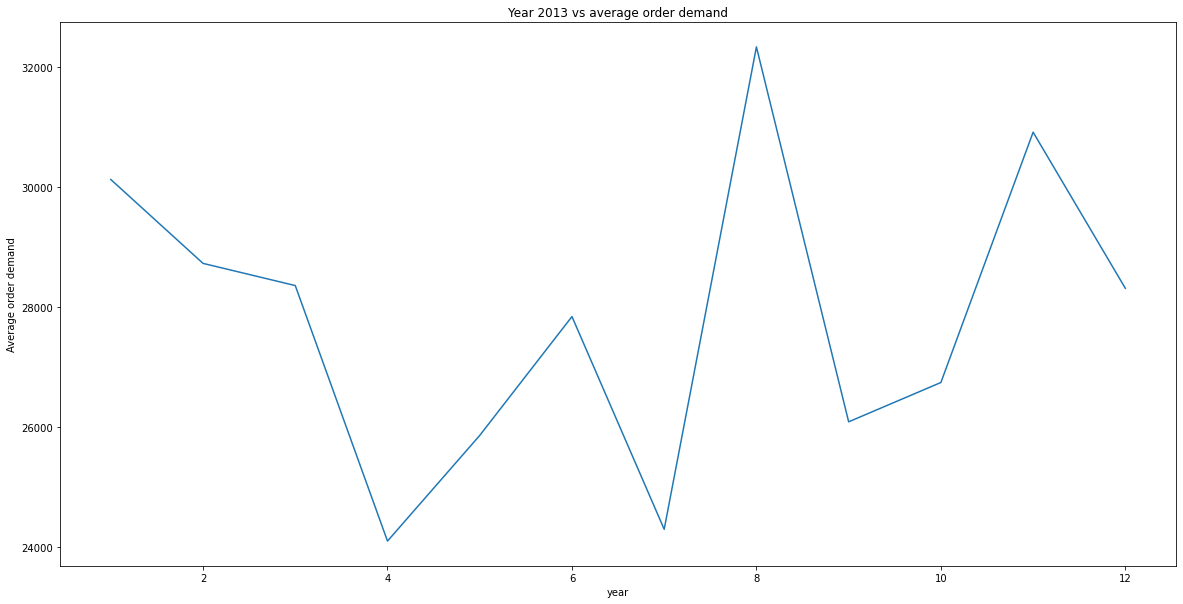

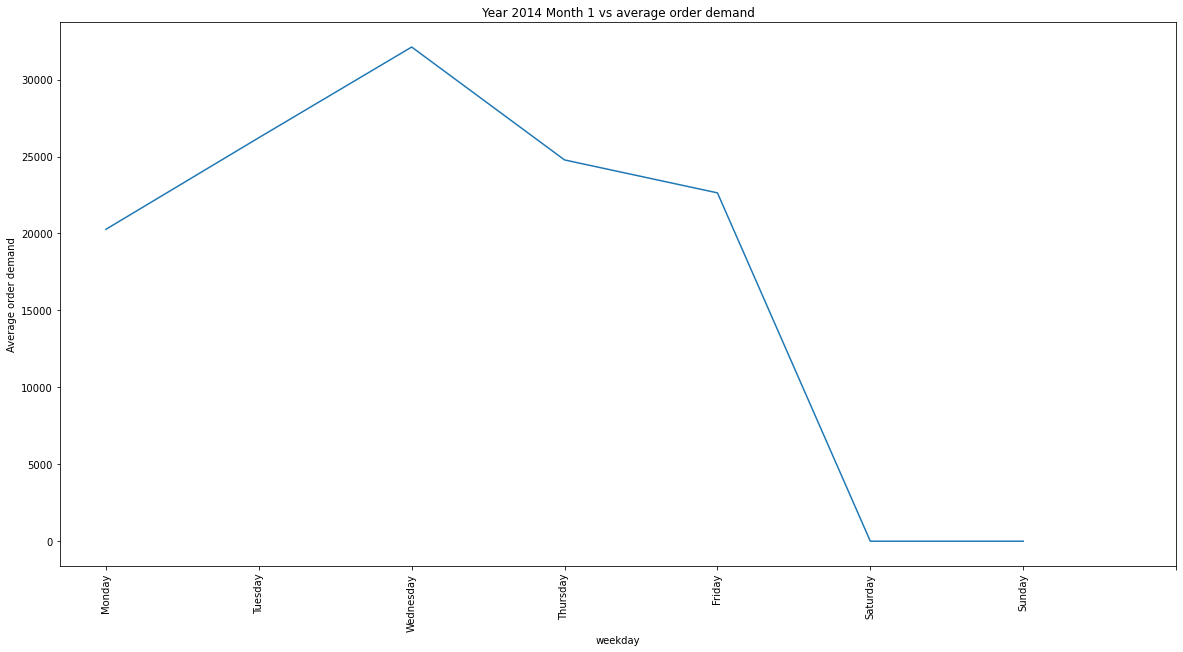

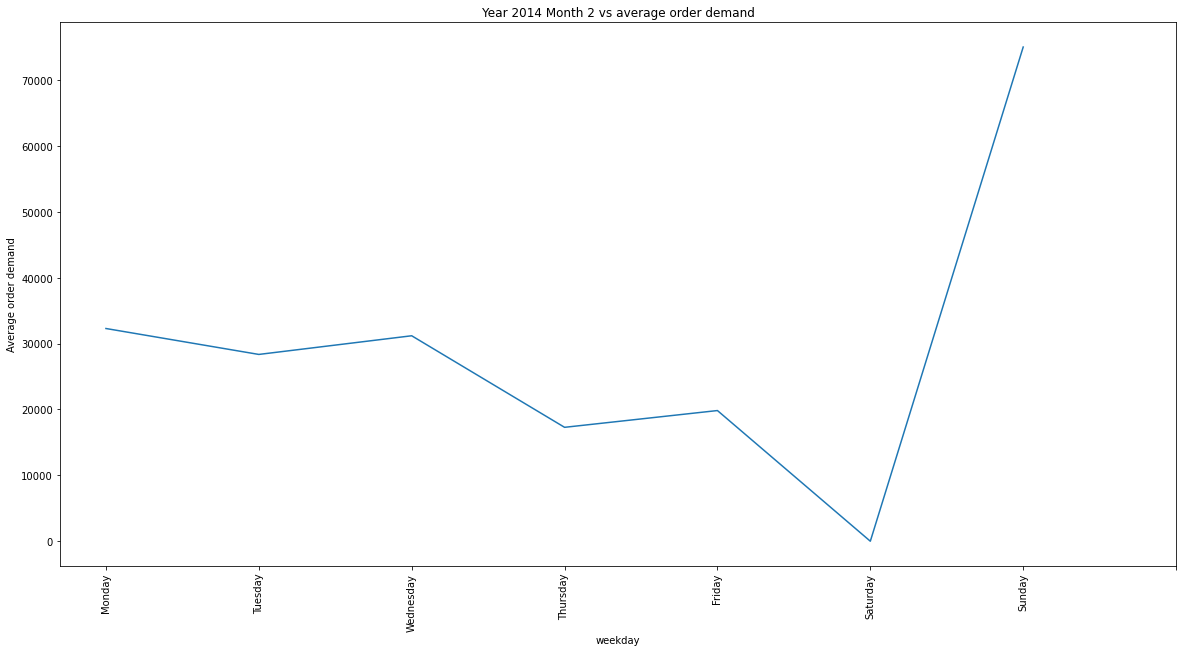

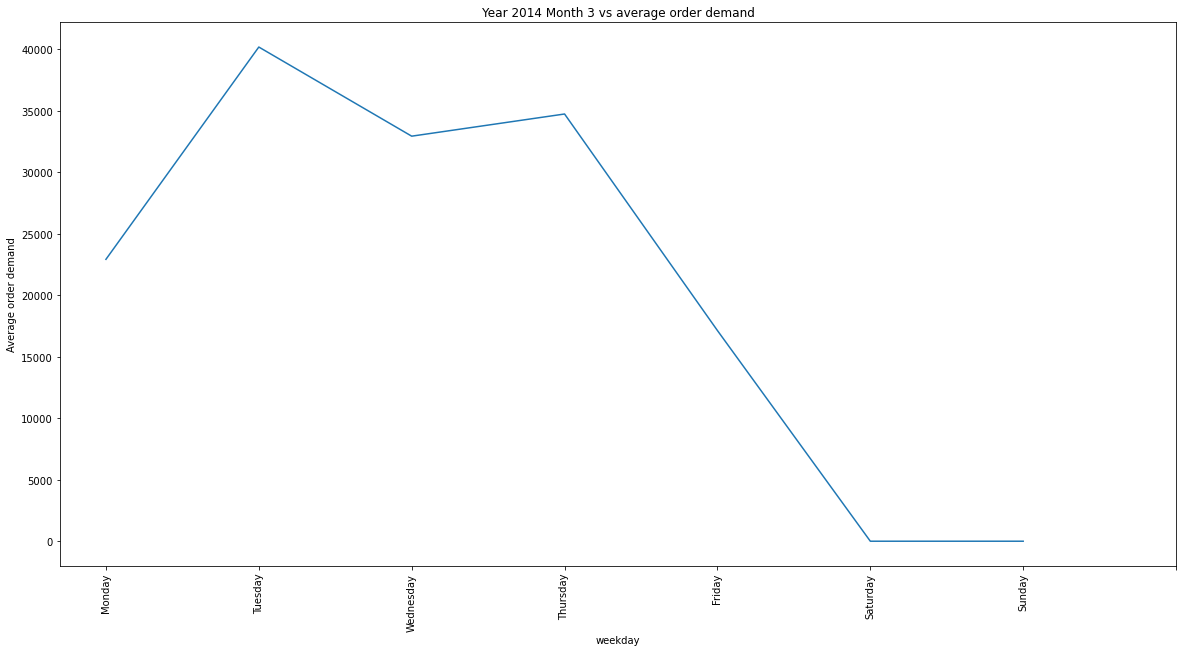

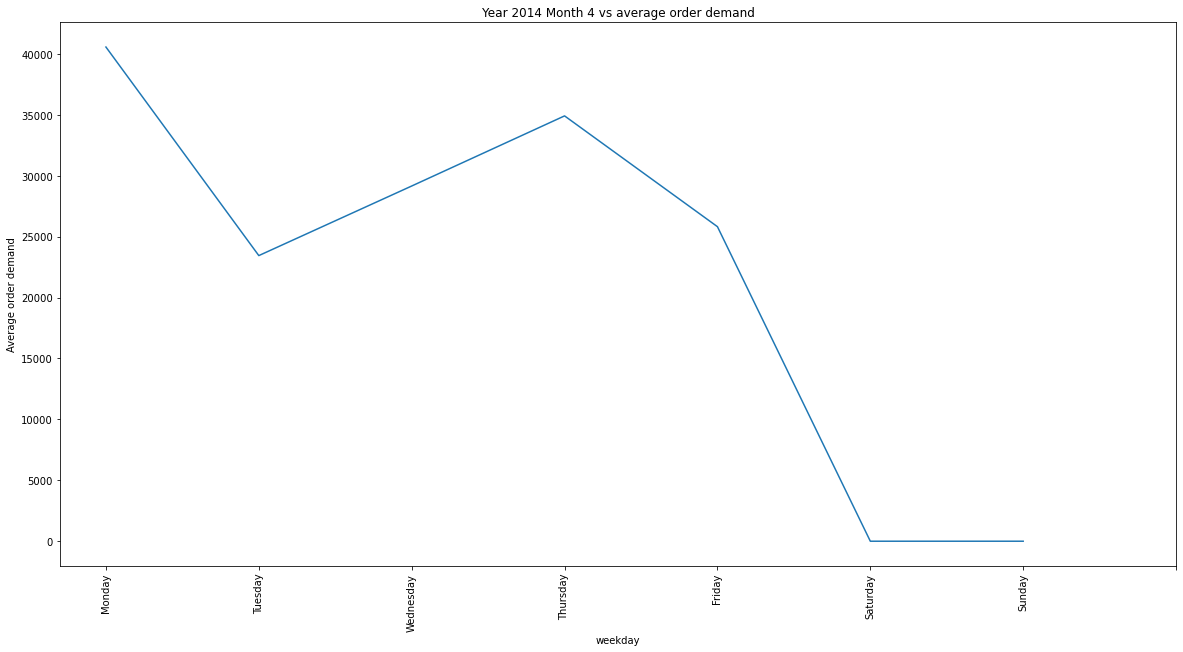

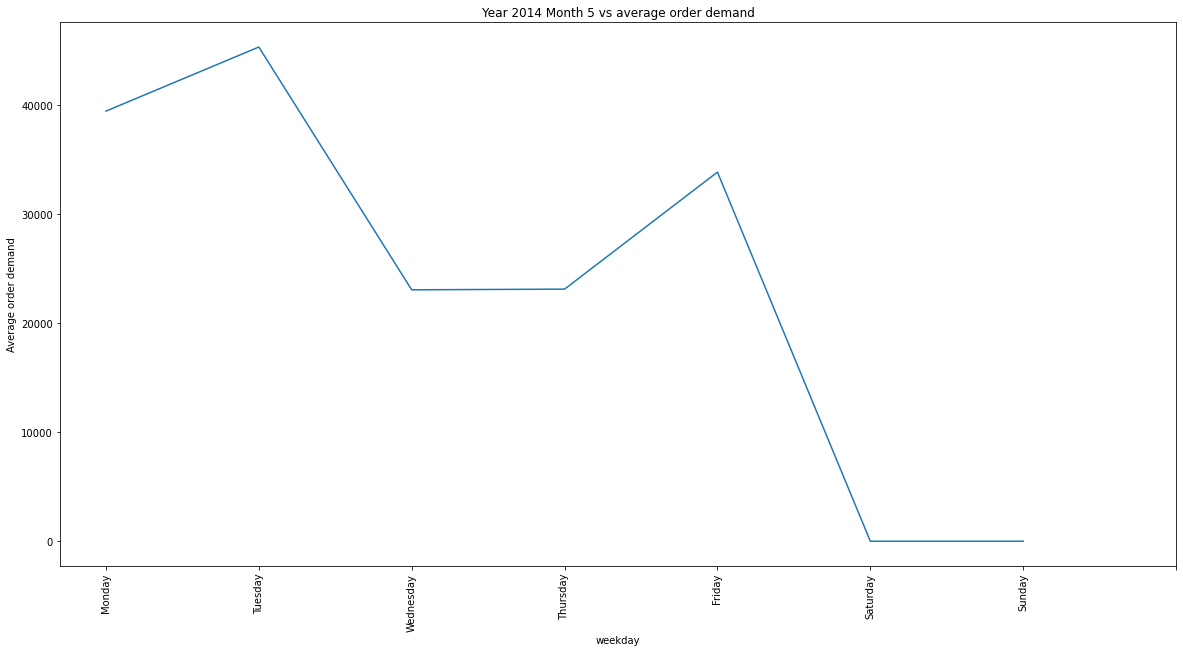

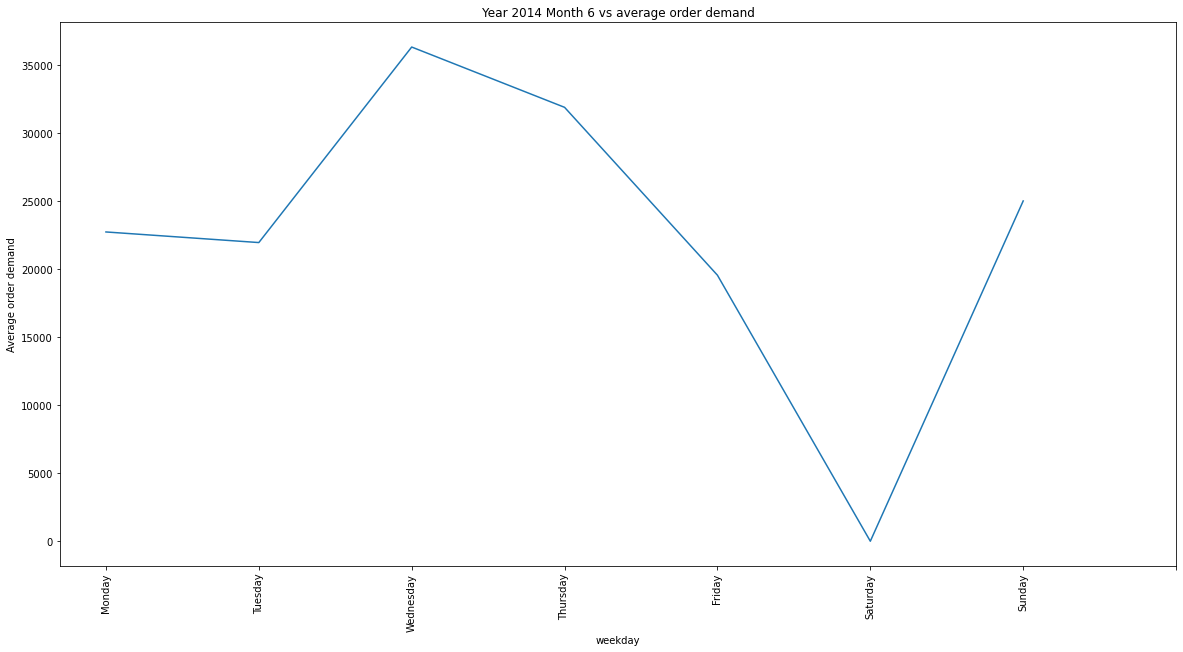

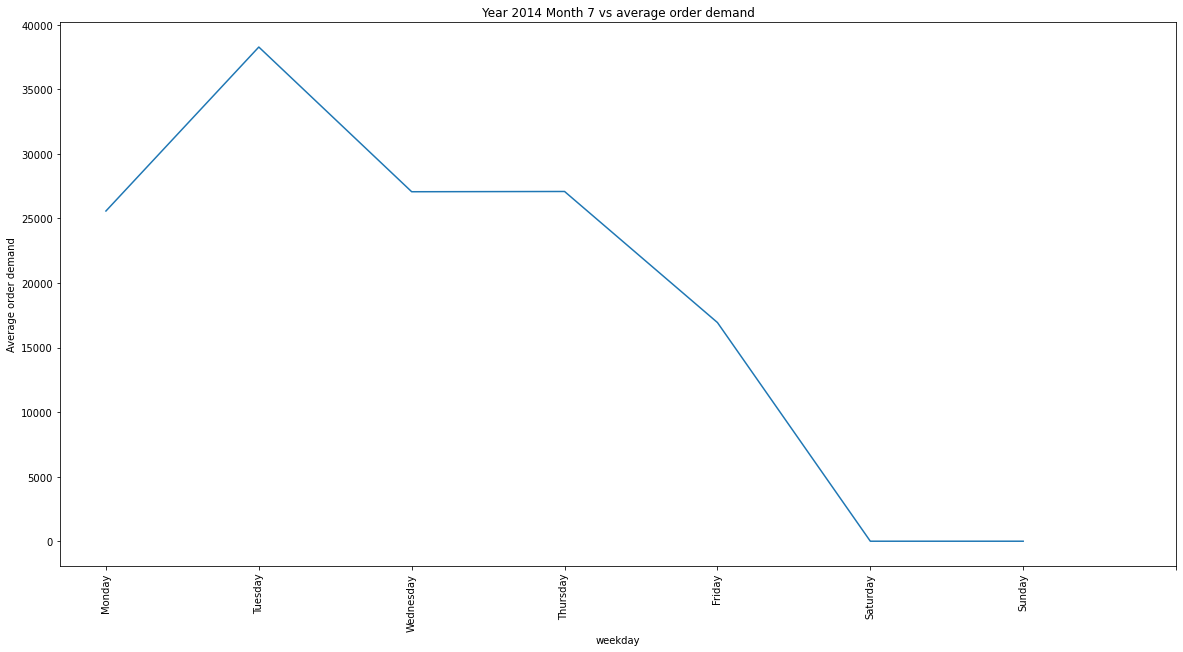

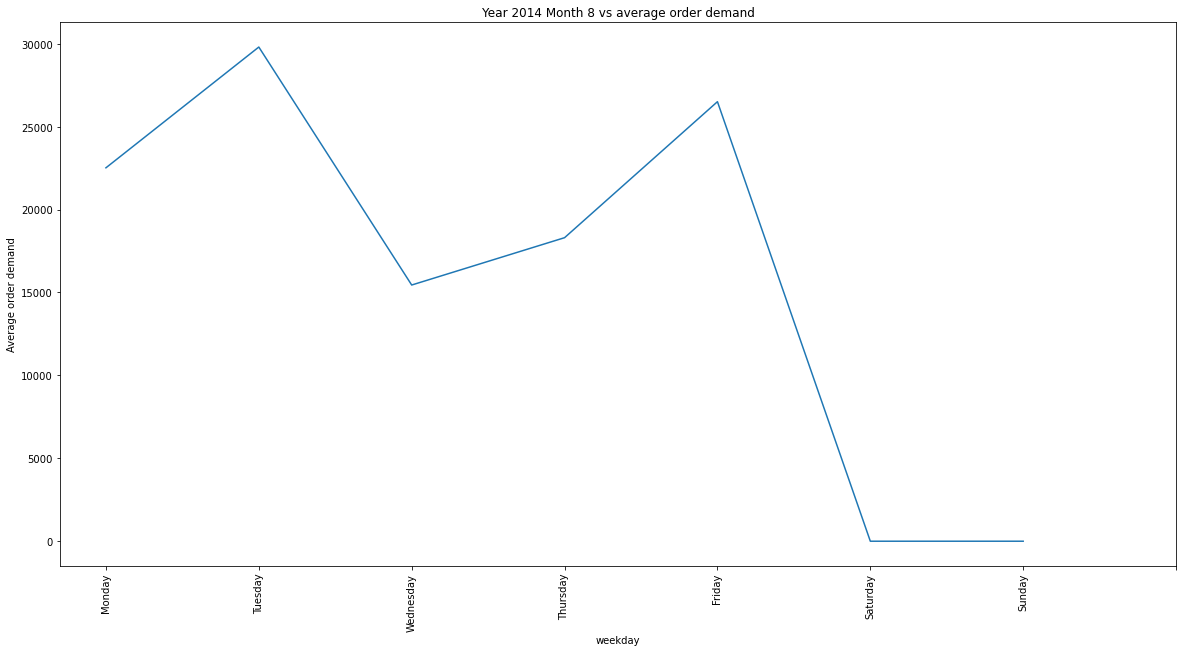

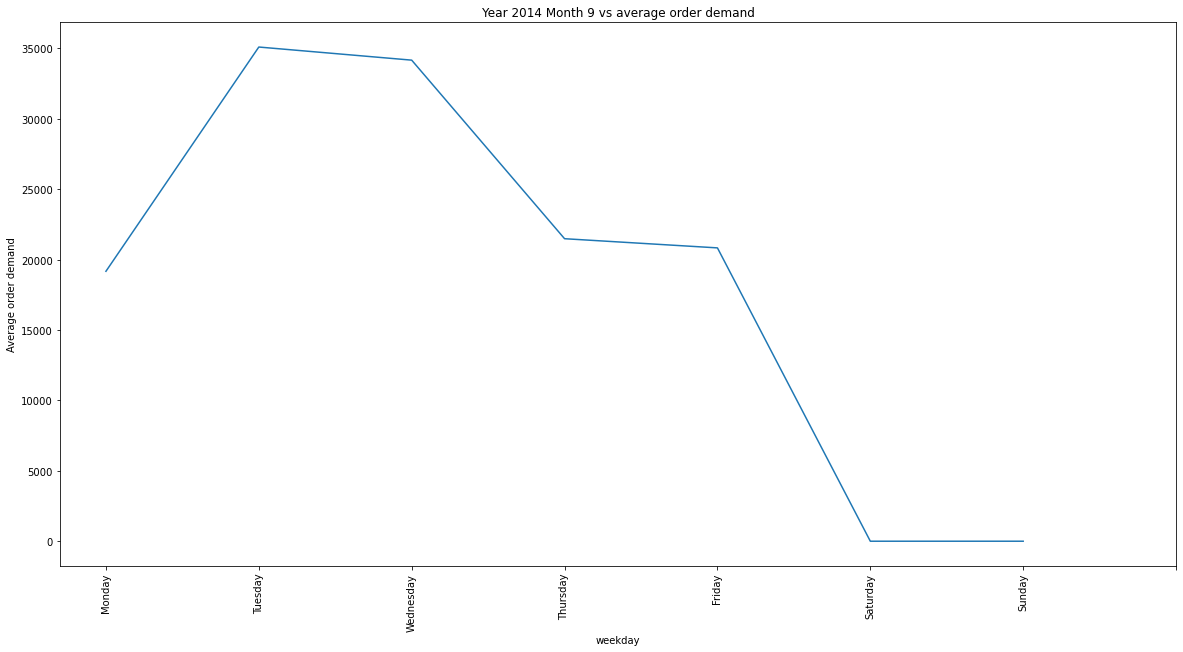

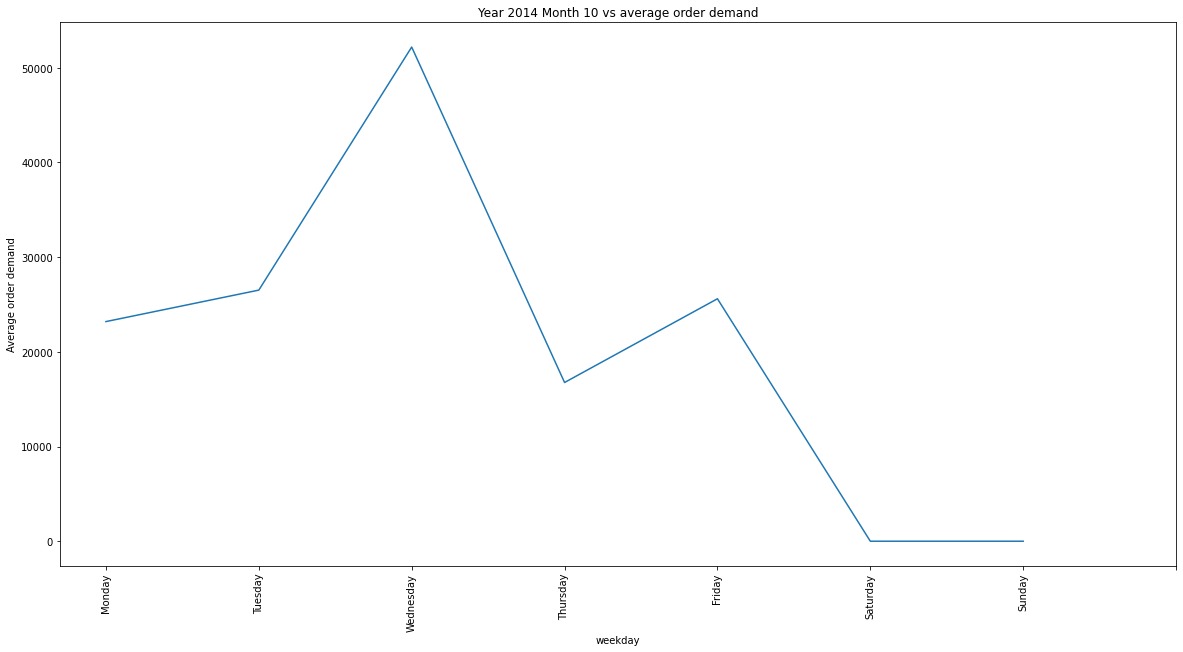

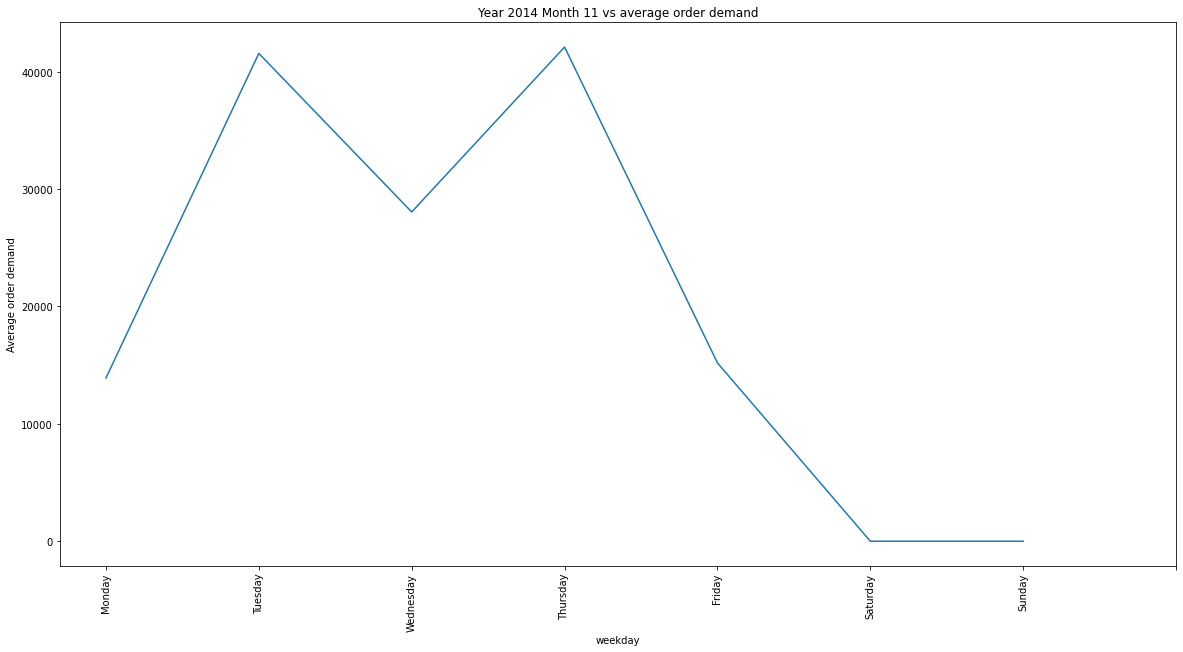

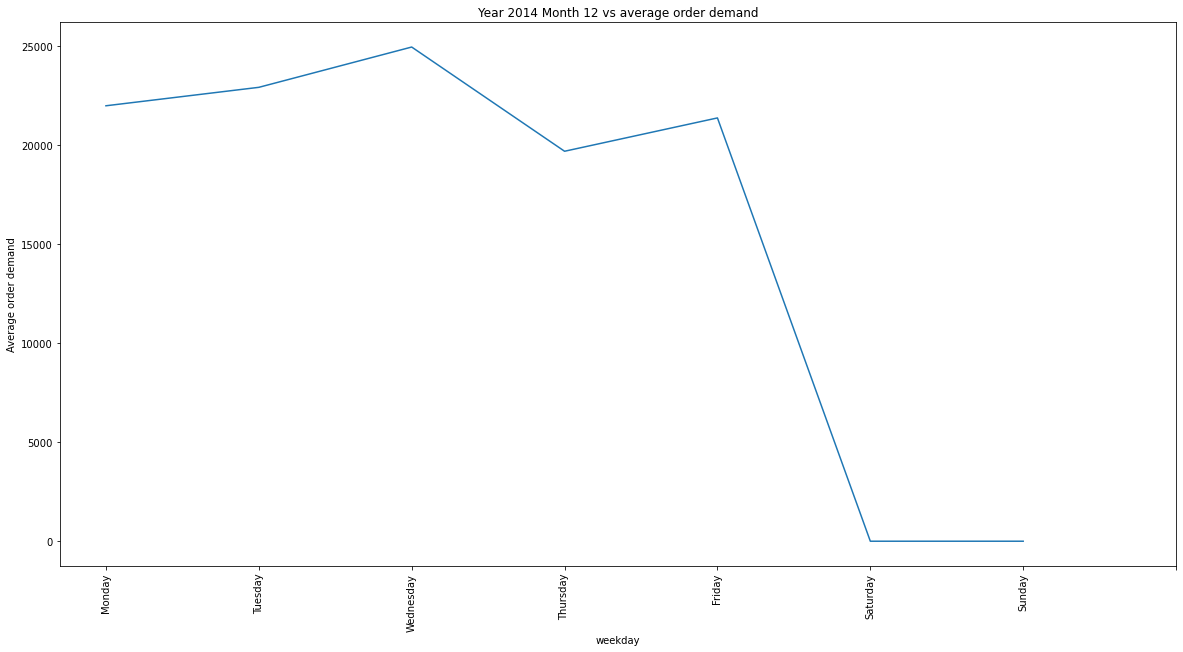

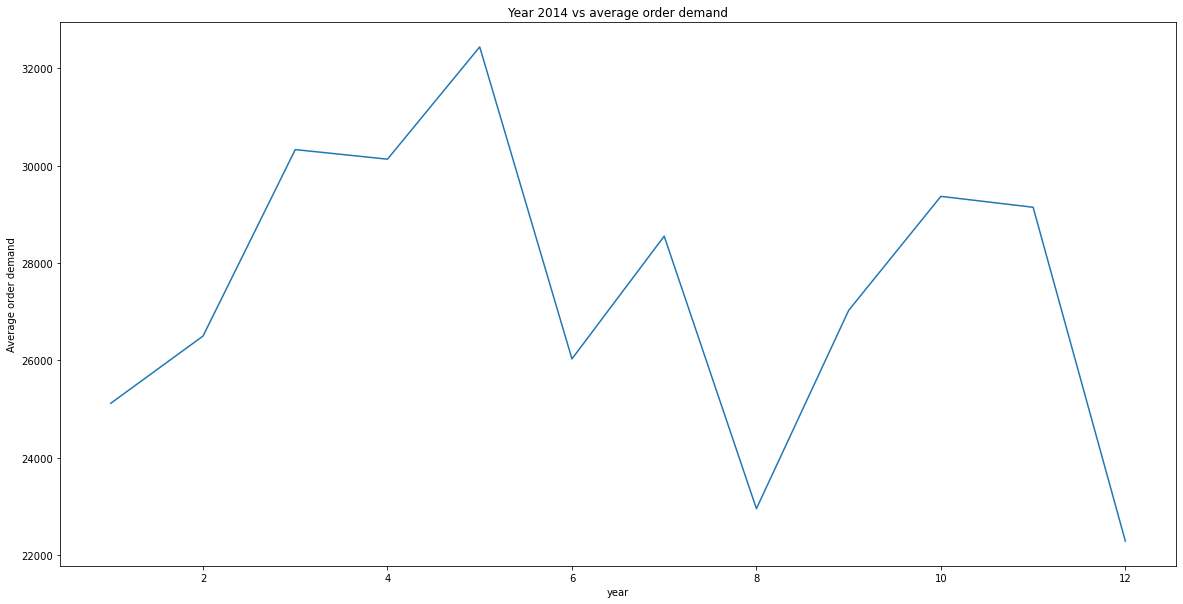

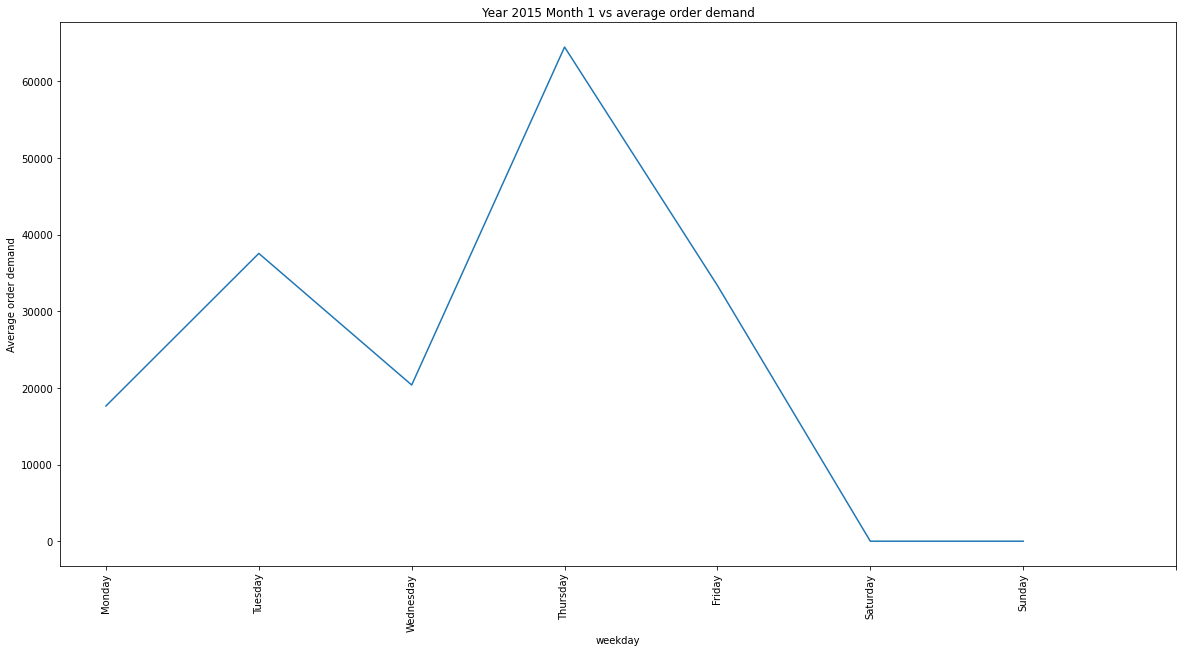

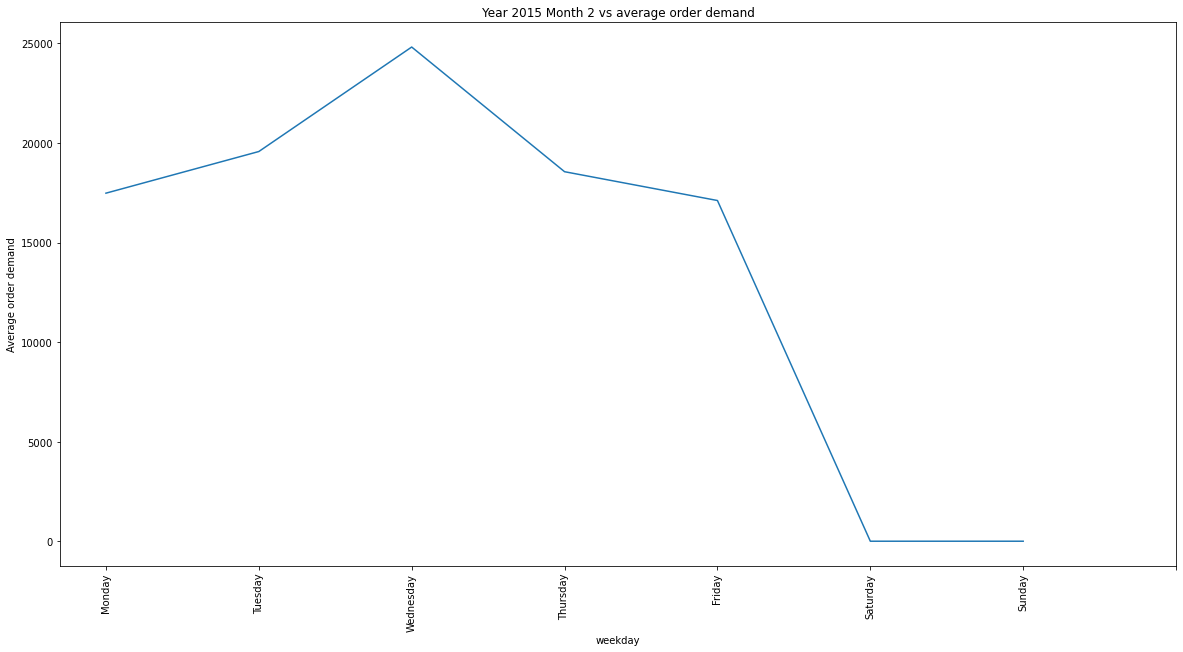

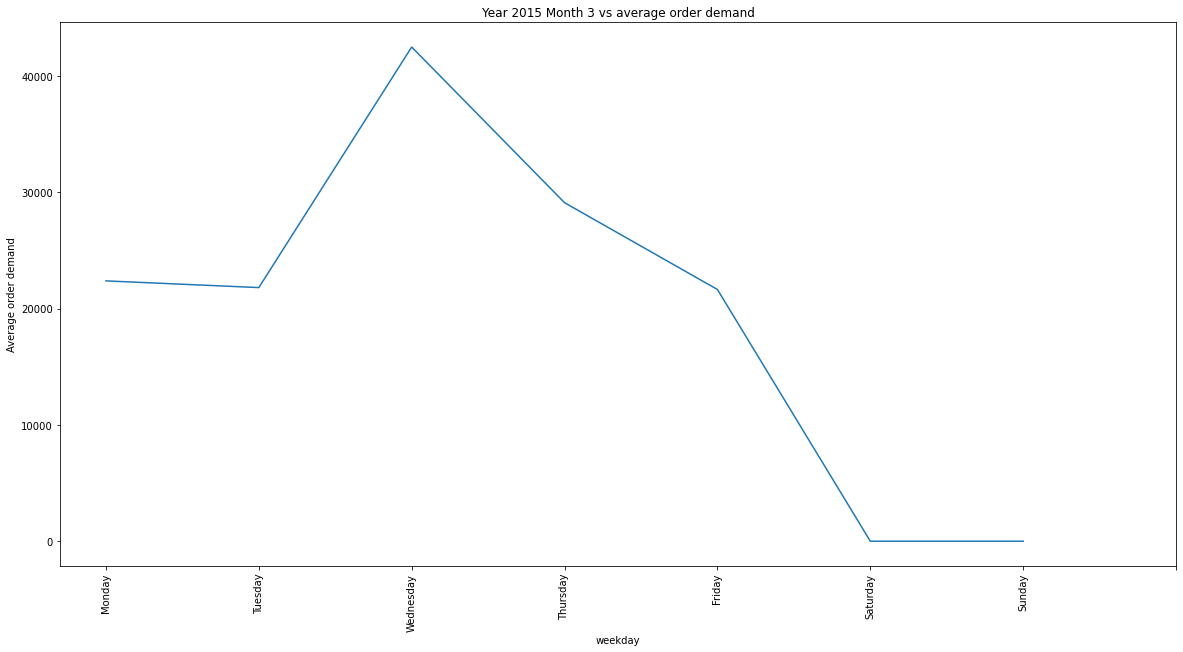

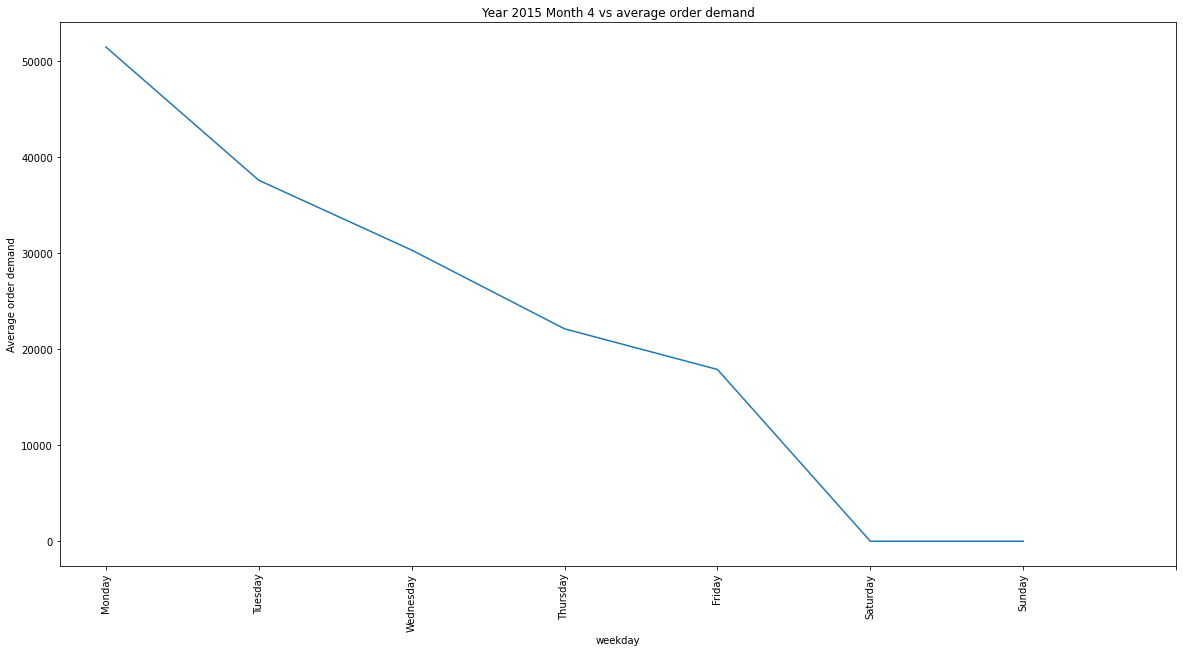

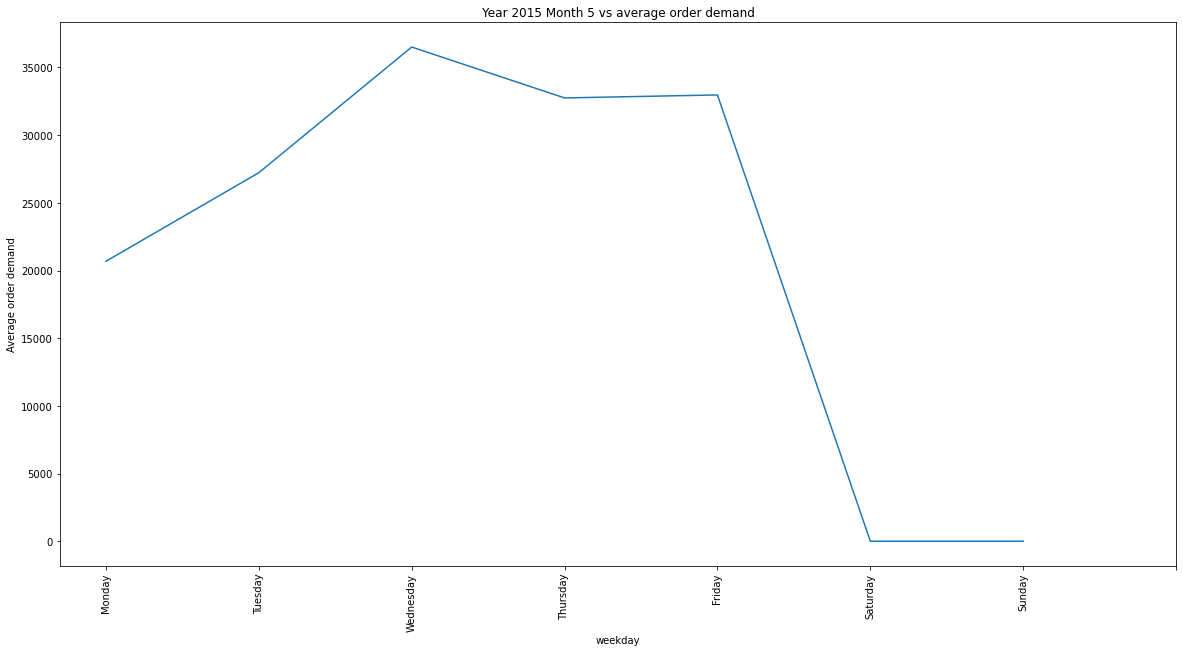

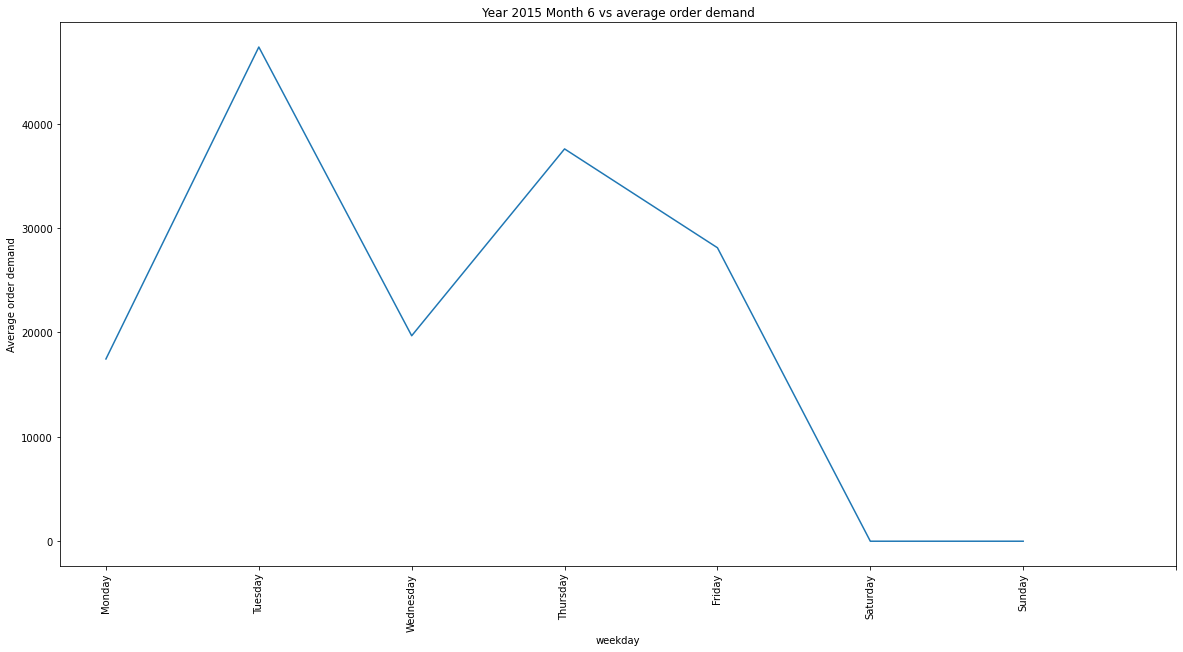

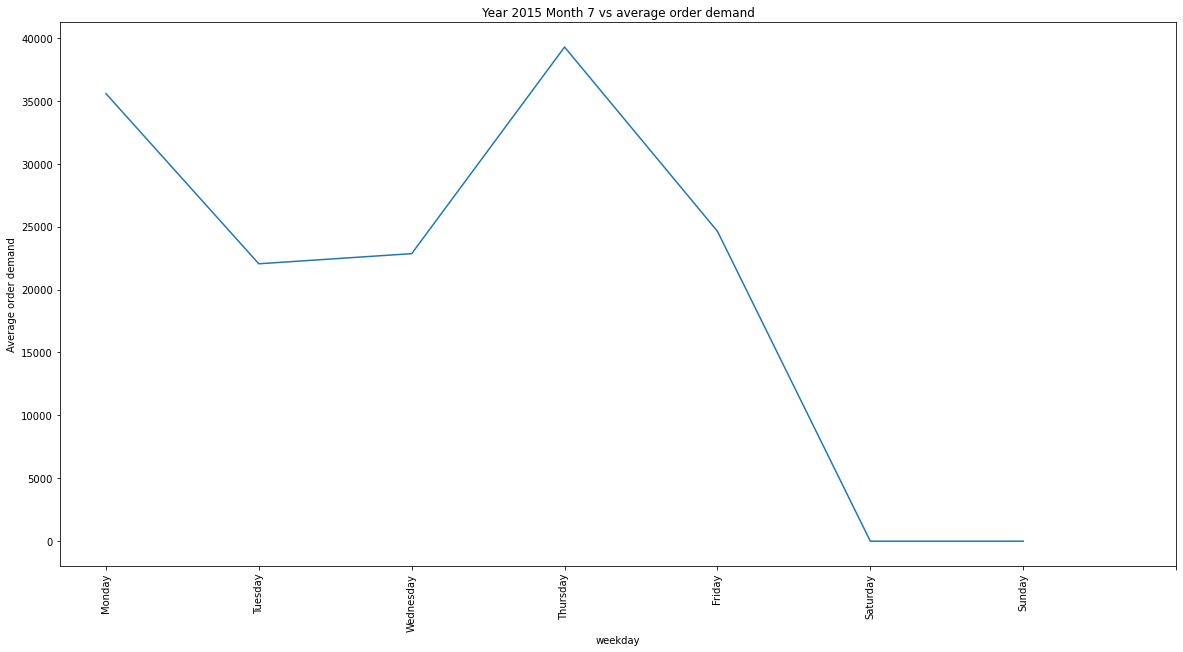

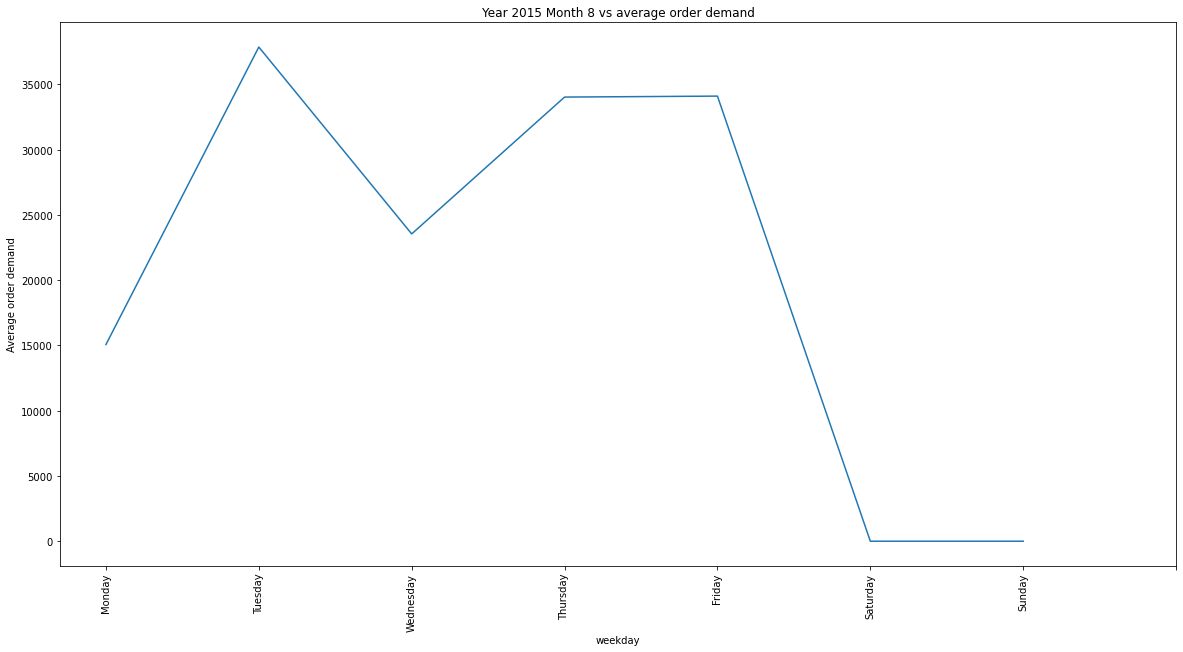

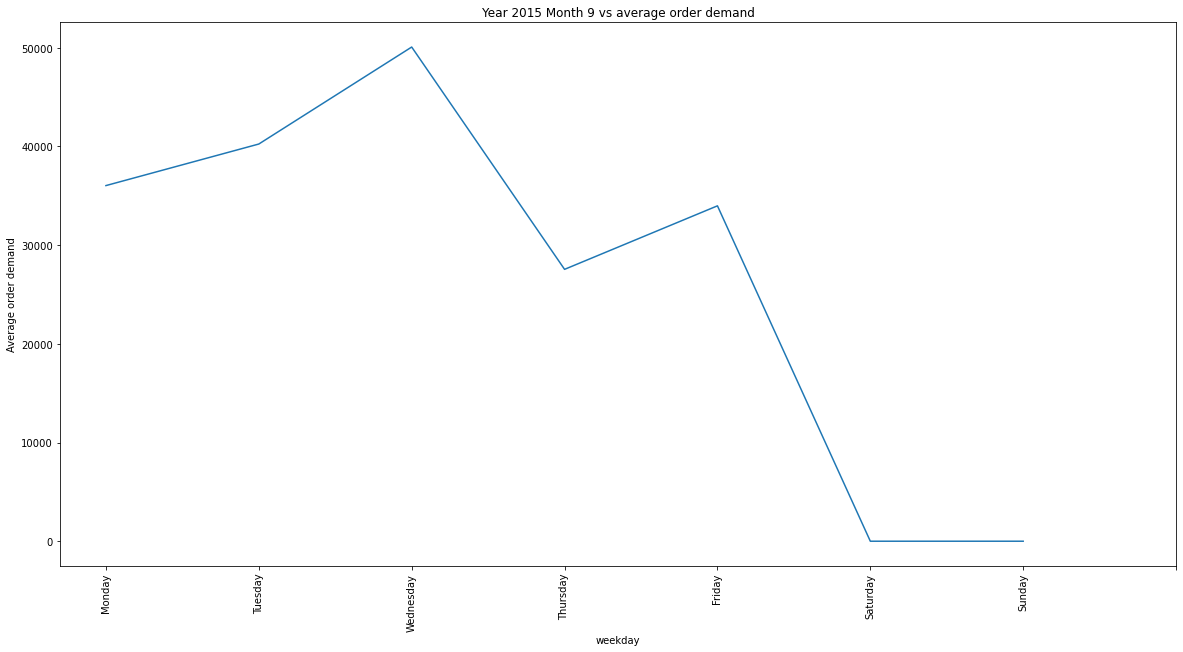

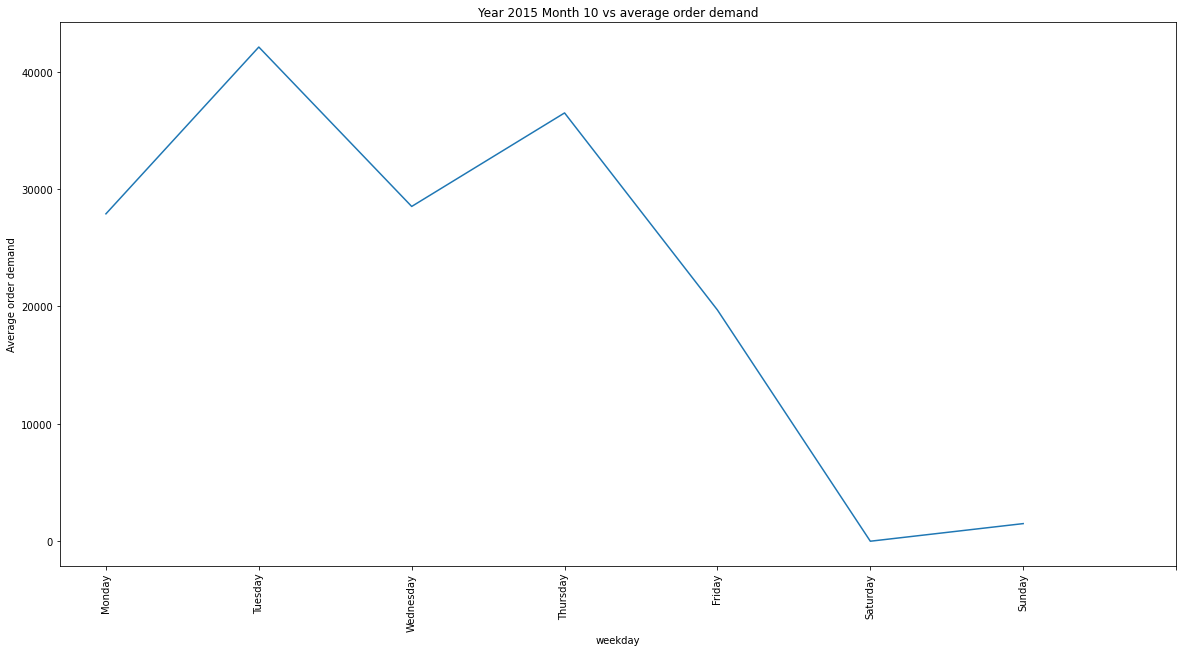

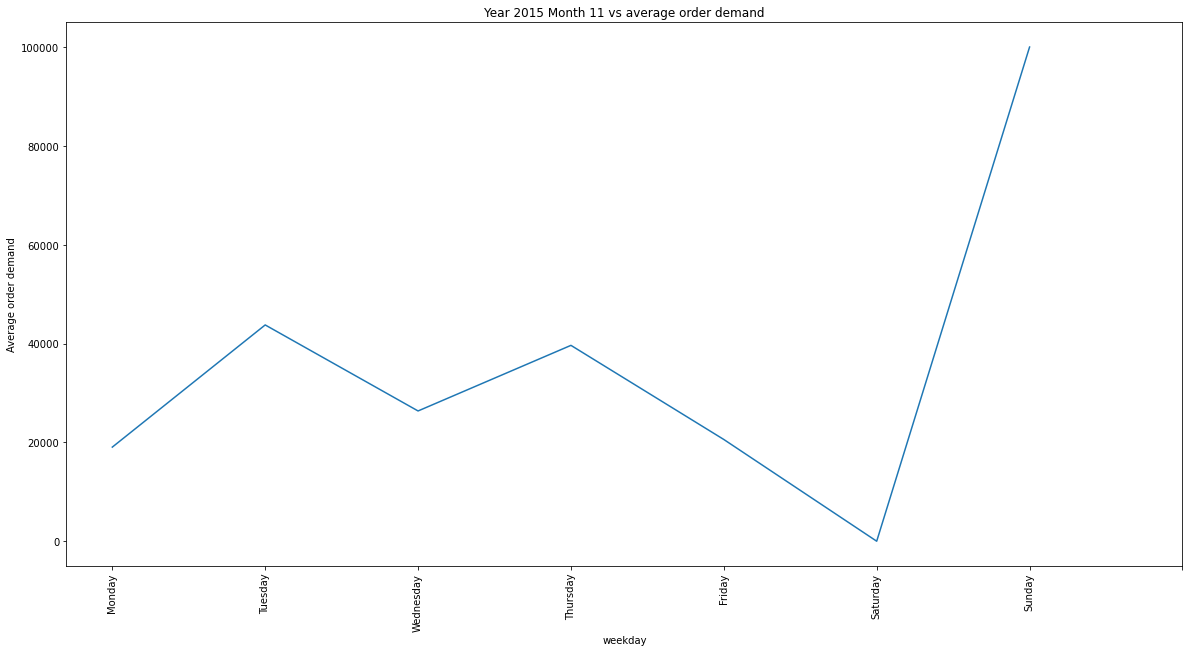

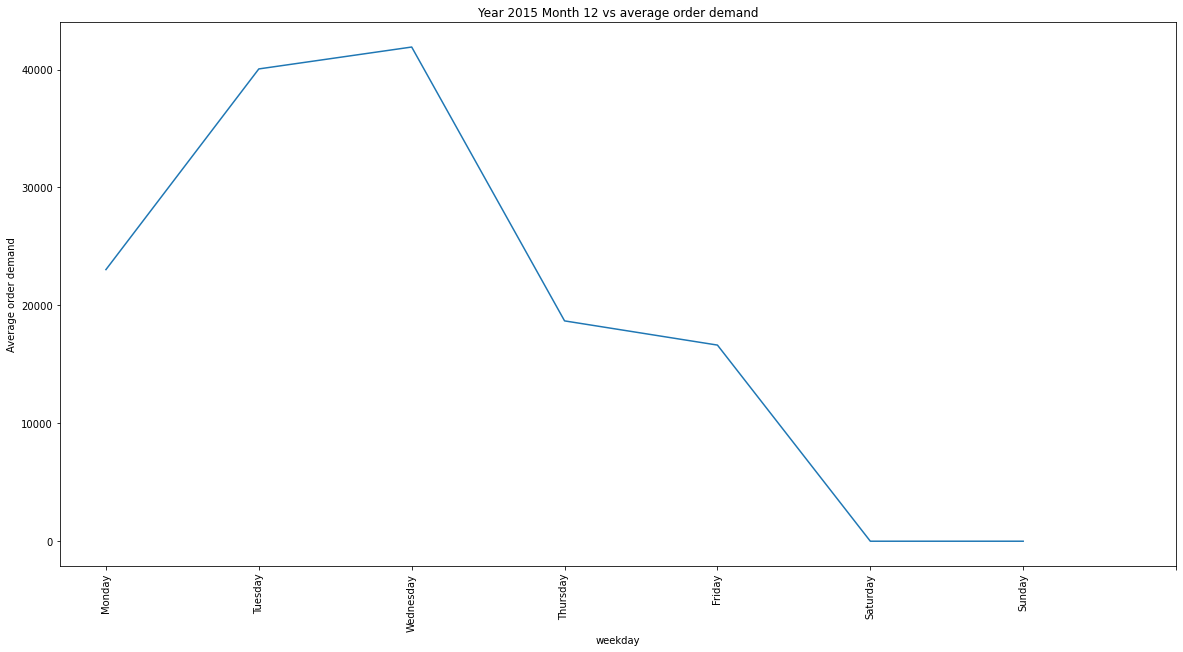

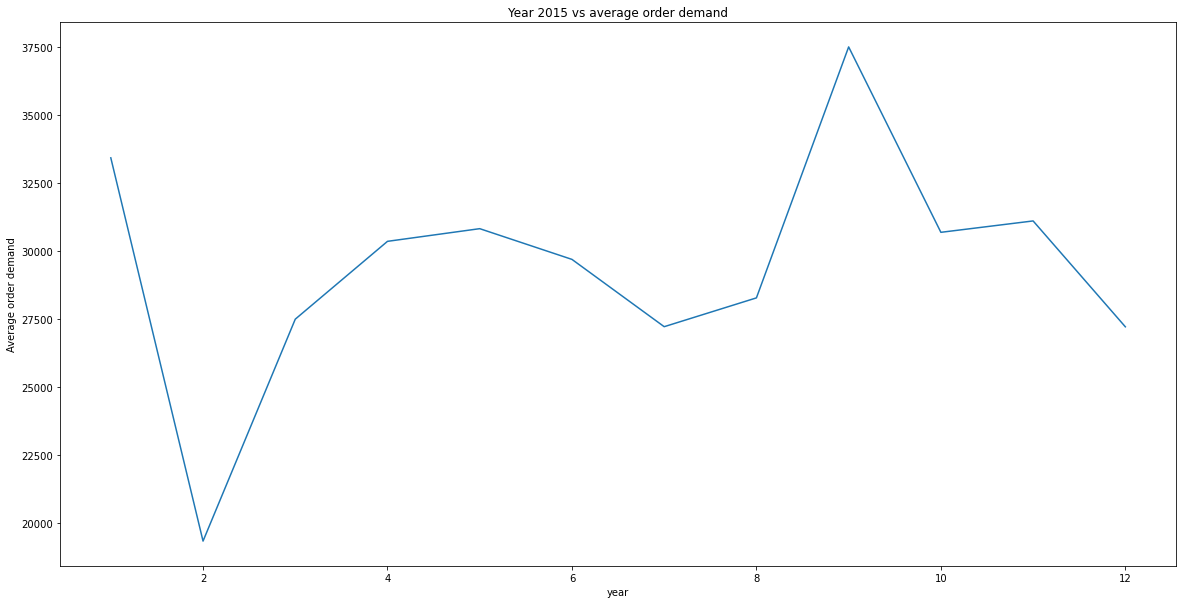

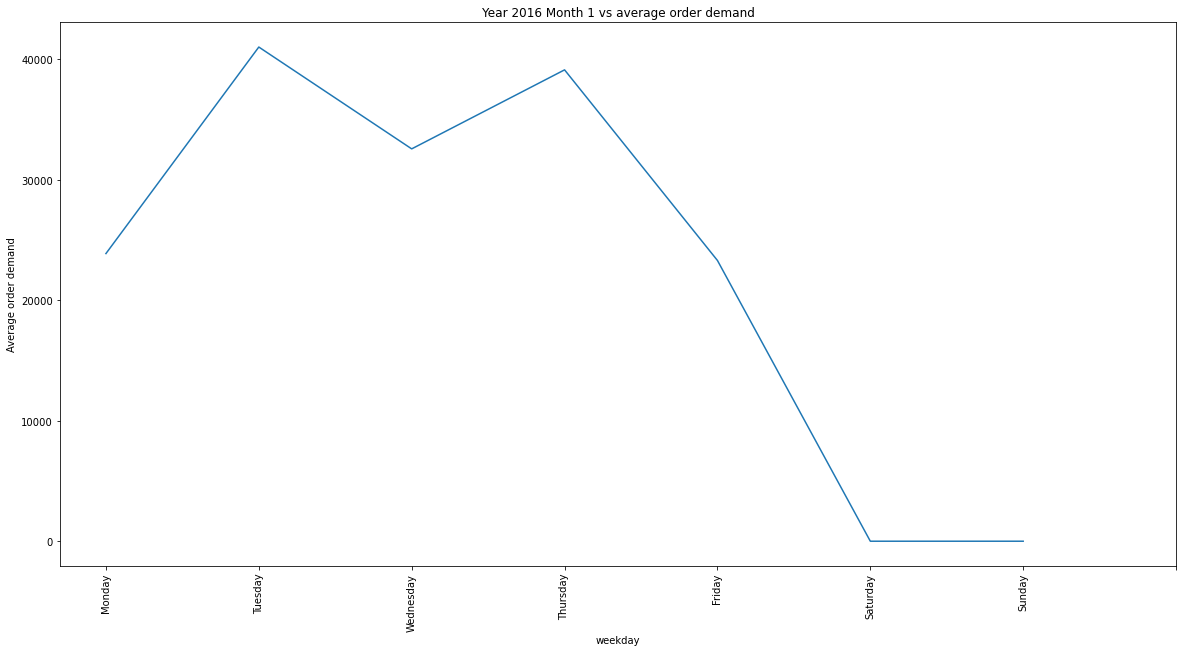

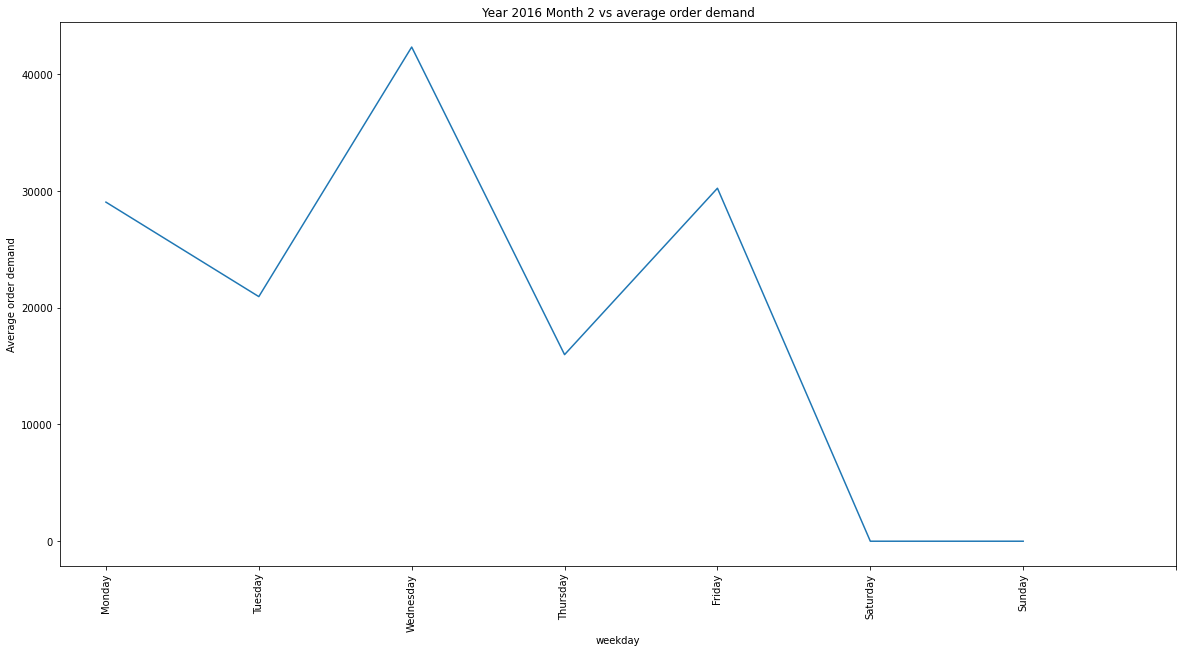

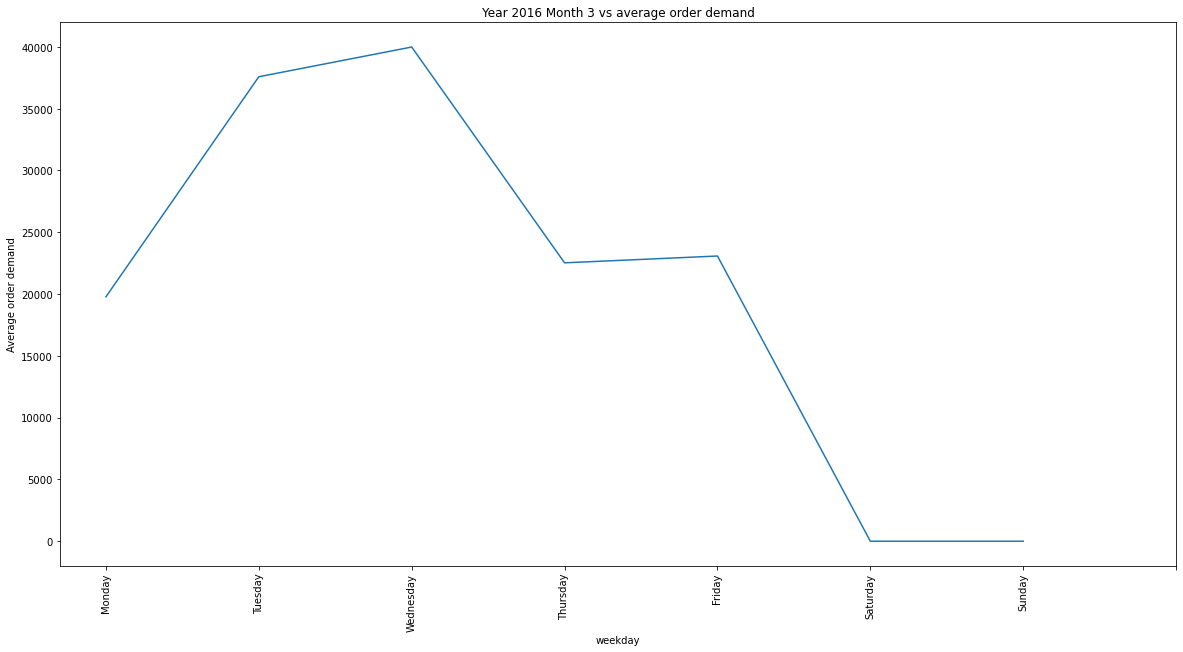

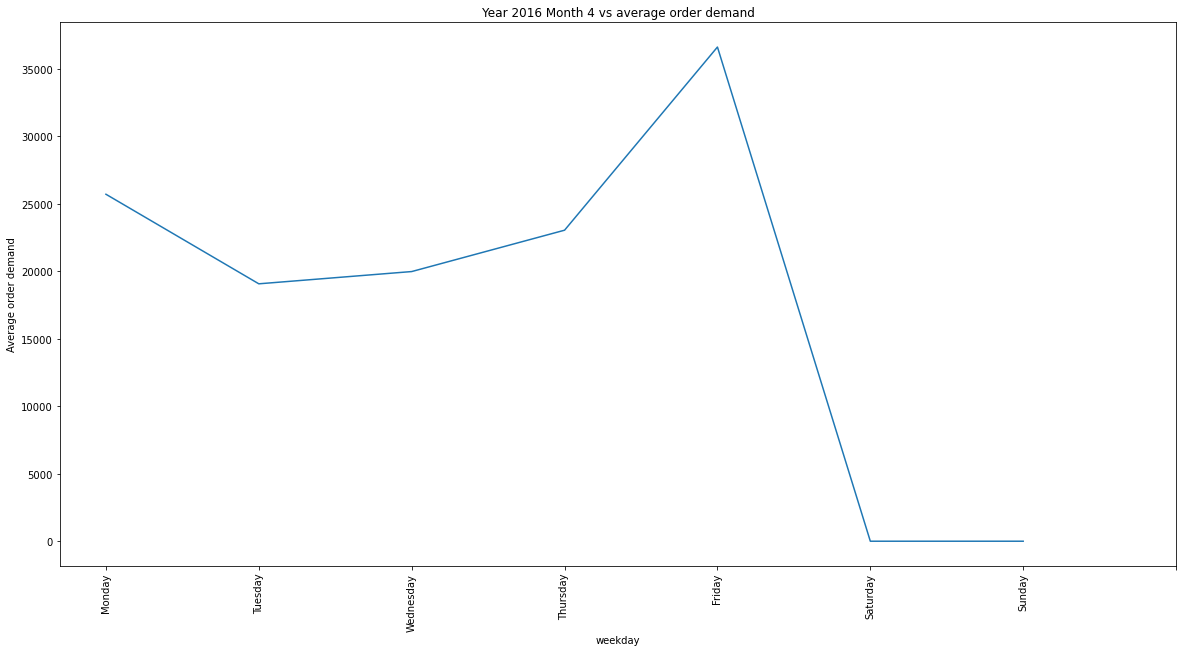

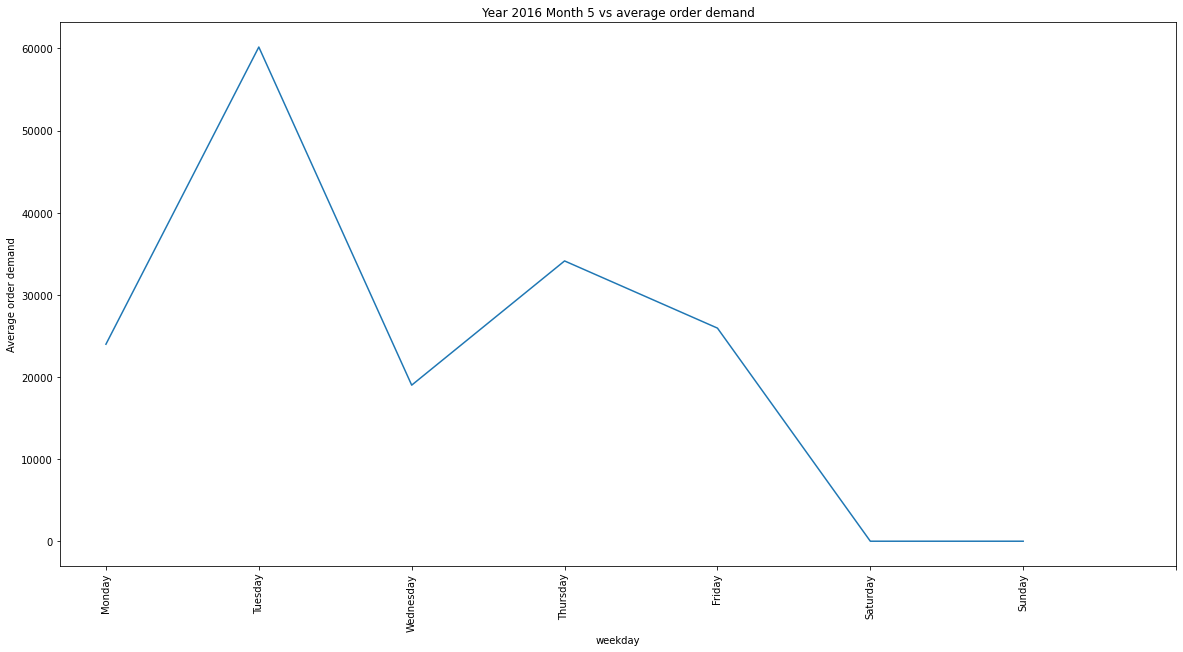

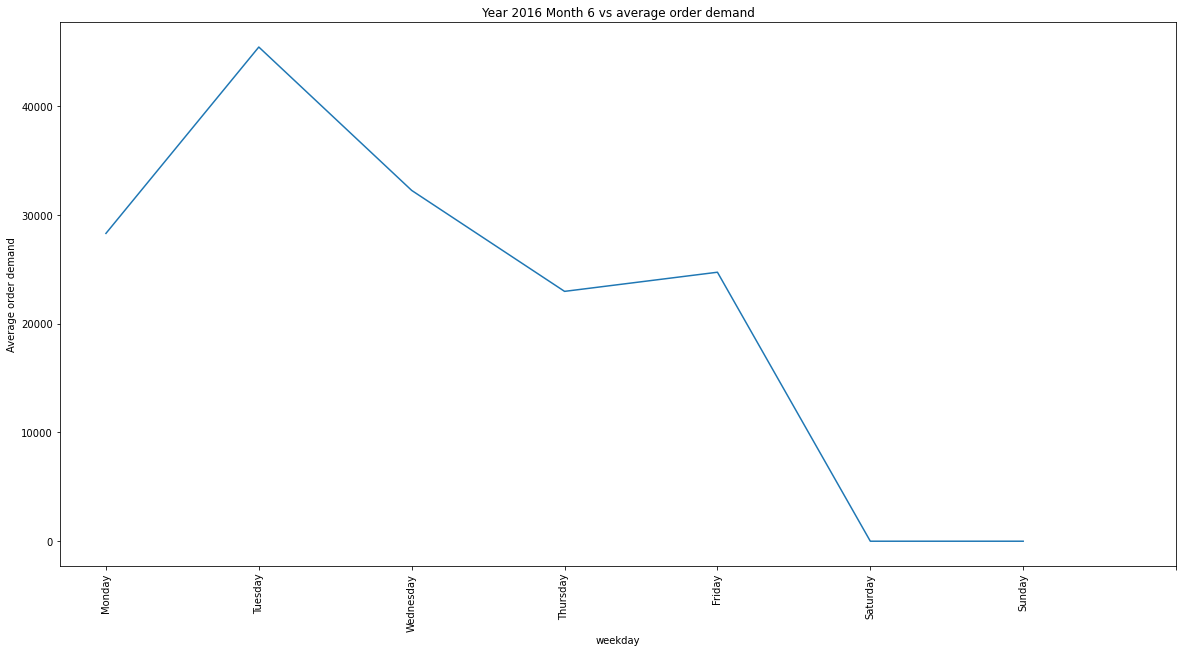

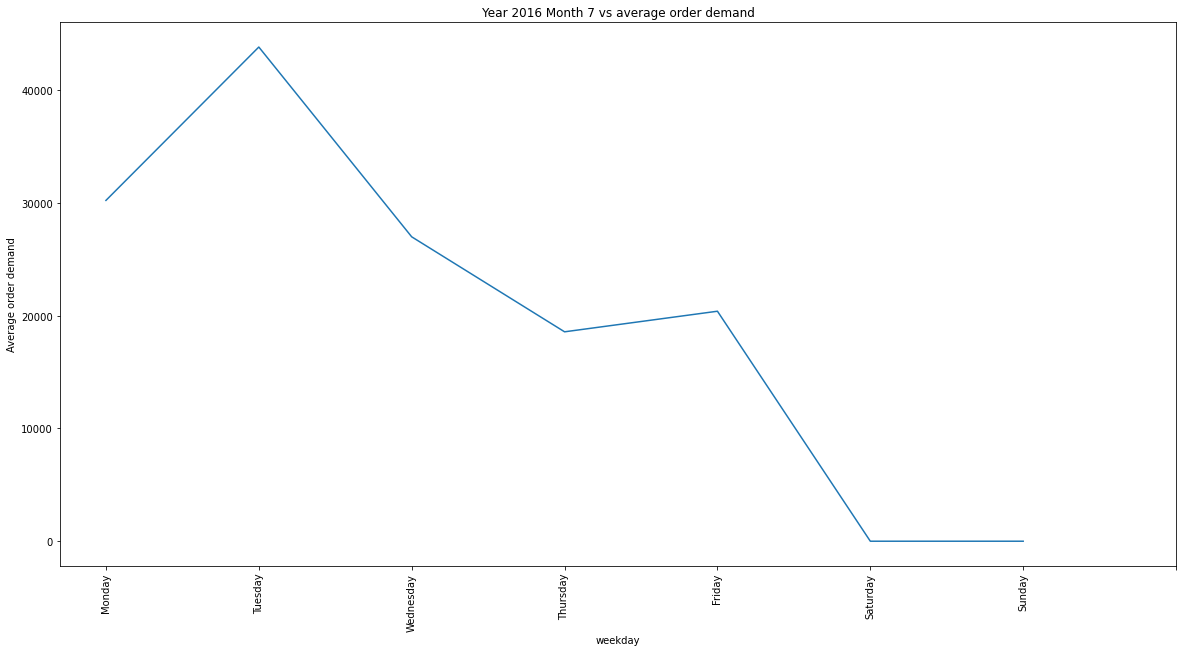

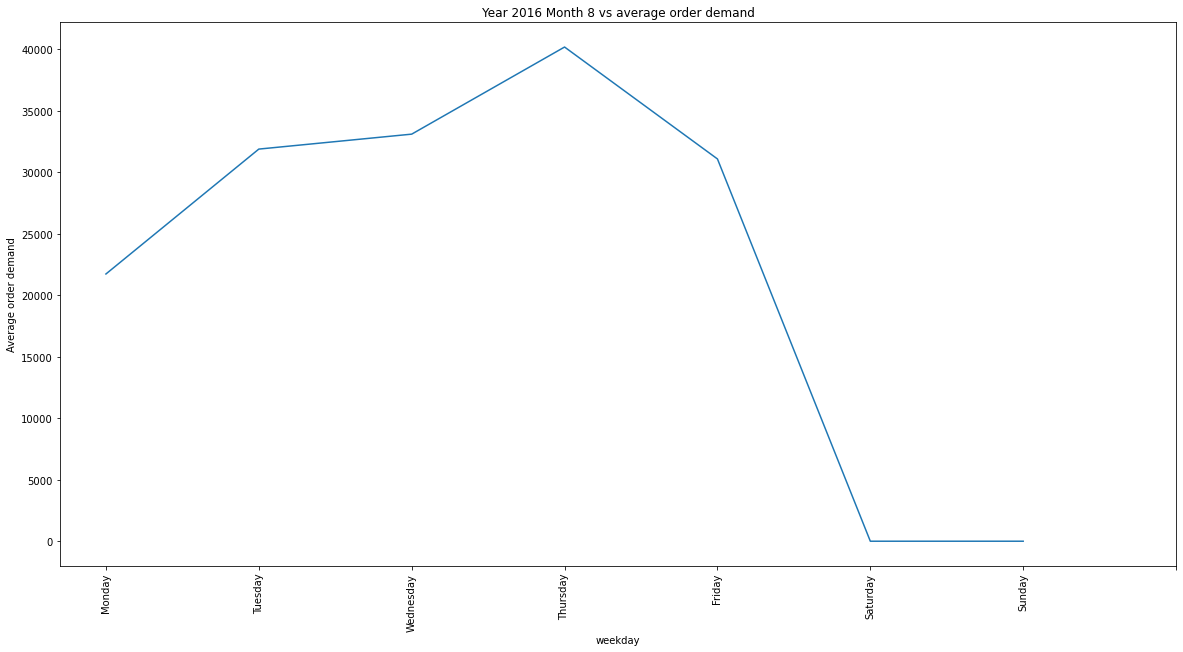

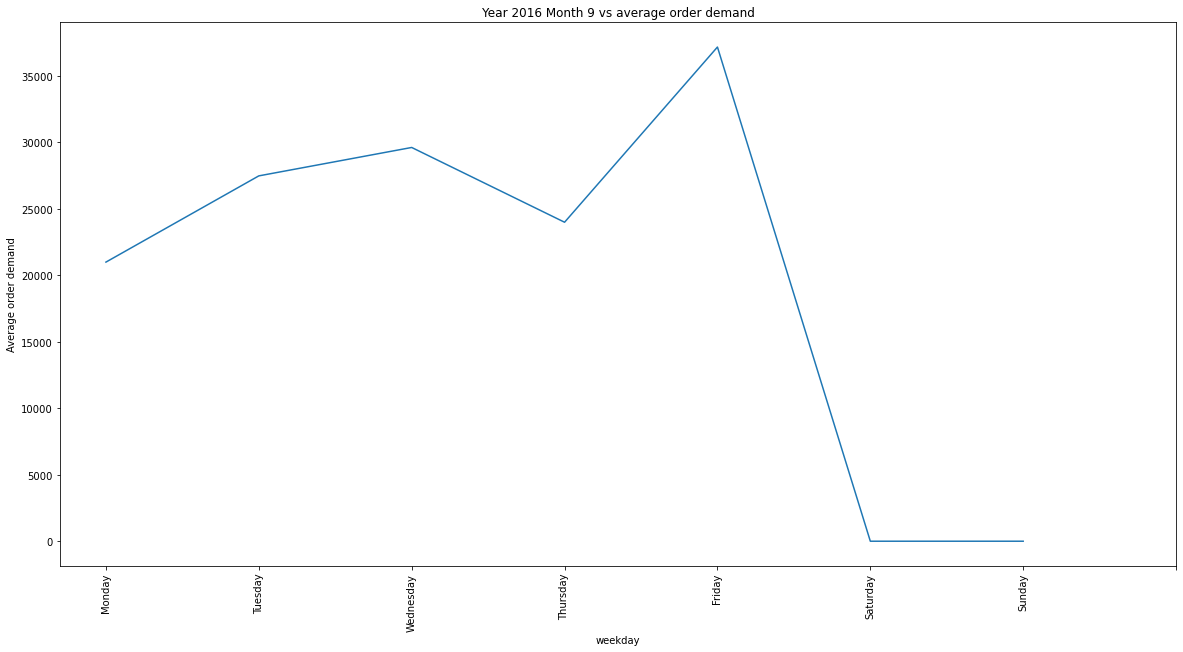

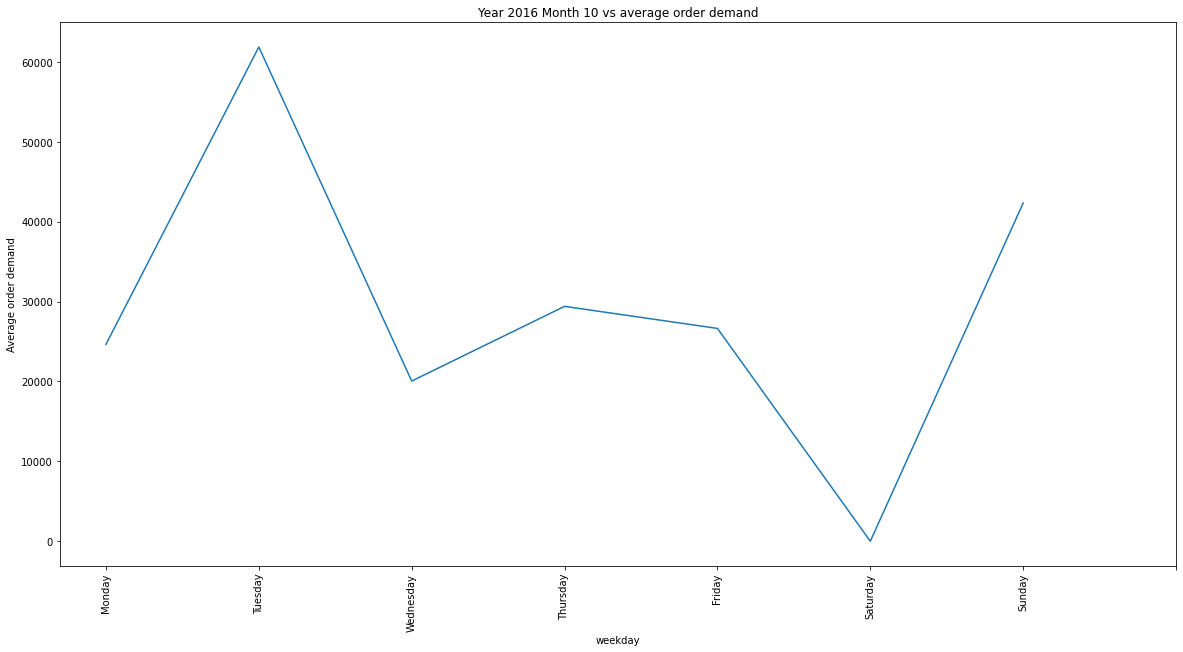

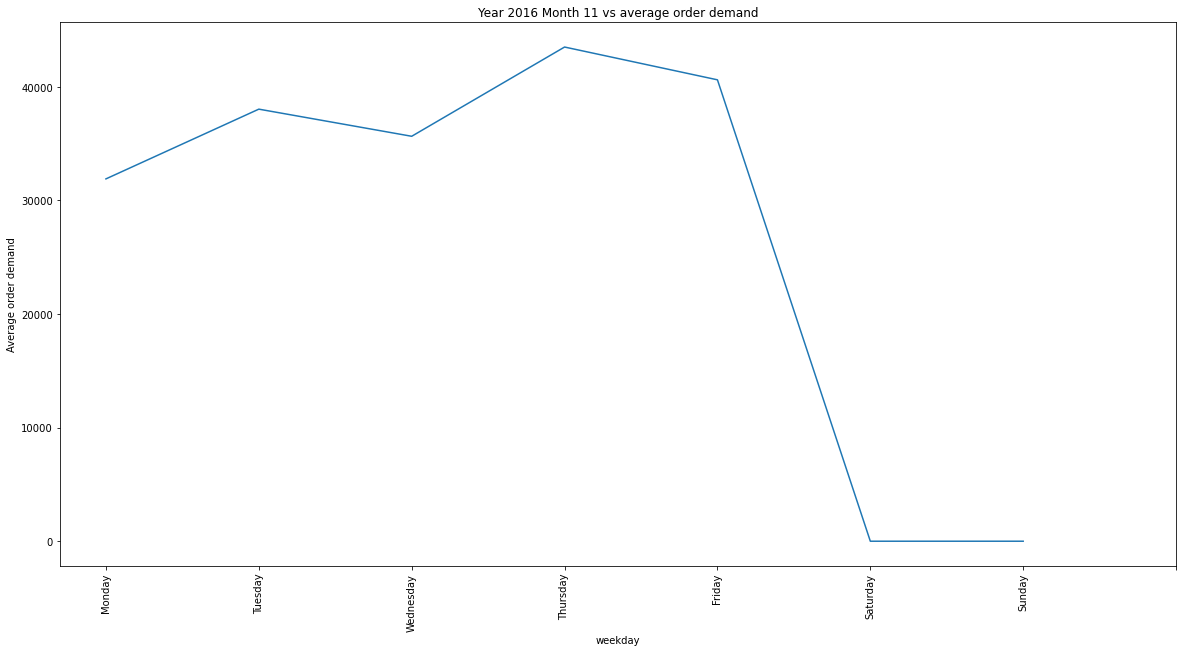

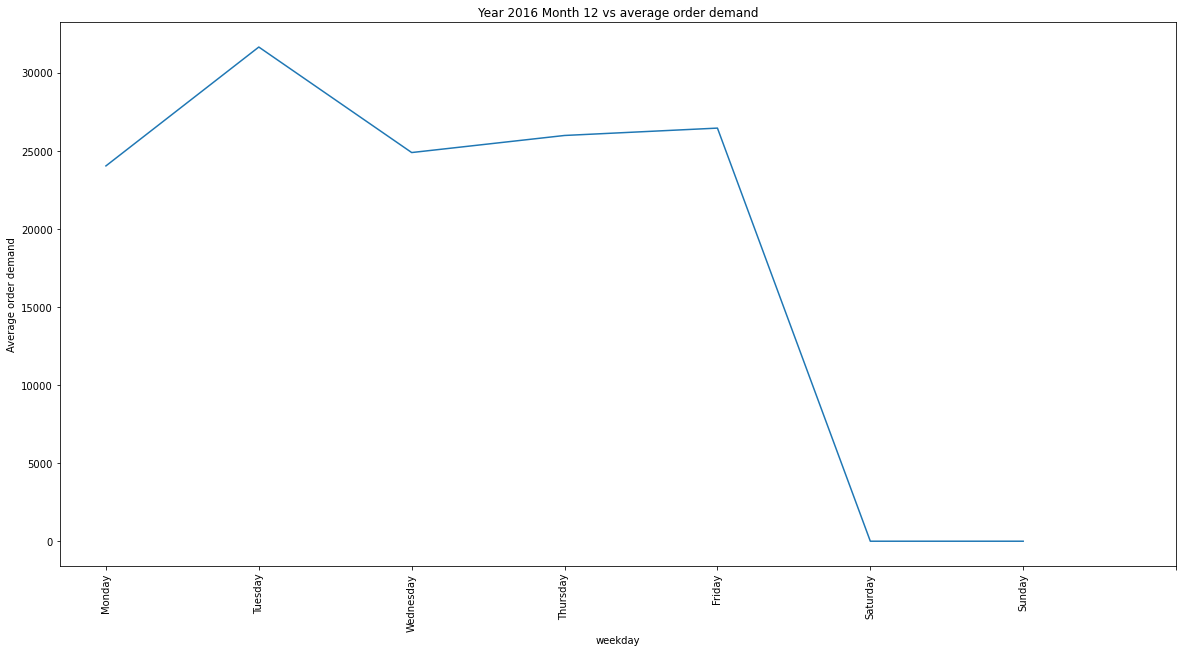

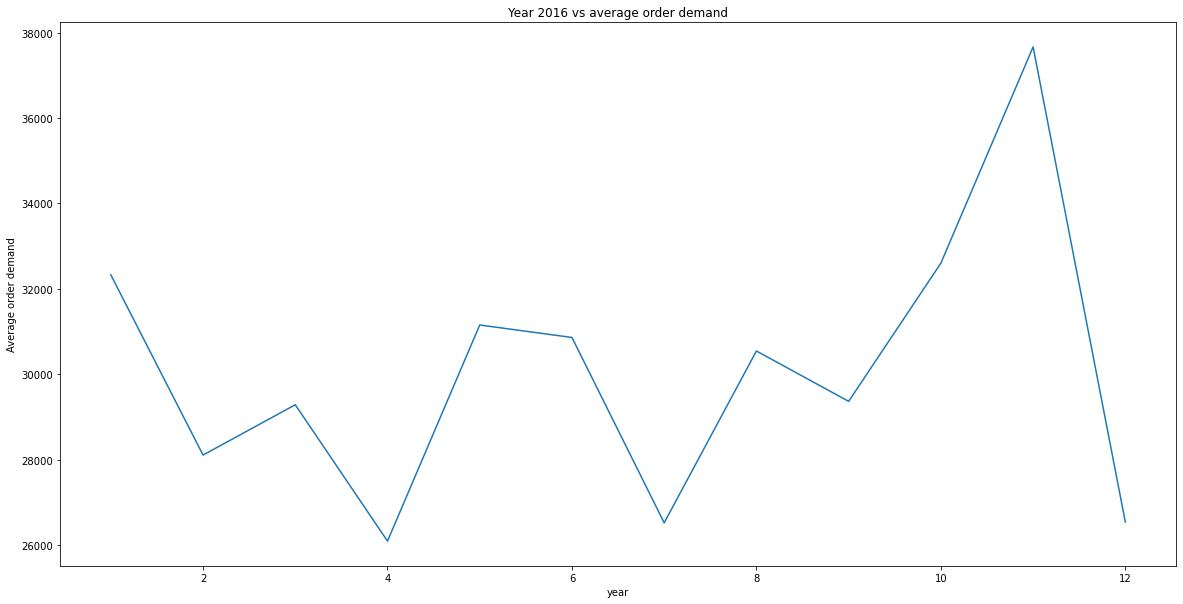

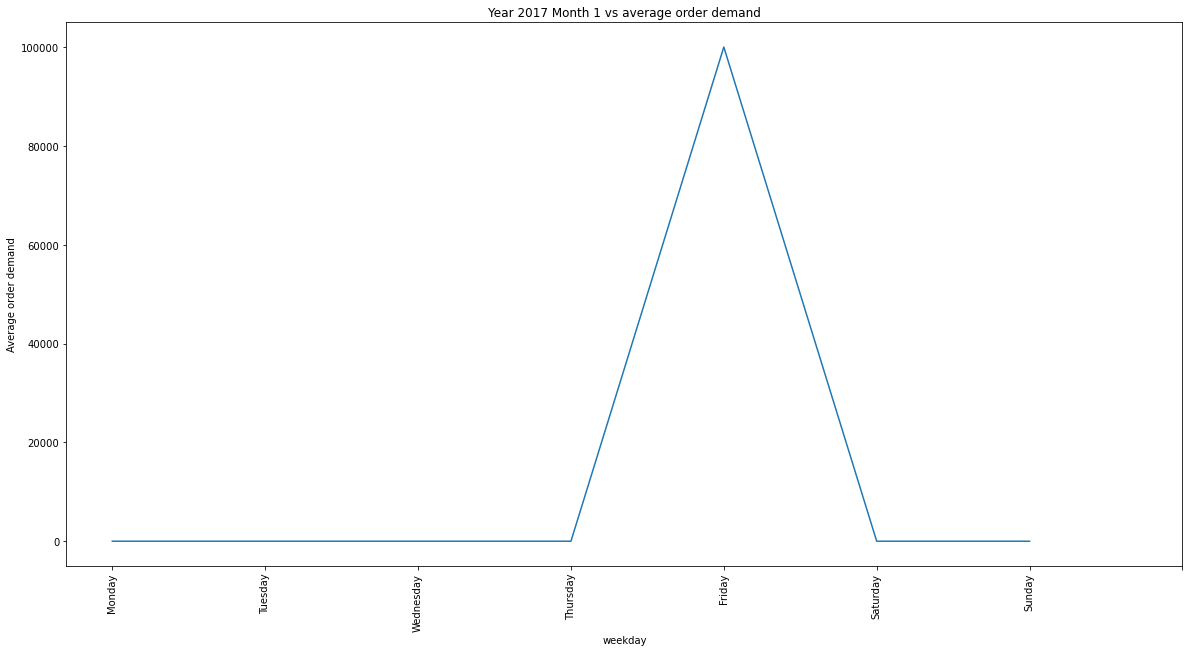

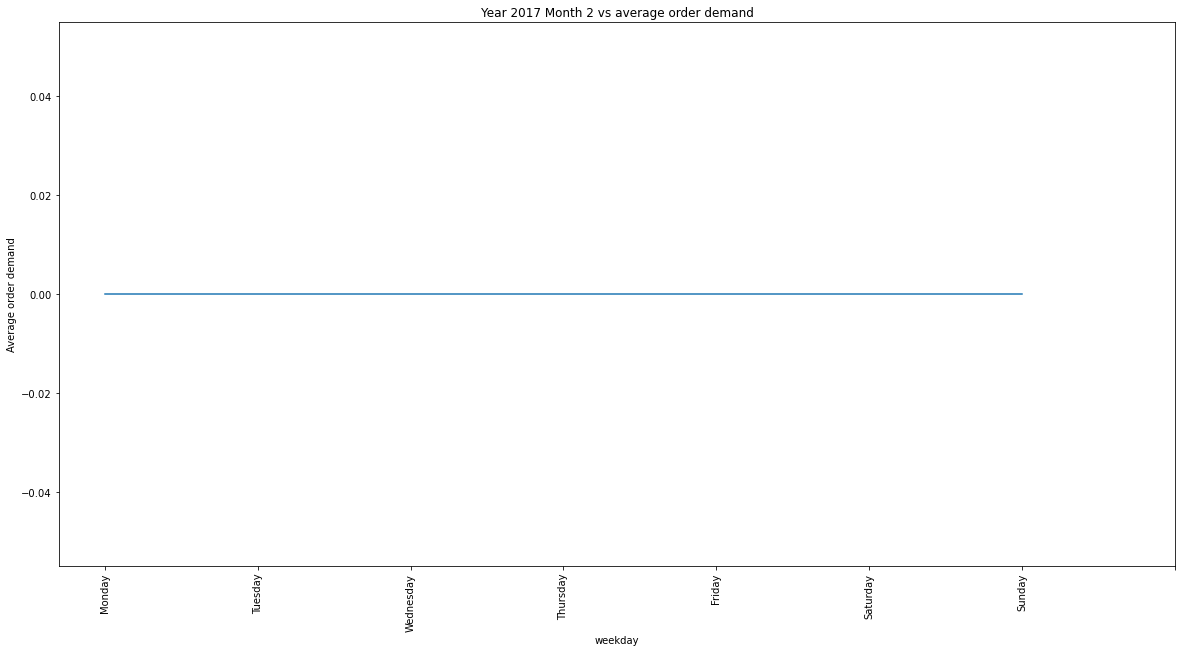

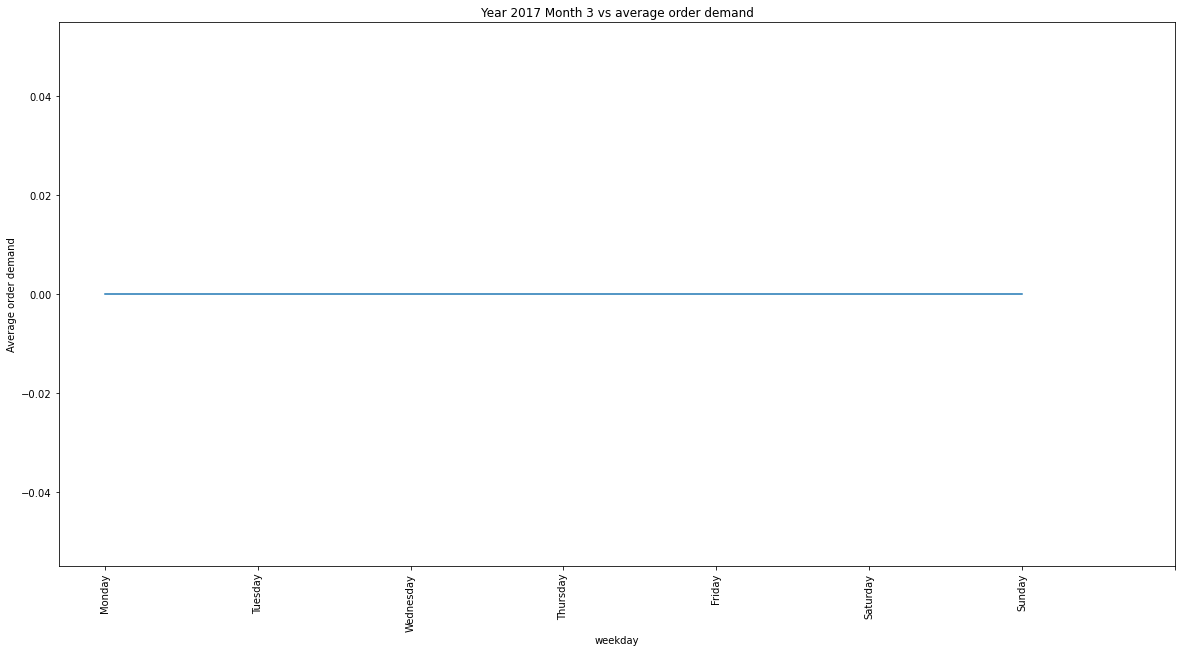

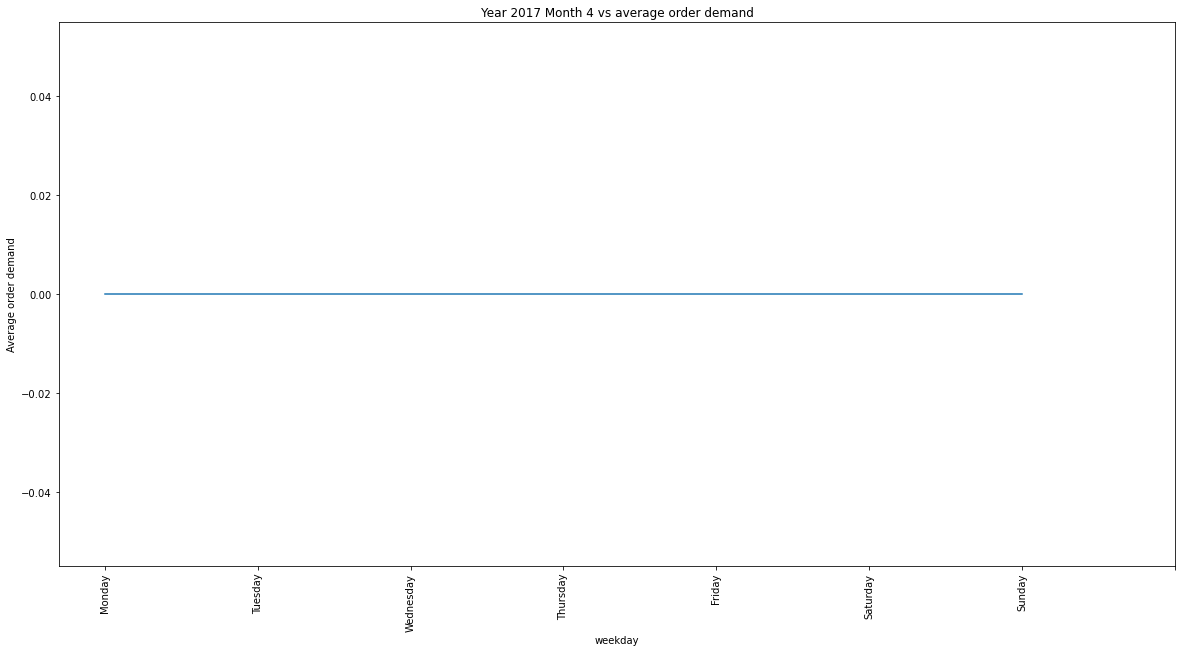

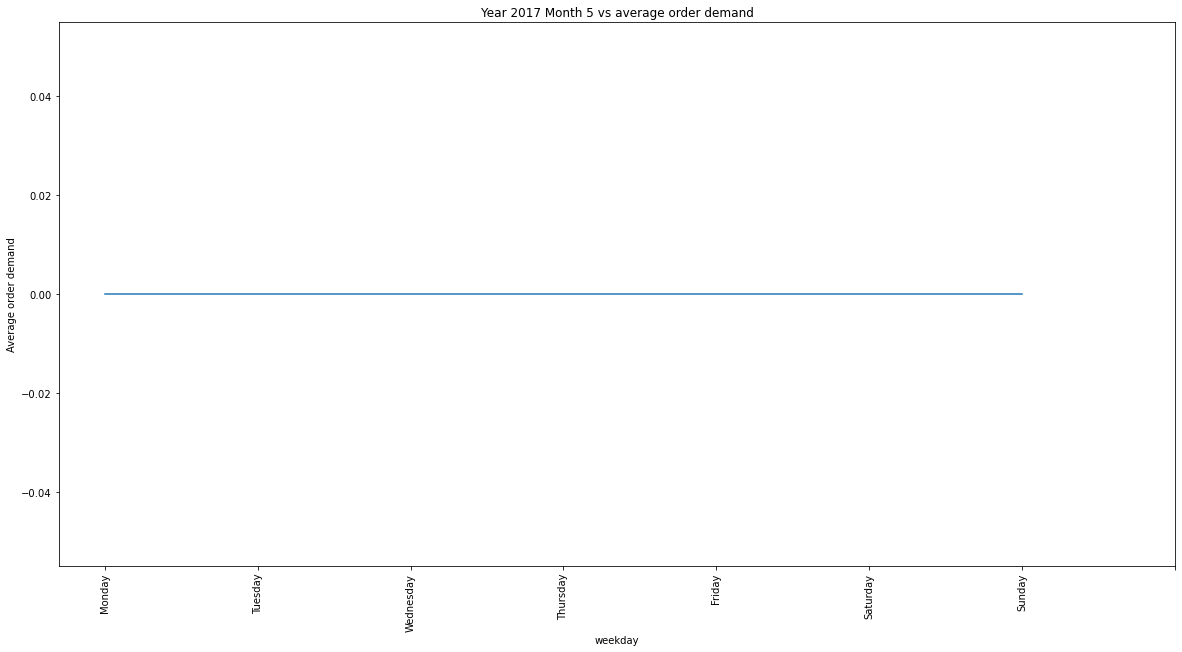

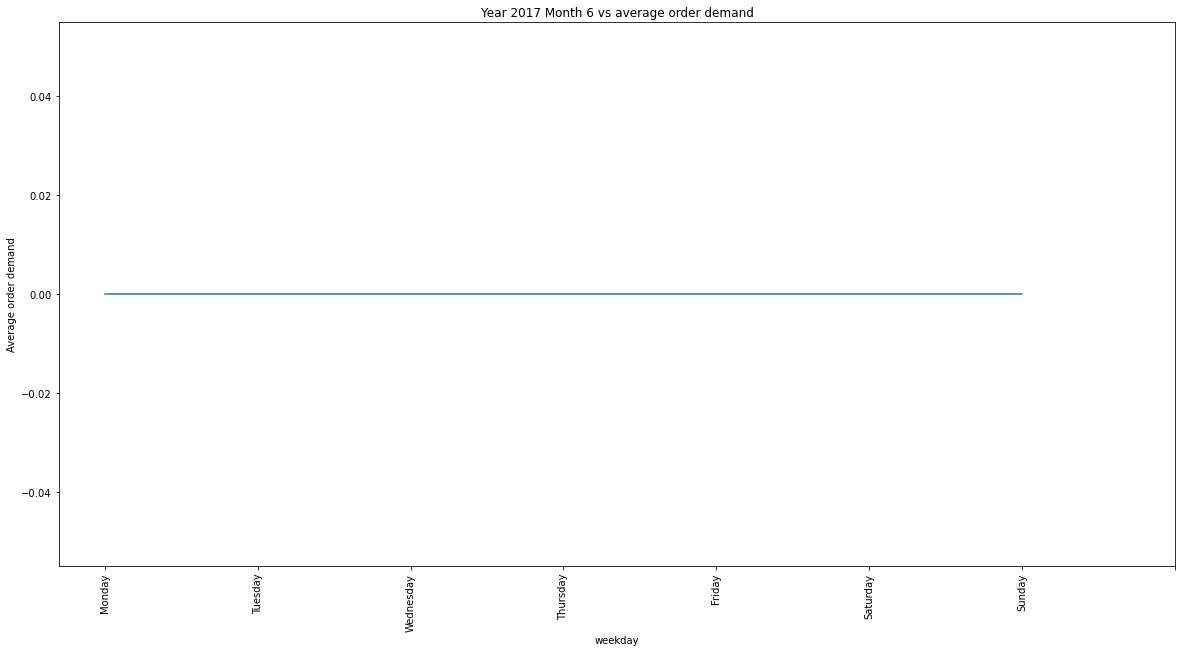

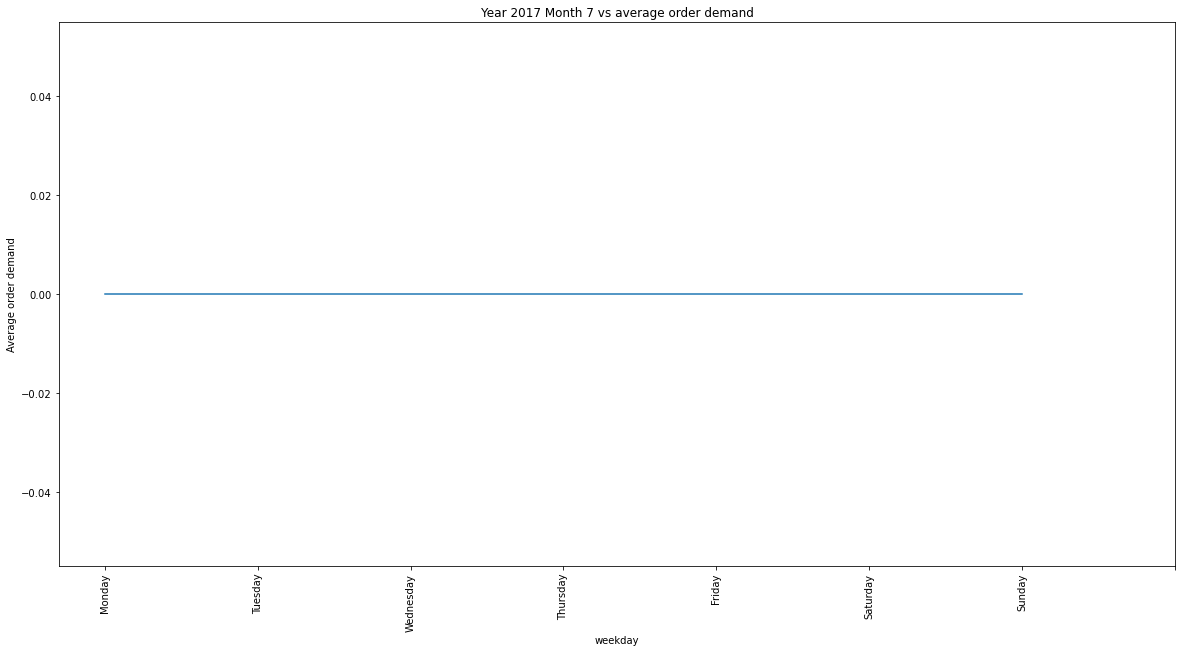

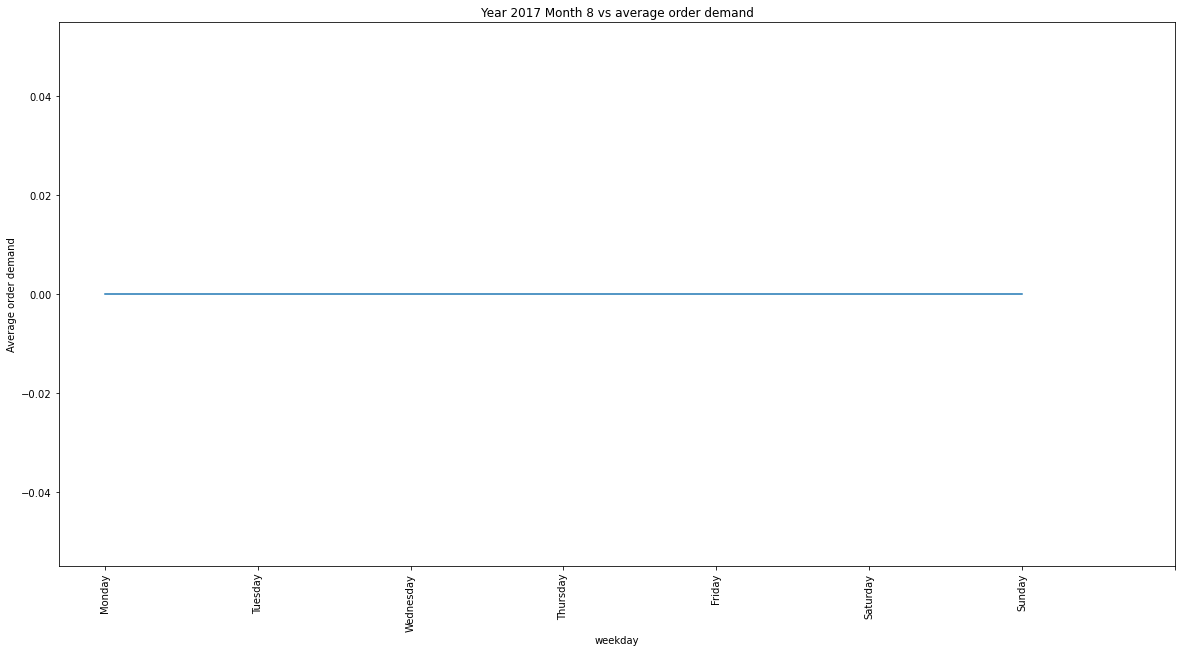

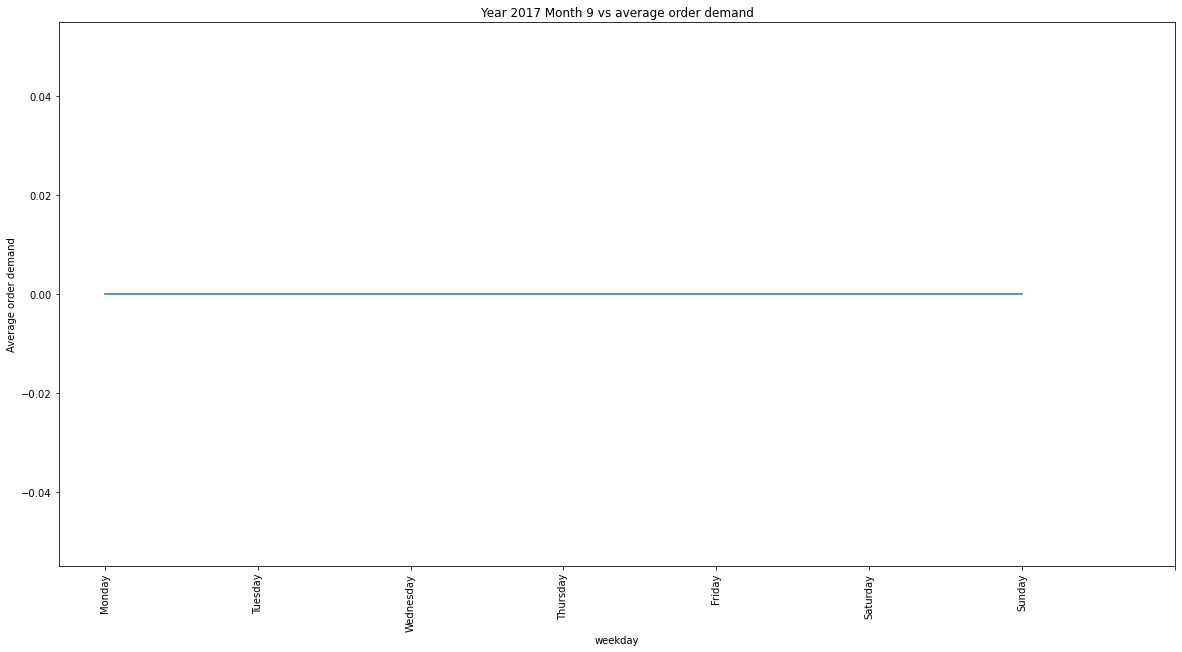

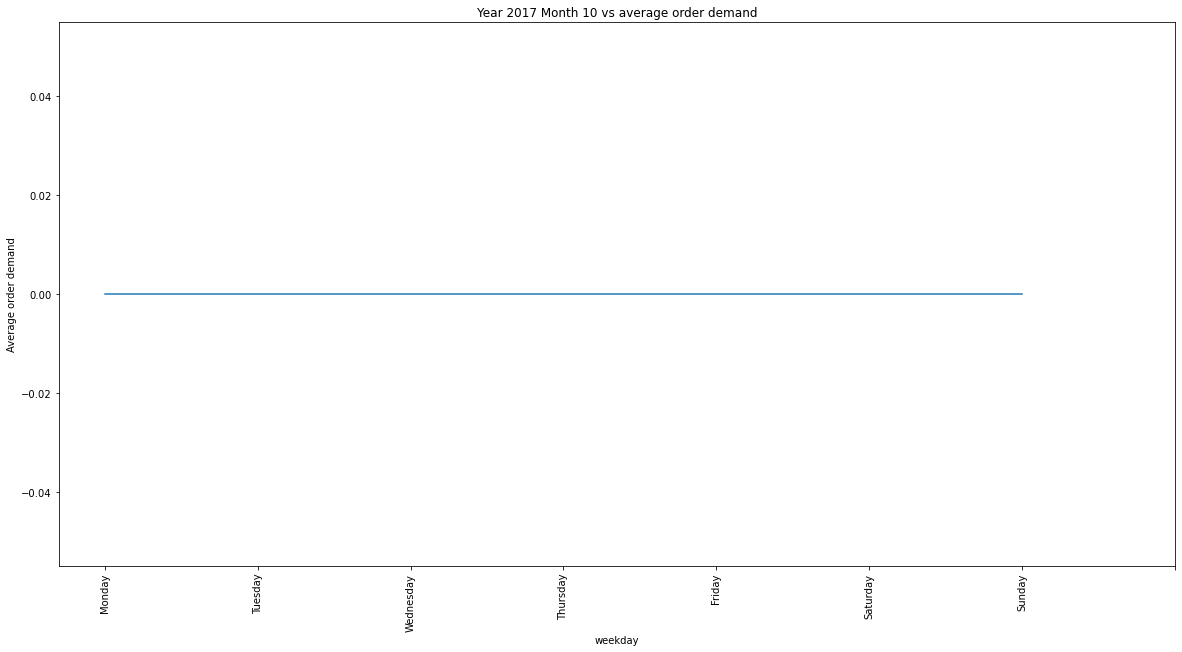

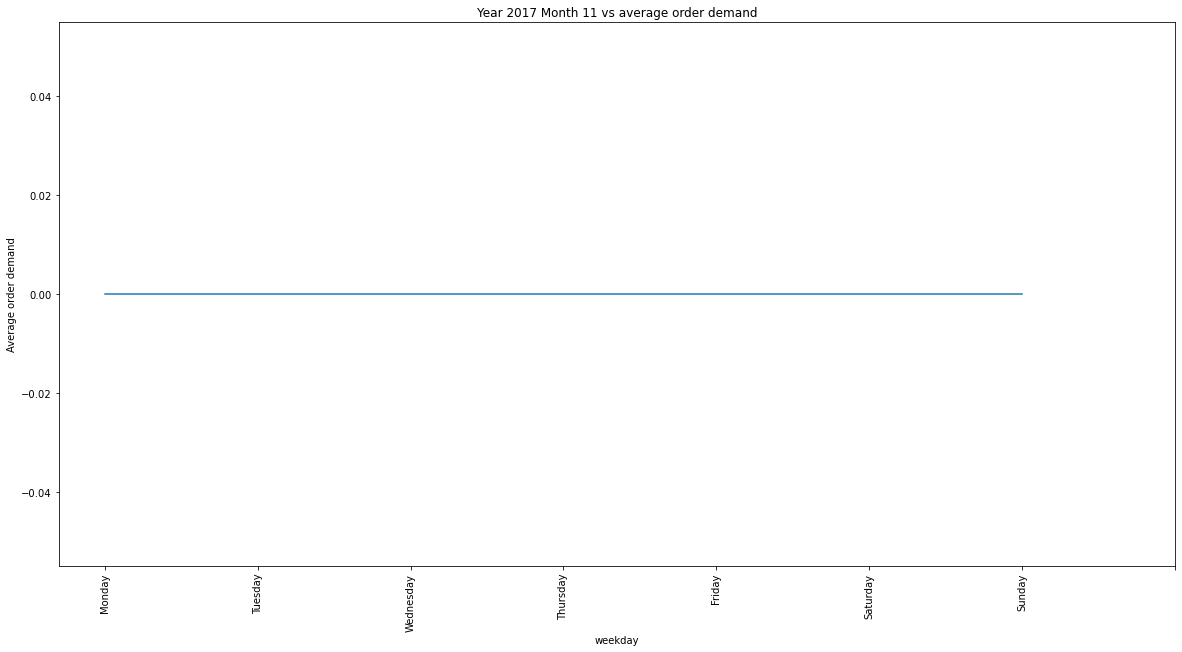

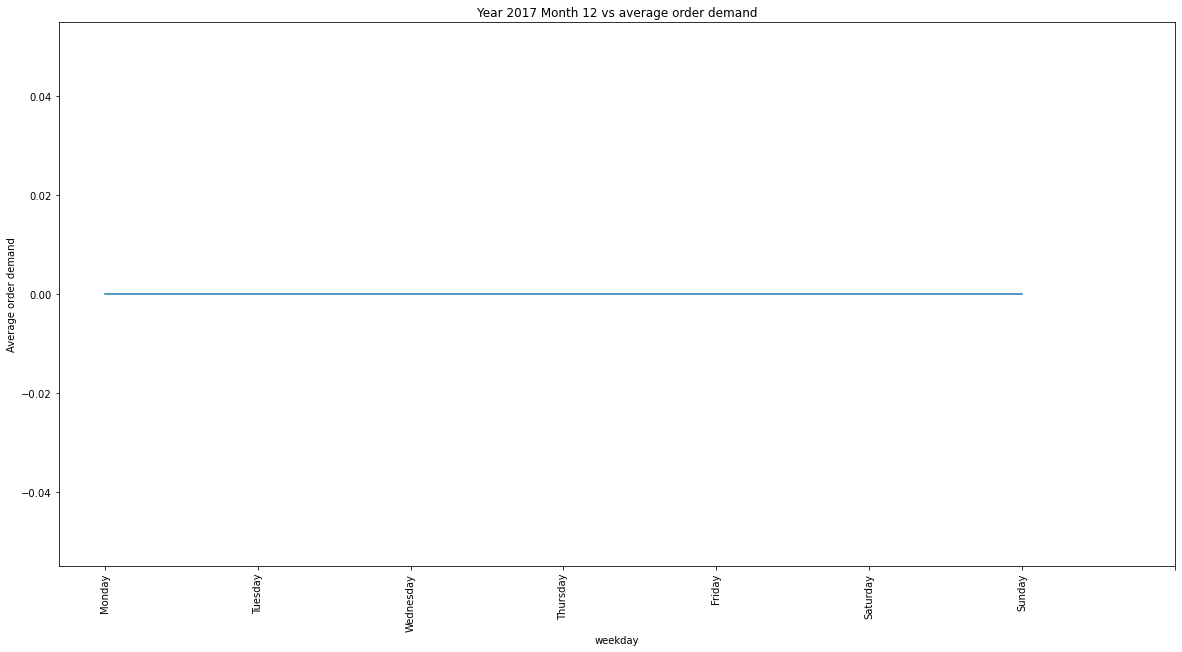

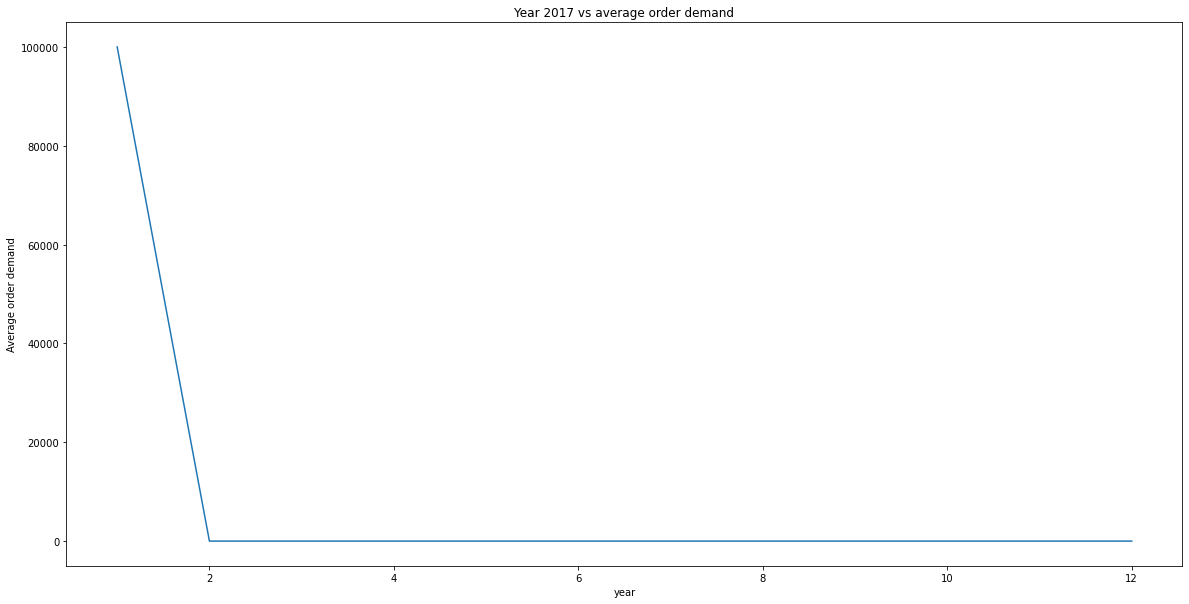

In [22]:
#ignore warning as opening a lot of images
import warnings
warnings.filterwarnings('ignore')

y=choice_data['year'].unique()
m=np.sort(choice_data['month'].unique())
w=np.sort(choice_data['weekday'].unique())
o_=[];
o_w_=[];
for i in range(0,len(y)):
    y_d=choice_data.loc[choice_data['year']==y[i]]
    o_=[];
    for l in range(0,len(m)):
        m_d=y_d.loc[y_d['month']==m[l]]
        o=y_d['Order_Demand'].loc[y_d['month']==m[l]].mean()
        o_.append(o)
        o_w_=[];
        for l_w in range(0,len(w)):
            o_w=m_d['Order_Demand'].loc[m_d['weekday']==w[l_w]].mean()
            o_w_.append(o_w)
        o_w_ = [0 if np.isnan(x) else x for x in o_w_]
        y_w_=list(w)
        data = {'x_': y_w_,
                'y_': o_w_}
        df = pd.DataFrame (data, columns = ['x_','y_'])
        plt.figure(figsize=(20,10))
        sns.lineplot(x="x_", y="y_", data=df)
        plt.xlabel('weekday')
        plt.ylabel('Average order demand')
        plt.title('Year '+ str(y[i])+ ' Month '+str(m[l])+ ' vs average order demand');   
        plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=90);
    o_ = [0 if np.isnan(x) else x for x in o_]
    y_=list(m)
    data = {'x_': y_,
            'y_': o_}
    df = pd.DataFrame (data, columns = ['x_','y_'])
    plt.figure(figsize=(20,10))
    sns.lineplot(x="x_", y="y_", data=df)
    plt.xlabel('year')
    plt.ylabel('Average order demand')
    plt.title('Year '+ str(y[i])+' vs average order demand');

|Year       | Month with high order demand     |
| :------------- | ----------: |
| 2012 | September   |
| 2013   | August |
|2014| May|
|2015| September|
|2016| November||

|Month       | Day with high order demand (2012)|Day with high order demand (2013)|Day with high order demand (2014)|Day with high order demand (2015)|Day with high order demand (2016)|
| :------------- | -------------| -------------| -------------| ------------- | ----------: |
|1 |Tuesday|Tuesday|Wednesday|Thursday|Tuesday|
|2 |Thursday|Friday|Sunday|Wednesday|Wednesday|
|3 |Monday|Tuesday|Tuesday|Wednesday|Wednesday|
|4 |Sunday|Wednesday|Monday|Monday|Friday|
|5 |Monday|Tuesday|Tuesday|Wednesday|Tuesday|
|6 |Tuesday|Wednesday|Wednesday|Tuesday|Tuesday|
|7 |Wednesday|Friday|Tuesday|Thursday|Tuesday|
|8 |Monday|Monday|Tuesday|Tuesday|Thursday|
|9 |Sunday|Monday|Tuesday|Wednesday|Friday
|10 |Friday|Friday|Wednesday|Tuesday|Tuesday|
|11 |Wednesday|Wednesday|Thursday|Sunday|Thursday|
|12 |Tuesday|Friday|Wednesday|Wednesday|Tuesday||

2017, for January, friday has highest average order demand



Over all, tuesday has highest number of maximum average order demand. Also, the maximum average demand on weekdays are always high except for four sundays.

__5.4 ARIMA and exponential smoothing__

__Importing dataset using parse__

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('/Users/madhumithrasubramaniankarthikesh/Downloads/Historical Product Demand.csv', parse_dates = ['Date'], index_col = ['Date'])
del df["Warehouse"]
del df["Product_Category"]
df=df[df['Product_Code']=='Product_1359']
del df["Product_Code"]
df.index=pd.to_datetime(df.index)
df.head()

Order_Demand
Date                   
2012-04-18       80000 
2012-05-21       70000 
2012-06-26       80000 
2012-07-17      100000 
2012-08-24      100000

__Finding the sum of average for each day__

In [24]:
df['Order_Demand']=df['Order_Demand']
df['Order_Demand']=df['Order_Demand'].str.replace(r"\(","")
df['Order_Demand']=df['Order_Demand'].str.replace(r"\)","")
df['Order_Demand']=df['Order_Demand'].astype('float64')
df=df.groupby(df.index)['Order_Demand'].sum().to_frame()
df.head()

Order_Demand
Date                    
2012-01-05      702000.0
2012-01-06      676000.0
2012-01-10      783000.0
2012-01-11      200000.0
2012-01-12      284000.0

__Filling the missing dates__

In [25]:
idx = pd.date_range(min(df.index), max(df.index))
df = df.reindex(idx, fill_value=0)
df

Order_Demand
2012-01-05      702000.0
2012-01-06      676000.0
2012-01-07           0.0
2012-01-08           0.0
2012-01-09           0.0
...                  ...
2017-01-02           0.0
2017-01-03           0.0
2017-01-04           0.0
2017-01-05           0.0
2017-01-06      100000.0

[1829 rows x 1 columns]

__Visualization of order demand with respect to date__ 

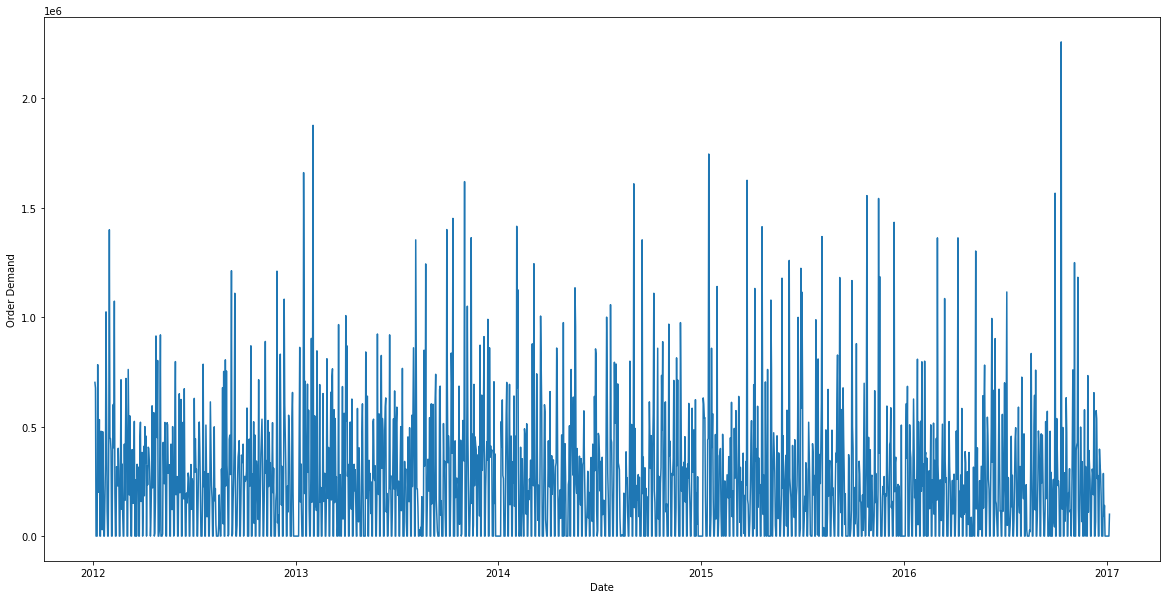

In [26]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.plot(df.index,df['Order_Demand'])

__Seasonal decomposition__

<Figure size 432x288 with 0 Axes>

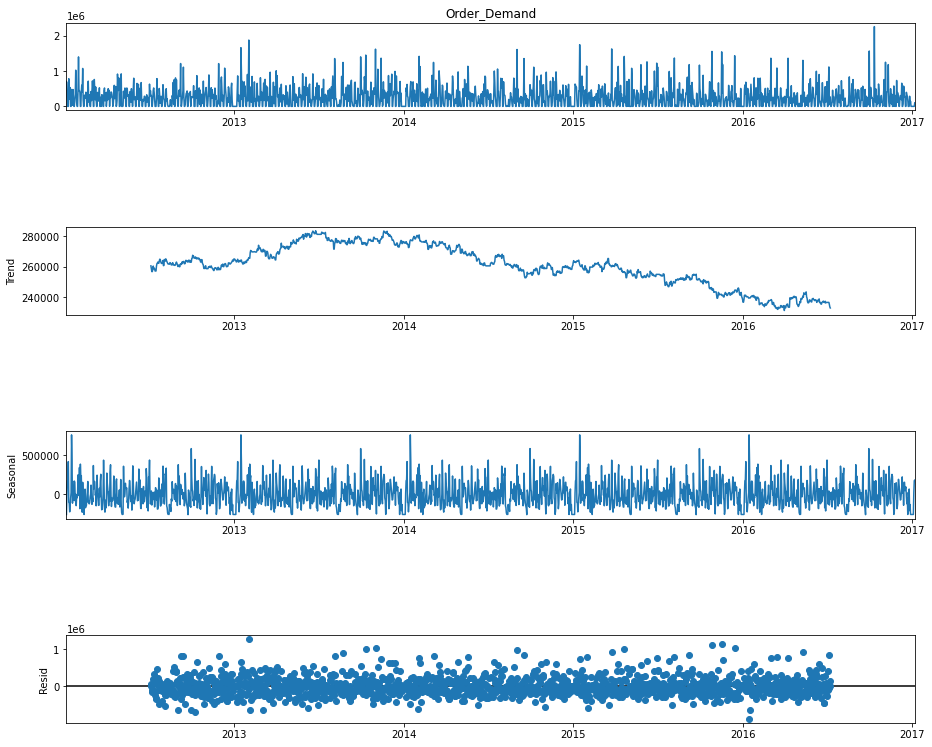

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Order_Demand'], model='additive', period=365)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

After 2014, the order demand trend starts decreasing.

__Stationarity or Non-stationary__

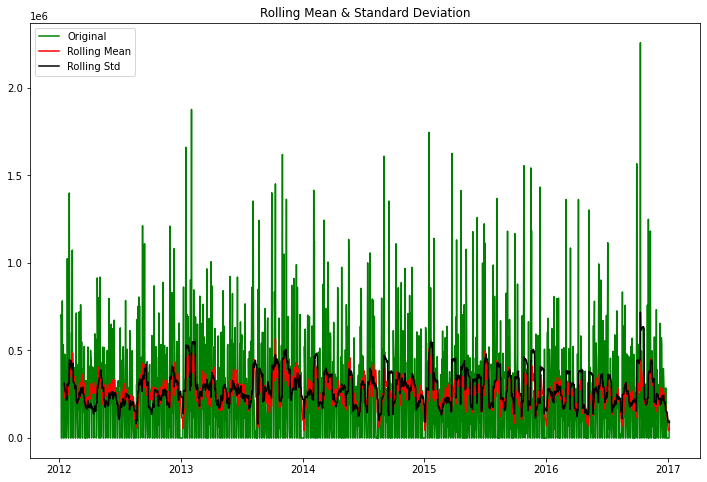

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.591719e+00
p-value                        2.027696e-16
#Lags Used                     2.000000e+01
Number of Observations Used    1.808000e+03
Critical Value (1%)           -3.433972e+00
Critical Value (5%)           -2.863140e+00
Critical Value (10%)          -2.567622e+00
dtype: float64


In [28]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='green',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)
test_stationarity(df['Order_Demand'])

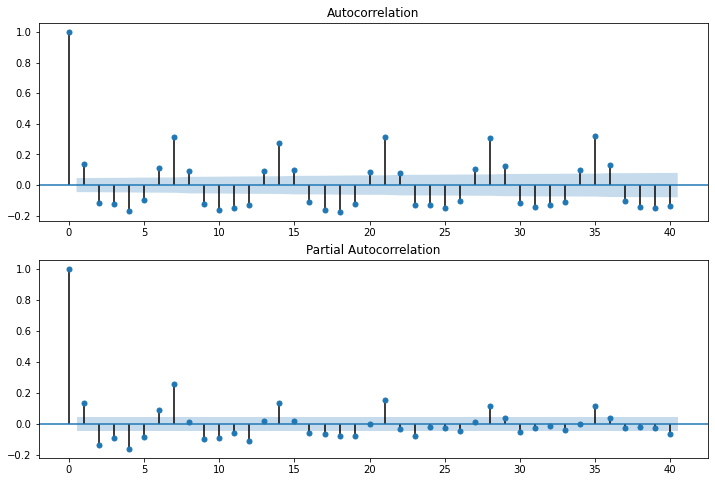

In [29]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Order_Demand'], lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Order_Demand'], lags=40, ax=ax2)# , lags=40

Correlation at lags 1,6,7 and its multiples.

__First order differencing__

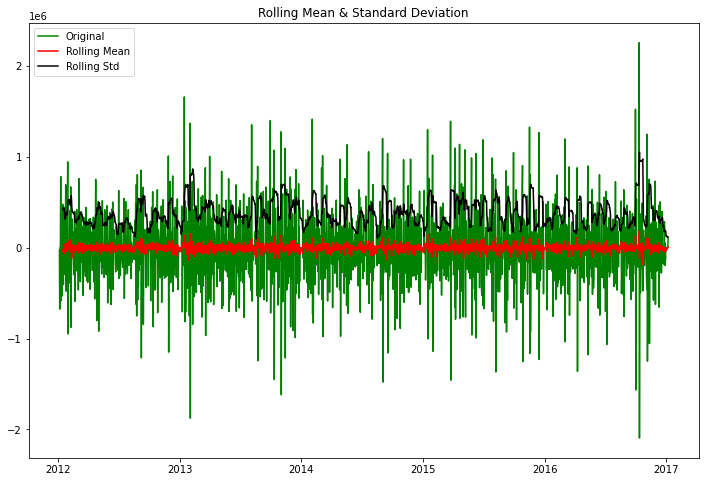

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.811961e+01
p-value                        2.523799e-30
#Lags Used                     1.900000e+01
Number of Observations Used    1.808000e+03
Critical Value (1%)           -3.433972e+00
Critical Value (5%)           -2.863140e+00
Critical Value (10%)          -2.567622e+00
dtype: float64


In [30]:
first_diff = df['Order_Demand'] - df['Order_Demand'].shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

__Correlation and autocorrelation for first order differencing__

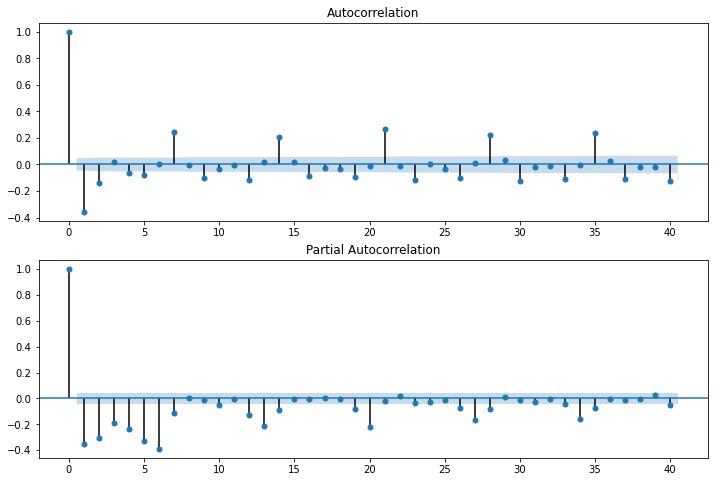

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

Correlation at lags 7 and its multiples.

__ARIMA__

In [32]:
from statsmodels.tsa.arima_model import ARIMA
arima_mod6 = sm.tsa.ARIMA(df['Order_Demand'], (6,0,1)).fit(disp=False)
print(arima_mod6.summary())

                              ARMA Model Results                              
Dep. Variable:           Order_Demand   No. Observations:                 1829
Model:                     ARMA(6, 1)   Log Likelihood              -25544.581
Method:                       css-mle   S.D. of innovations         281352.987
Date:                Mon, 12 Oct 2020   AIC                          51107.163
Time:                        22:31:50   BIC                          51156.766
Sample:                    01-05-2012   HQIC                         51125.458
                         - 01-06-2017                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.583e+05   6775.510     38.126      0.000    2.45e+05    2.72e+05
ar.L1.Order_Demand     0.6153      0.056     10.997      0.000       0.506       0.725
ar.L2.Order_Demand  

__Residual distribution__

NormaltestResult(statistic=734.9981653537197, pvalue=2.4956075390516902e-160)


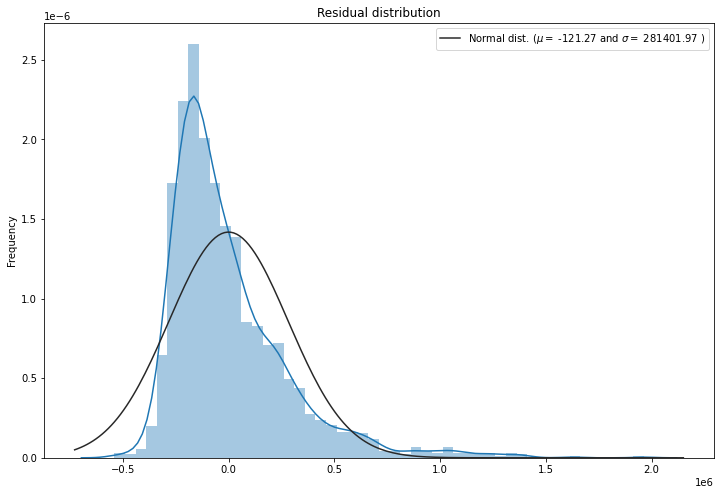

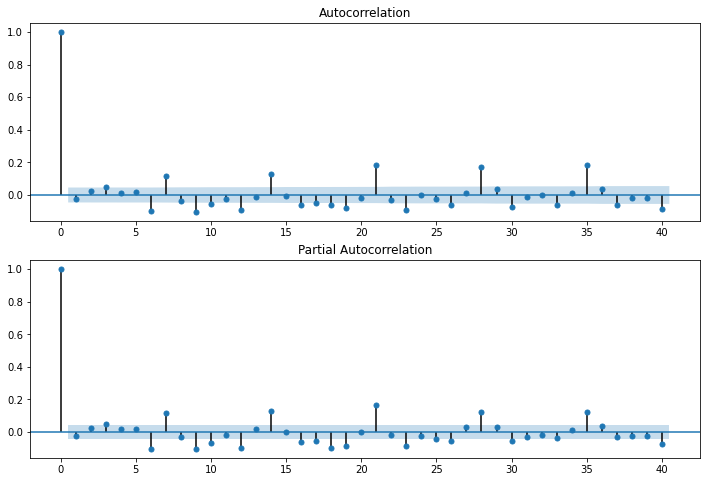

In [33]:
from scipy import stats
from scipy.stats import normaltest
import seaborn as sns

resid = arima_mod6.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) 

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

The density plot is Guassuian however its center is not at zero.

__Rolling forecast using ARIMA__

Test mean squared error for prediction: 78255083674.778


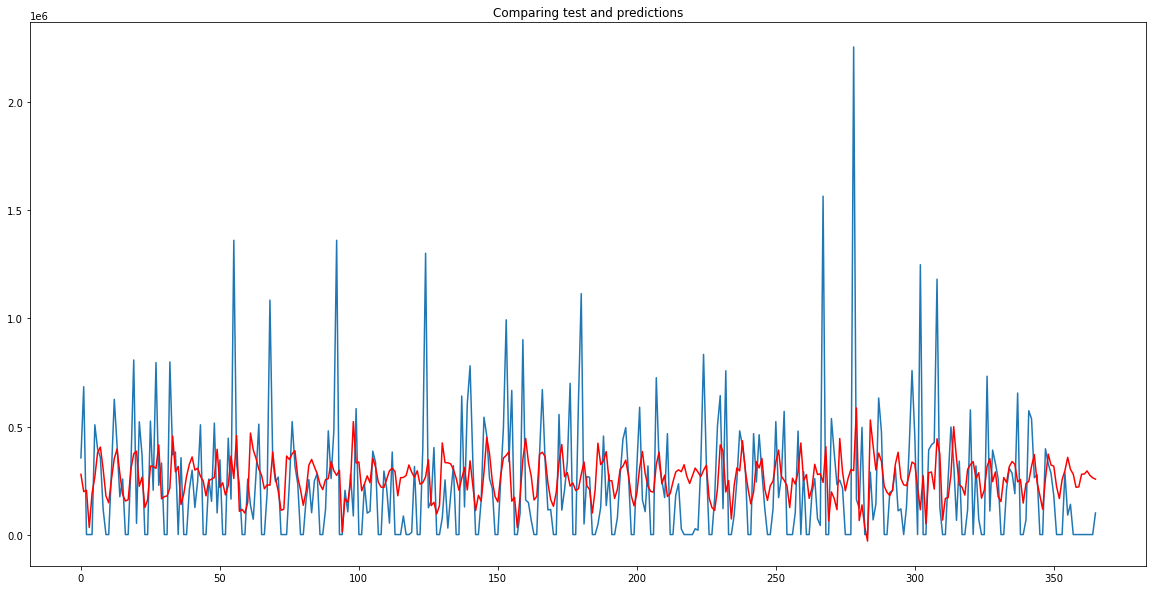

In [34]:
from sklearn.metrics import mean_squared_error
X =df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(6,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test mean squared error for prediction: %.3f' % error)
# plot
plt.figure(figsize=(20,10))
plt.plot(test,label='Test')
plt.plot(predictions, color='red',label='Rolling forecast predictions')
plt.title("Comparing test and predictions")
plt.show()

__Predictions for log data__

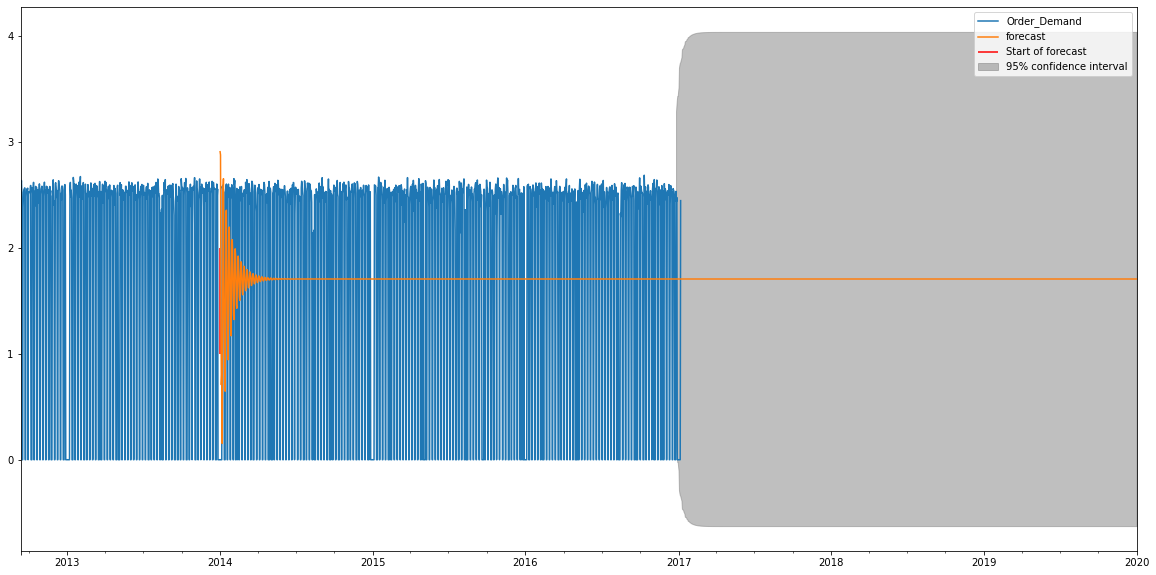

In [36]:
df_o=df;
df_o['Order_Demand']=np.log(df['Order_Demand']).fillna(0);
df_o=df_o.fillna(0)
model = ARIMA(df_o[:-12], (6, 0, 1))
res_111 = model.fit()

fig, ax = plt.subplots(figsize=(20, 10))
df.index = pd.to_datetime(df.index, format="%Y-%m")
df_o[250:].plot(ax=ax);
ax.vlines('2014-01', 2, 1, color='r', label='Start of forecast');

ax = res_111.plot_predict('2014-01', '2020-01', dynamic=True, plot_insample=False, ax=ax);

__Predictions for data__

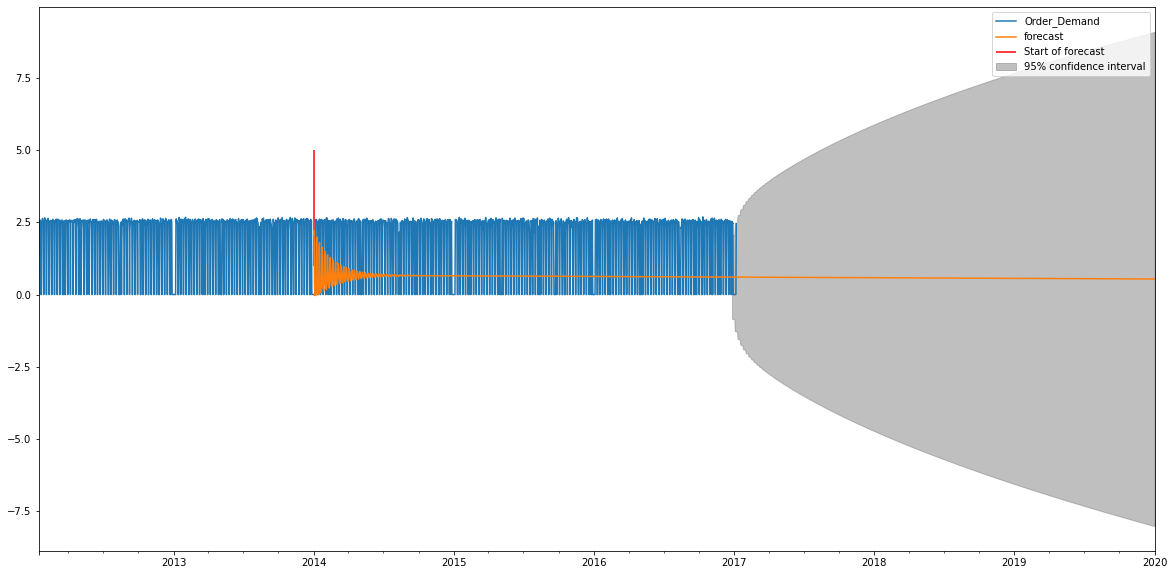

In [37]:
model = ARIMA(df['Order_Demand'][:-12], (6, 1, 0))
res_111 = model.fit()

fig, ax = plt.subplots(figsize=(20, 10))
df.index = pd.to_datetime(df.index, format="%Y-%m")
df['Order_Demand'][10:].plot(ax=ax);
ax.vlines('2014-01', 5, 1, color='r', label='Start of forecast');
ax = res_111.plot_predict('2014-01', '2020-01', dynamic=True, plot_insample=False, ax=ax);

__Exponential Smoothing__

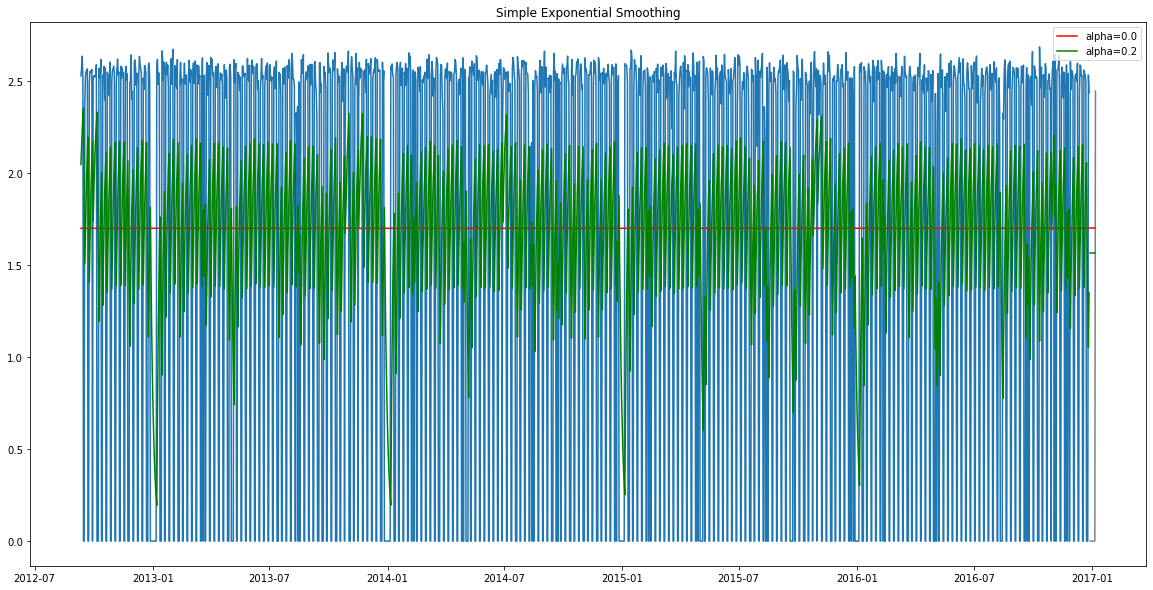

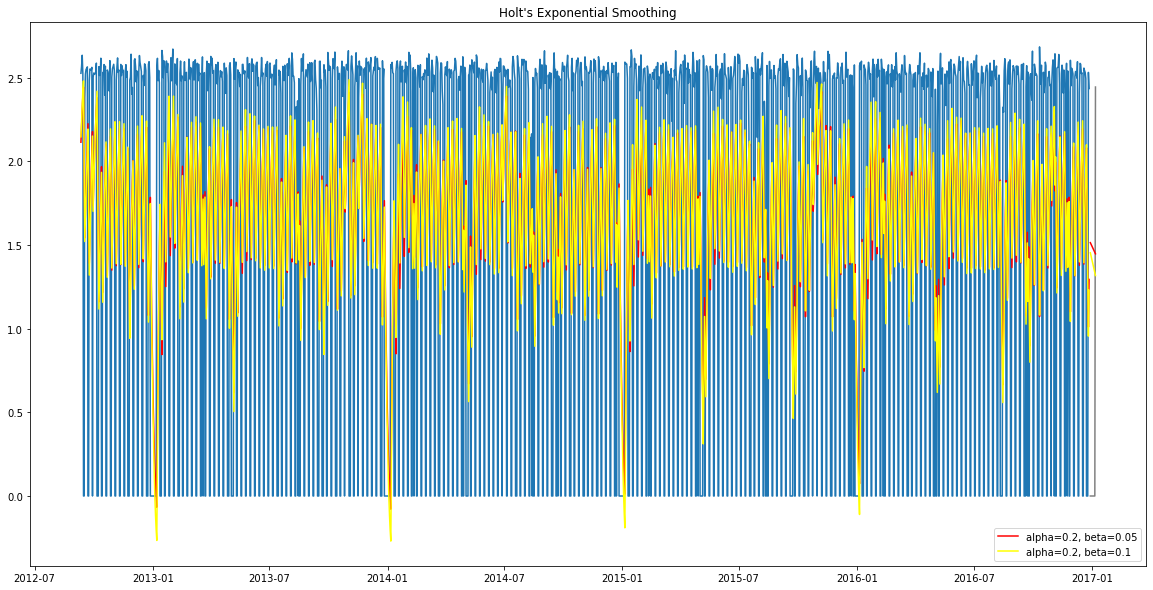

In [48]:
import requests
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
%matplotlib inline

train = df.iloc[100:-10, :]
test = df.iloc[-9:, :]
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
pred = test.copy()

model = SimpleExpSmoothing(np.asarray(train['Order_Demand']))
model._index = pd.to_datetime(train.index)

fit1 = model.fit()
pred1 = fit1.forecast(9)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(9)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train.index[150:], train.values[150:])
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2),(fit1, fit2),('red','green')):
    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend();
    
model = Holt(np.asarray(train['Order_Demand']))
model._index = pd.to_datetime(train.index)

fit1 = model.fit(smoothing_level=.2, smoothing_slope=.05)
pred1 = fit1.forecast(9)
fit2 = model.fit(smoothing_level=.2, smoothing_slope=.1)
pred2 = fit2.forecast(9)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train.index[150:], train.values[150:])
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2),(fit1, fit2),('red','yellow')):
    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)
plt.title("Holt's Exponential Smoothing")
plt.legend();